In [4]:
import matplotlib.pyplot as plt # pyplot
import matplotlib as mpl # matplotlib
%matplotlib inline
print(mpl.__version__)

import seaborn as sns # seaborn

import pandas as pd
import numpy as np
import pickle
import os, sys
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

pd.set_option('max_columns', 100)
mpl.rc('font', family='New Gulim') # 한글 설정
mpl.rc('axes', unicode_minus=False) # 음수 부호 깨지는거 설정
os.chdir('C:/FIFA4')
print(os.getcwd())

# 통계 검정 패키지
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scikit_posthocs as sp
import pingouin as pg
import scikit_posthocs as sp
from statsmodels.stats.multicomp import MultiComparison

3.2.2
C:\FIFA4


In [5]:
with open('pickles/HOJJIMIN.pkl', 'rb') as f:
    HOJJIMIN = pickle.load(f)
    
HOJJIMIN.shape

(200, 53)

In [6]:
HOJJIMIN.head(5)

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
0,601171920efad9408ec6e3d0,2021-01-27T23:08:58,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202014,승,0,0,2,0,0,0,92,0,53,0,4.20556,keyboard,3,2,0,1,1,0,0,0,1,0,2,1,1,0,0,0,110,100,84,79,8,6,0,0,0,0,12,12,4,3,6,2,8,7
1,601171920efad9408ec6e3d0,2021-01-27T23:08:58,50,8a37db9af145d19b1a59c4c8,Ballacks,202014,패,0,1,2,0,0,0,63,1,47,0,4.11667,keyboard,6,3,0,0,0,0,1,0,0,0,3,0,3,0,0,0,87,81,66,65,7,4,0,0,1,1,12,11,1,0,5,0,14,8
2,60116e114959034e2de34de5,2021-01-27T22:58:24,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202014,승,0,0,0,1,0,0,139,3,52,0,4.12222,keyboard,6,4,4,1,1,0,1,0,0,0,5,1,1,0,0,0,150,139,116,111,9,7,0,0,0,0,23,21,0,0,14,2,4,3
3,60116e114959034e2de34de5,2021-01-27T22:58:24,50,d249167febdedbcec2ad76a7,제주도산양상추,202014,패,0,0,1,0,0,0,95,1,48,0,4.01111,keyboard,6,4,2,1,1,0,0,0,0,0,3,1,3,0,0,0,148,134,106,96,9,8,0,0,2,2,30,27,1,1,11,0,20,12
4,60116b598416eb2e1c6a9111,2021-01-27T22:42:00,50,47bbab05ae17893af453d68b,살살해주,202014,무,0,0,0,0,0,0,72,3,45,0,4.06111,keyboard,6,5,0,1,1,0,2,0,0,0,5,1,1,0,0,0,93,81,58,53,6,3,0,0,4,4,22,19,3,2,13,1,9,5


In [7]:
HOJJIMIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   matchId                   200 non-null    object 
 1   matchDate                 200 non-null    object 
 2   matchType                 200 non-null    int64  
 3   accessId                  200 non-null    object 
 4   nickname                  200 non-null    object 
 5   seasonId                  200 non-null    int64  
 6   matchResult               200 non-null    object 
 7   matchEndType              200 non-null    int64  
 8   systemPause               200 non-null    int64  
 9   foul                      200 non-null    int64  
 10  injury                    200 non-null    int64  
 11  redCards                  200 non-null    int64  
 12  yellowCards               200 non-null    int64  
 13  dribble                   200 non-null    int64  
 14  cornerKick

In [8]:
HOJJIMIN.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
matchType,200.0,50.00000,0.000000,50.0,50.000000,50.00000,50.000000,50.00000
seasonId,200.0,202010.66000,1.034287,202010.0,202010.000000,202010.00000,202011.000000,202014.00000
matchEndType,200.0,0.07500,0.346374,0.0,0.000000,0.00000,0.000000,2.00000
systemPause,200.0,0.16000,0.406480,0.0,0.000000,0.00000,0.000000,2.00000
foul,200.0,0.52000,0.769781,0.0,0.000000,0.00000,1.000000,4.00000
injury,200.0,0.15500,0.362813,0.0,0.000000,0.00000,0.000000,1.00000
redCards,200.0,0.00500,0.070711,0.0,0.000000,0.00000,0.000000,1.00000
yellowCards,200.0,0.07500,0.282443,0.0,0.000000,0.00000,0.000000,2.00000
dribble,200.0,79.76000,18.103344,0.0,71.000000,81.00000,89.000000,139.00000
cornerKick,200.0,1.38500,1.230588,0.0,0.000000,1.00000,2.000000,6.00000


In [9]:
HOJJIMIN['matchResult'].value_counts()

승    80
패    80
무    40
Name: matchResult, dtype: int64

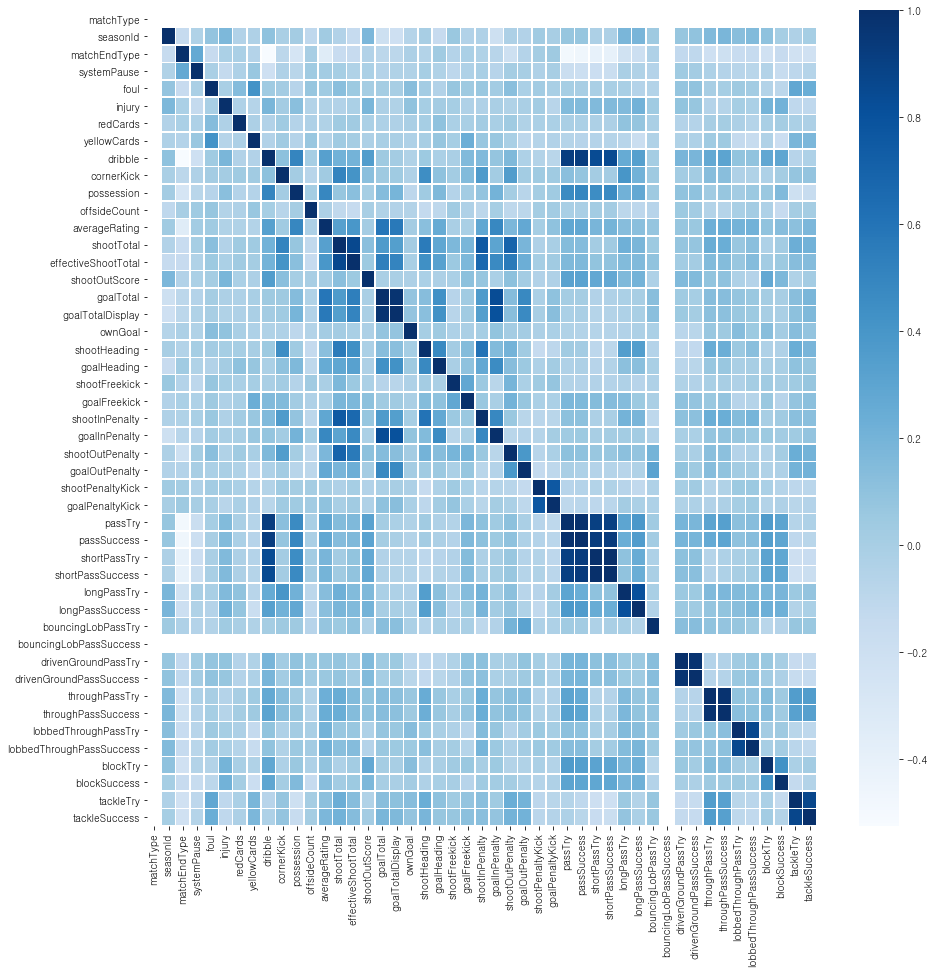

In [10]:
# 전체 변수에 대한 상관계수 확인
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(HOJJIMIN.corr(), annot = False, linewidths=.5, cmap='Blues')
plt.show()

In [11]:
win_HOJJIMIN = HOJJIMIN.loc[(HOJJIMIN['matchResult'] == '승') & (HOJJIMIN['nickname'] == 'HOJJIMIN')].reset_index(drop=True)
lose_HOJJIMIN = HOJJIMIN.loc[(HOJJIMIN['matchResult'] == '패') & (HOJJIMIN['nickname'] == 'HOJJIMIN')].reset_index(drop=True)
draw_HOJJIMIN = HOJJIMIN.loc[(HOJJIMIN['matchResult'] == '무') & (HOJJIMIN['nickname'] == 'HOJJIMIN')].reset_index(drop=True)

print('승리했을 때의 데이터 형태 : ', win_HOJJIMIN.shape)
print('패배했을 때의 데이터 형태 : ', lose_HOJJIMIN.shape)
print('비겼을 때의 데이터 형태 : ', draw_HOJJIMIN.shape)

승리했을 때의 데이터 형태 :  (42, 53)
패배했을 때의 데이터 형태 :  (38, 53)
비겼을 때의 데이터 형태 :  (20, 53)


# MatchDetail

In [12]:
my_HOJJIMIN = HOJJIMIN.loc[HOJJIMIN['nickname'] == 'HOJJIMIN']
print('내 경기 지표 : ', my_HOJJIMIN.shape)

내 경기 지표 :  (100, 53)


## 경기 결과 비율

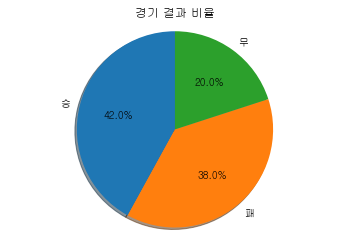

In [13]:
labels = ['승', '패', '무']
sizes = [2*round(len(win_HOJJIMIN)/len(HOJJIMIN), 3), 2*round(len(lose_HOJJIMIN)/len(HOJJIMIN), 3),
        2*round(len(draw_HOJJIMIN)/len(HOJJIMIN), 3)]
explode = (0, 0, 0)

title = '경기 결과 비율'
fig, ax = plt.subplots()
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
       shadow = True, startangle = 90)
ax.axis('equal')
ax.set_title(title)
plt.savefig(f'images/{title}.png')
plt.show()

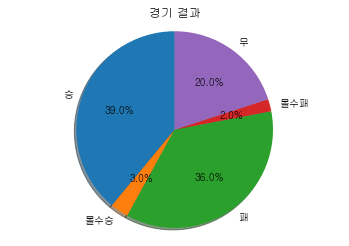

In [14]:
labels = ['승', '몰수승', '패', '몰수패', '무']
sizes = [round(len(win_HOJJIMIN.loc[win_HOJJIMIN['matchEndType'] == 0])/len(my_HOJJIMIN), 3),
         round(len(win_HOJJIMIN.loc[win_HOJJIMIN['matchEndType'] == 1])/len(my_HOJJIMIN), 3),
         round(len(lose_HOJJIMIN.loc[lose_HOJJIMIN['matchEndType'] == 0])/len(my_HOJJIMIN), 3),
         round(len(lose_HOJJIMIN.loc[lose_HOJJIMIN['matchEndType'] == 2])/len(my_HOJJIMIN), 3),
         round(len(draw_HOJJIMIN.loc[draw_HOJJIMIN['matchEndType'] == 0])/len(my_HOJJIMIN), 3)]

explode = (0, 0, 0, 0, 0)

title = '경기 결과'
fig, ax = plt.subplots()
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
       shadow = True, startangle = 90)
ax.axis('equal')
ax.set_title(title)
plt.savefig(f'images/{title}.png')
plt.show()

## 데이터 전처리

In [15]:
print('변수 추가 이전 데이터 형태 : ', my_HOJJIMIN.shape)
my_HOJJIMIN['Date'] = [my_HOJJIMIN['matchDate'].str.split('T')[i][0] for i in my_HOJJIMIN['matchDate'].index]
my_HOJJIMIN['Time'] = [my_HOJJIMIN['matchDate'].str.split('T')[i][1] for i in my_HOJJIMIN['matchDate'].index]
print('변수 추가 이후 데이터 형태 : ', my_HOJJIMIN.shape)

변수 추가 이전 데이터 형태 :  (100, 53)
변수 추가 이후 데이터 형태 :  (100, 55)


In [16]:
my_HOJJIMIN['Date'] = pd.to_datetime(my_HOJJIMIN['Date'])
print('변수 추가 이전 데이터 형태 : ', my_HOJJIMIN.shape)
my_HOJJIMIN['Year'] = my_HOJJIMIN['Date'].dt.year
my_HOJJIMIN['Month'] = my_HOJJIMIN['Date'].dt.month
my_HOJJIMIN['Day'] = my_HOJJIMIN['Date'].dt.day
my_HOJJIMIN['weekday'] = my_HOJJIMIN['Date'].dt.weekday
print('변수 추가 이후 데이터 형태 : ', my_HOJJIMIN.shape)

변수 추가 이전 데이터 형태 :  (100, 55)
변수 추가 이후 데이터 형태 :  (100, 59)


In [17]:
print('변수 추가 이전 데이터 형태 : ', my_HOJJIMIN.shape)
my_HOJJIMIN['Hour'] = my_HOJJIMIN['Time'].str[0:2]
my_HOJJIMIN['Minute'] = my_HOJJIMIN['Time'].str[3:5]
my_HOJJIMIN['Second'] = my_HOJJIMIN['Time'].str[6:]
print('변수 추가 이후 데이터 형태 : ', my_HOJJIMIN.shape)

변수 추가 이전 데이터 형태 :  (100, 59)
변수 추가 이후 데이터 형태 :  (100, 62)


In [18]:
my_HOJJIMIN.tail(5)

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,Date,Time,Year,Month,Day,weekday,Hour,Minute,Second
190,5f7067c4e4a2375ceaa6bddc,2020-09-27T19:31:41,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,패,0,0,0,0,0,0,104,0,51,0,3.95000,gamepad,5,5,0,1,1,0,0,0,0,0,2,0,3,1,0,0,124,113,109,100,1,1,0,0,1,1,13,11,0,0,7,0,4,1,2020-09-27,19:31:41,2020,9,27,6,19,31,41
192,5f70651fe10363fded79a729,2020-09-27T19:21:37,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,무,0,0,0,0,0,0,83,2,55,2,4.15556,gamepad,6,5,0,3,3,0,1,1,0,0,5,3,1,0,0,0,112,102,89,84,4,3,0,0,2,1,16,14,1,0,13,2,12,10,2020-09-27,19:21:37,2020,9,27,6,19,21,37
194,5f70628bca189053ff51cf66,2020-09-27T19:10:20,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,패,0,0,0,0,0,0,100,4,54,0,3.64444,gamepad,5,4,0,0,0,0,1,0,0,0,4,0,0,0,1,0,131,117,101,98,5,1,0,0,4,4,18,13,1,1,9,0,5,3,2020-09-27,19:10:20,2020,9,27,6,19,10,20
196,5f705de35fd2212069bae1bb,2020-09-27T18:48:31,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,패,2,1,0,0,0,0,50,3,42,0,3.36667,gamepad,4,4,0,0,0,0,1,0,0,0,4,0,0,0,0,0,82,68,66,58,7,5,0,0,1,1,7,4,0,0,9,0,5,5,2020-09-27,18:48:31,2020,9,27,6,18,48,31
198,5f705c7a92faafc0dc5c44c5,2020-09-27T18:39:02,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,승,1,1,0,0,0,0,34,1,52,0,4.23889,gamepad,6,6,0,4,3,0,1,1,0,0,3,3,2,1,0,0,43,39,38,36,4,2,0,0,0,0,1,1,0,0,3,0,3,2,2020-09-27,18:39:02,2020,9,27,6,18,39,02


In [19]:
my_HOJJIMIN['seasonId'].value_counts() # 202010 = ~10월 초, 202011 = ~11월 초 ?, 202014 = 1월부터임. 각 시즌별 표시 되어있음.

202010    59
202011    30
202013     8
202014     3
Name: seasonId, dtype: int64

In [20]:
my_HOJJIMIN = my_HOJJIMIN.sort_index(ascending=False).reset_index(drop = True) # 과거부터 현재로 인덱스 재설정
my_HOJJIMIN

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,Date,Time,Year,Month,Day,weekday,Hour,Minute,Second
0,5f705c7a92faafc0dc5c44c5,2020-09-27T18:39:02,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,승,1,1,0,0,0,0,34,1,52,0,4.23889,gamepad,6,6,0,4,3,0,1,1,0,0,3,3,2,1,0,0,43,39,38,36,4,2,0,0,0,0,1,1,0,0,3,0,3,2,2020-09-27,18:39:02,2020,9,27,6,18,39,02
1,5f705de35fd2212069bae1bb,2020-09-27T18:48:31,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,패,2,1,0,0,0,0,50,3,42,0,3.36667,gamepad,4,4,0,0,0,0,1,0,0,0,4,0,0,0,0,0,82,68,66,58,7,5,0,0,1,1,7,4,0,0,9,0,5,5,2020-09-27,18:48:31,2020,9,27,6,18,48,31
2,5f70628bca189053ff51cf66,2020-09-27T19:10:20,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,패,0,0,0,0,0,0,100,4,54,0,3.64444,gamepad,5,4,0,0,0,0,1,0,0,0,4,0,0,0,1,0,131,117,101,98,5,1,0,0,4,4,18,13,1,1,9,0,5,3,2020-09-27,19:10:20,2020,9,27,6,19,10,20
3,5f70651fe10363fded79a729,2020-09-27T19:21:37,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,무,0,0,0,0,0,0,83,2,55,2,4.15556,gamepad,6,5,0,3,3,0,1,1,0,0,5,3,1,0,0,0,112,102,89,84,4,3,0,0,2,1,16,14,1,0,13,2,12,10,2020-09-27,19:21:37,2020,9,27,6,19,21,37
4,5f7067c4e4a2375ceaa6bddc,2020-09-27T19:31:41,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,패,0,0,0,0,0,0,104,0,51,0,3.95000,gamepad,5,5,0,1,1,0,0,0,0,0,2,0,3,1,0,0,124,113,109,100,1,1,0,0,1,1,13,11,0,0,7,0,4,1,2020-09-27,19:31:41,2020,9,27,6,19,31,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5fe54cc35187586533085a43,2020-12-25T11:37:10,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202013,승,0,0,0,1,0,0,93,3,47,0,4.11667,gamepad,5,4,3,1,1,0,1,0,0,0,3,0,2,1,0,0,122,107,84,78,9,7,0,0,3,3,24,19,2,0,16,1,7,4,2020-12-25,11:37:10,2020,12,25,4,11,37,10
96,5fe550c9b9c658306293e92a,2020-12-25T11:49:02,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202013,승,0,0,0,1,0,0,95,1,53,0,4.31111,gamepad,6,5,0,2,2,0,2,1,0,0,4,1,2,1,0,0,108,97,79,74,7,7,0,0,1,1,19,14,1,1,6,1,7,6,2020-12-25,11:49:02,2020,12,25,4,11,49,02
97,60116b598416eb2e1c6a9111,2021-01-27T22:42:00,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202014,무,0,0,1,0,0,0,97,0,55,0,4.12778,keyboard,4,3,0,1,1,0,0,0,0,0,3,1,1,0,0,0,112,102,84,79,9,6,0,0,0,0,14,13,5,4,11,1,7,4,2021-01-27,22:42:00,2021,1,27,2,22,42,00
98,60116e114959034e2de34de5,2021-01-27T22:58:24,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202014,승,0,0,0,1,0,0,139,3,52,0,4.12222,keyboard,6,4,4,1,1,0,1,0,0,0,5,1,1,0,0,0,150,139,116,111,9,7,0,0,0,0,23,21,0,0,14,2,4,3,2021-01-27,22:58:24,2021,1,27,2,22,58,24


In [21]:
my_HOJJIMIN['matchResult'].value_counts()

승    42
패    38
무    20
Name: matchResult, dtype: int64

In [22]:
season_result_list = list(zip(my_HOJJIMIN['seasonId'], my_HOJJIMIN['matchResult']))
season_result_list[:5]

[(202010, '승'), (202010, '패'), (202010, '패'), (202010, '무'), (202010, '패')]

- 시즌별 승, 패 구분하기
- 승 = 1점, 무 & 패 = 0점

In [23]:
list_10 = list() # 202010, 59개
list_11 = list() # 202011, 30개
list_13 = list() # 202013, 8개
list_14 = list() # 202014, 3개

for idx, result in enumerate(season_result_list):
    if (result[0] == 202010) & (result[1] == '승'):
        list_10.append(1)
    elif ((result[0] == 202010) & (result[1] == '무')) or ((result[0] == 202010) & (result[1] == '패')):
        list_10.append(0)
    elif (result[0] == 202011) & (result[1] == '승'):
        list_11.append(1)
    elif ((result[0] == 202011) & (result[1] == '무')) or ((result[0] == 202011) & (result[1] == '패')):
        list_11.append(0)
    elif (result[0] == 202013) & (result[1] == '승'):
        list_13.append(1)
    elif ((result[0] == 202013) & (result[1] == '무')) or ((result[0] == 202013) & (result[1] == '패')):
        list_13.append(0)
    elif (result[0] == 202014) & (result[1] == '승'):
        list_14.append(1)
    elif ((result[0] == 202014) & (result[1] == '무')) or ((result[0] == 202014) & (result[1] == '패')):
        list_14.append(0)
        
print('Season 202010 : ', len(list_10))
print('Season 202011 : ',len(list_11))
print('Season 202013 : ',len(list_13))
print('Season 202014 : ',len(list_14))

Season 202010 :  59
Season 202011 :  30
Season 202013 :  8
Season 202014 :  3


In [24]:
# 202010 시즌

score_10 = 0
rate_10 = list()

for idx, value in enumerate(list_10):
    if value == 1:
        score_10 += 1
    elif value == 0:
        score_10 += 0
    rate_10.append(score_10 / (idx+1)*100)

In [25]:
# 202011 시즌

score_11 = 0
rate_11 = list()

for idx, value in enumerate(list_11):
    if value == 1:
        score_11 += 1
    elif value == 0:
        score_11 += 0
    rate_11.append(score_11 / (idx+1)*100)

In [26]:
# 202013 시즌

score_13 = 0
rate_13 = list()

for idx, value in enumerate(list_13):
    if value == 1:
        score_13 += 1
    elif value == 0:
        score_13 += 0
    rate_13.append(score_13 / (idx+1)*100)

In [27]:
# 202014 시즌

score_14 = 0
rate_14 = list()

for idx, value in enumerate(list_14):
    if value == 1:
        score_14 += 1
    elif value == 0:
        score_14 += 0
    rate_14.append(score_14 / (idx+1)*100)

In [28]:
print('Season 10 Winning Rate length : ', len(rate_10))
print('Season 11 Winning Rate length : ', len(rate_11))
print('Season 13 Winning Rate length : ', len(rate_13))
print('Season 14 Winning Rate length : ', len(rate_14))

Season 10 Winning Rate length :  59
Season 11 Winning Rate length :  30
Season 13 Winning Rate length :  8
Season 14 Winning Rate length :  3


In [29]:
rate = rate_10+rate_11+rate_13+rate_14
len(rate)

100

In [30]:
del [rate_10, rate_11, rate_13, rate_14, score_10, score_11, score_13, score_14, list_10, list_11, list_13, list_14]

In [31]:
print('변수 생성 이전 데이터 형태 : ', my_HOJJIMIN.shape)
my_HOJJIMIN['Rate'] = rate
print('변수 생성 이전 데이터 형태 : ', my_HOJJIMIN.shape)

변수 생성 이전 데이터 형태 :  (100, 62)
변수 생성 이전 데이터 형태 :  (100, 63)


In [32]:
my_HOJJIMIN.head(5)

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,Date,Time,Year,Month,Day,weekday,Hour,Minute,Second,Rate
0,5f705c7a92faafc0dc5c44c5,2020-09-27T18:39:02,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,승,1,1,0,0,0,0,34,1,52,0,4.23889,gamepad,6,6,0,4,3,0,1,1,0,0,3,3,2,1,0,0,43,39,38,36,4,2,0,0,0,0,1,1,0,0,3,0,3,2,2020-09-27,18:39:02,2020,9,27,6,18,39,02,100.000000
1,5f705de35fd2212069bae1bb,2020-09-27T18:48:31,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,패,2,1,0,0,0,0,50,3,42,0,3.36667,gamepad,4,4,0,0,0,0,1,0,0,0,4,0,0,0,0,0,82,68,66,58,7,5,0,0,1,1,7,4,0,0,9,0,5,5,2020-09-27,18:48:31,2020,9,27,6,18,48,31,50.000000
2,5f70628bca189053ff51cf66,2020-09-27T19:10:20,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,패,0,0,0,0,0,0,100,4,54,0,3.64444,gamepad,5,4,0,0,0,0,1,0,0,0,4,0,0,0,1,0,131,117,101,98,5,1,0,0,4,4,18,13,1,1,9,0,5,3,2020-09-27,19:10:20,2020,9,27,6,19,10,20,33.333333
3,5f70651fe10363fded79a729,2020-09-27T19:21:37,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,무,0,0,0,0,0,0,83,2,55,2,4.15556,gamepad,6,5,0,3,3,0,1,1,0,0,5,3,1,0,0,0,112,102,89,84,4,3,0,0,2,1,16,14,1,0,13,2,12,10,2020-09-27,19:21:37,2020,9,27,6,19,21,37,25.000000
4,5f7067c4e4a2375ceaa6bddc,2020-09-27T19:31:41,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,패,0,0,0,0,0,0,104,0,51,0,3.95000,gamepad,5,5,0,1,1,0,0,0,0,0,2,0,3,1,0,0,124,113,109,100,1,1,0,0,1,1,13,11,0,0,7,0,4,1,2020-09-27,19:31:41,2020,9,27,6,19,31,41,20.000000


## 시간별 승률 그래프

### 평일/주말 구분 없음

In [33]:
group_data = pd.DataFrame(my_HOJJIMIN.groupby(['Hour'], as_index=False)['Rate'].mean()).reset_index(drop = True)
group_data # 시간별 평균 승률 그래프

,Hour,Rate
0,00,37.981481
1,01,30.988687
2,04,27.777778
3,09,33.022533
4,10,37.755602
5,11,45.342523
6,12,46.482684
7,13,40.019763
8,18,75.000000
9,19,21.857143


In [34]:
plt.style.use('seaborn-whitegrid') # 배경 설정
sns.set_palette('bright') # 밝은 색
plt.rcParams['font.family'] = 'New Gulim' # 한글 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호

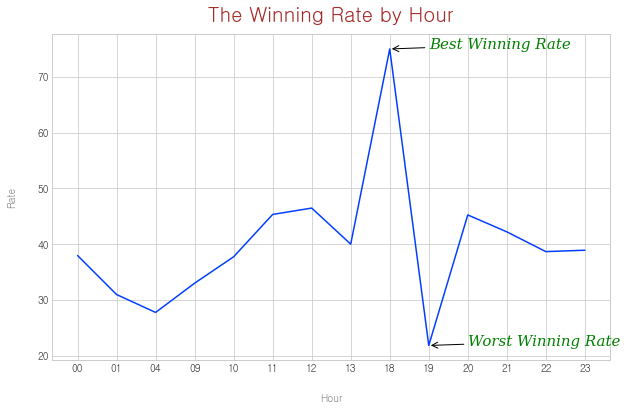

In [35]:
font_label = {
    'color' : 'gray',
    'weight' : 'bold',
    'size' : 10
}

font_title = {
    'size' : 20,
    'color' : 'brown',
    'weight' : 'bold',
    'va' : 'baseline',
    'ha' : 'center'
}

font_text = {
    'size' : 10,
    'color' : 'blue',
    'weight' : 'bold',
    'horizontalalignment' : 'left',
    'verticalalignment' : 'center'
}

title = 'The Winning Rate by Hour'

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(group_data['Hour'], group_data['Rate'])

ax.set_xlabel('Hour', fontdict = font_label, labelpad = 20)
ax.set_ylabel('Rate', fontdict = font_label, labelpad = 20)
ax.set_title(title, fontdict = font_title, pad = 12)


# Add average
arrowprops = {
    'arrowstyle' : '->'
}
ax.annotate("Best Winning Rate", (8, group_data['Rate'].max()), xytext=(9, group_data['Rate'].max()), 
           color='green', fontfamily='serif', fontstyle='italic', fontsize=15,
           arrowprops=arrowprops)

ax.annotate("Worst Winning Rate", (9, group_data['Rate'].min()), xytext=(10, group_data['Rate'].min()), 
           color='green', fontfamily='serif', fontstyle='italic', fontsize=15,
           arrowprops=arrowprops)

plt.savefig(f'images/{title}.png')
plt.show()

In [36]:
weekend_df = my_HOJJIMIN.loc[(my_HOJJIMIN['weekday'] == 5) | (my_HOJJIMIN['weekday'] == 6)] # 주말
weekday_df = my_HOJJIMIN.loc[(my_HOJJIMIN['weekday'] != 5) & (my_HOJJIMIN['weekday'] != 6)] # 평일
print('주말 데이터 형태 : ', weekend_df.shape)
print('평일 데이터 형태 : ', weekday_df.shape)

주말 데이터 형태 :  (70, 63)
평일 데이터 형태 :  (30, 63)


### 주말

In [37]:
group_weekend = pd.DataFrame(weekend_df.groupby(['Hour'], as_index=False)['Rate'].mean()).reset_index(drop = True)
group_weekend # 주말의 시간별 평균 승률 그래프

,Hour,Rate
0,00,37.981481
1,01,32.532930
2,11,55.000000
3,12,47.691198
4,18,75.000000
5,19,21.857143
6,20,45.253766
7,21,42.226671
8,22,39.983424
9,23,0.000000


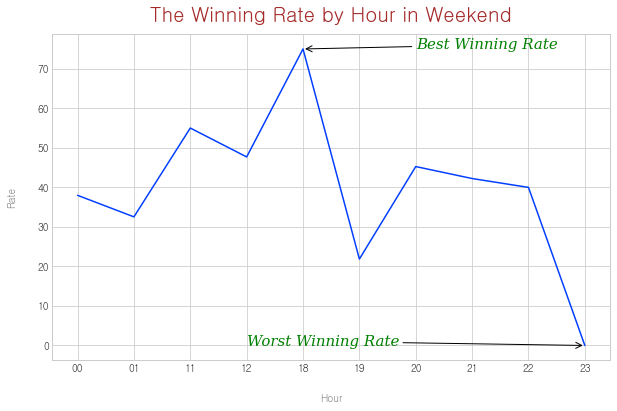

In [38]:
font_label = {
    'color' : 'gray',
    'weight' : 'bold',
    'size' : 10
}

font_title = {
    'size' : 20,
    'color' : 'brown',
    'weight' : 'bold',
    'va' : 'baseline',
    'ha' : 'center'
}

font_text = {
    'size' : 10,
    'color' : 'blue',
    'weight' : 'bold',
    'horizontalalignment' : 'left',
    'verticalalignment' : 'center'
}

title = 'The Winning Rate by Hour in Weekend'

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(group_weekend['Hour'], group_weekend['Rate'])

ax.set_xlabel('Hour', fontdict = font_label, labelpad = 20)
ax.set_ylabel('Rate', fontdict = font_label, labelpad = 20)
ax.set_title(title, fontdict = font_title, pad = 12)



# Add average
arrowprops = {
    'arrowstyle' : '->'
}
ax.annotate("Best Winning Rate", (4, group_weekend['Rate'].max()), xytext=(6, group_weekend['Rate'].max()), 
           color='green', fontfamily='serif', fontstyle='italic', fontsize=15,
           arrowprops=arrowprops)

ax.annotate("Worst Winning Rate", (9, 0), xytext=(3, 0), 
           color='green', fontfamily='serif', fontstyle='italic', fontsize=15,
           arrowprops=arrowprops)


plt.savefig(f'images/{title}.png')
plt.show()

### 평일

In [39]:
group_weekday = pd.DataFrame(weekday_df.groupby(['Hour'], as_index=False)['Rate'].mean()).reset_index(drop = True)
group_weekday # 주말의 시간별 평균 승률 그래프

,Hour,Rate
0,01,29.444444
1,04,27.777778
2,09,33.022533
3,10,37.755602
4,11,42.123364
5,12,42.857143
6,13,40.019763
7,22,25.000000
8,23,48.660256


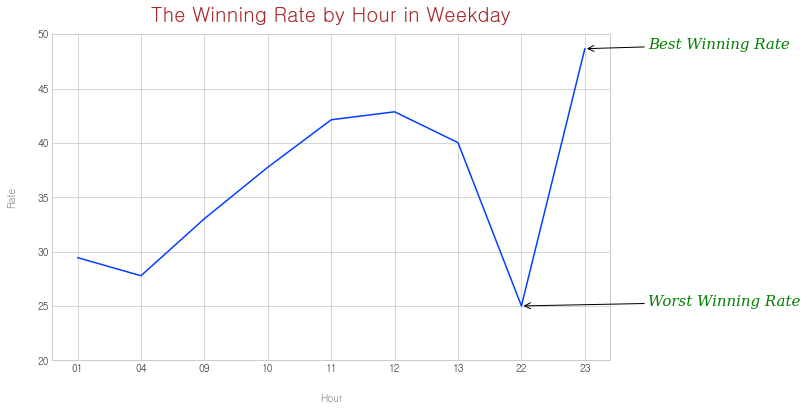

In [40]:
font_label = {
    'color' : 'gray',
    'weight' : 'bold',
    'size' : 10
}

font_title = {
    'size' : 20,
    'color' : 'brown',
    'weight' : 'bold',
    'va' : 'baseline',
    'ha' : 'center'
}

font_text = {
    'size' : 10,
    'color' : 'blue',
    'weight' : 'bold',
    'horizontalalignment' : 'left',
    'verticalalignment' : 'center'
}

title = 'The Winning Rate by Hour in Weekday'

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(group_weekday['Hour'], group_weekday['Rate'])

ax.set_xlabel('Hour', fontdict = font_label, labelpad = 20)
ax.set_ylabel('Rate', fontdict = font_label, labelpad = 20)
ax.set_ylim(20, 50)
ax.set_title(title, fontdict = font_title, pad = 12)


# Add average
arrowprops = {
    'arrowstyle' : '->'
}
ax.annotate("Best Winning Rate", (8, group_weekday['Rate'].max()), xytext=(9, group_weekday['Rate'].max()), 
           color='green', fontfamily='serif', fontstyle='italic', fontsize=15,
           arrowprops=arrowprops)

ax.annotate("Worst Winning Rate", (7, group_weekday['Rate'].min()), xytext=(9, group_weekday['Rate'].min()), 
           color='green', fontfamily='serif', fontstyle='italic', fontsize=15,
           arrowprops=arrowprops)


plt.savefig(f'images/{title}.png')
plt.show()

In [41]:
my_HOJJIMIN.head(3)

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,Date,Time,Year,Month,Day,weekday,Hour,Minute,Second,Rate
0,5f705c7a92faafc0dc5c44c5,2020-09-27T18:39:02,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,승,1,1,0,0,0,0,34,1,52,0,4.23889,gamepad,6,6,0,4,3,0,1,1,0,0,3,3,2,1,0,0,43,39,38,36,4,2,0,0,0,0,1,1,0,0,3,0,3,2,2020-09-27,18:39:02,2020,9,27,6,18,39,02,100.000000
1,5f705de35fd2212069bae1bb,2020-09-27T18:48:31,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,패,2,1,0,0,0,0,50,3,42,0,3.36667,gamepad,4,4,0,0,0,0,1,0,0,0,4,0,0,0,0,0,82,68,66,58,7,5,0,0,1,1,7,4,0,0,9,0,5,5,2020-09-27,18:48:31,2020,9,27,6,18,48,31,50.000000
2,5f70628bca189053ff51cf66,2020-09-27T19:10:20,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,패,0,0,0,0,0,0,100,4,54,0,3.64444,gamepad,5,4,0,0,0,0,1,0,0,0,4,0,0,0,1,0,131,117,101,98,5,1,0,0,4,4,18,13,1,1,9,0,5,3,2020-09-27,19:10:20,2020,9,27,6,19,10,20,33.333333


In [42]:
my_HOJJIMIN['systemPause'].value_counts()

0    90
1    10
Name: systemPause, dtype: int64

In [43]:
my_HOJJIMIN['foul'].value_counts()

0    68
1    28
2     4
Name: foul, dtype: int64

In [44]:
my_HOJJIMIN['injury'].value_counts()

0    78
1    22
Name: injury, dtype: int64

In [45]:
my_HOJJIMIN.columns

Index(['matchId', 'matchDate', 'matchType', 'accessId', 'nickname', 'seasonId',
       'matchResult', 'matchEndType', 'systemPause', 'foul', 'injury',
       'redCards', 'yellowCards', 'dribble', 'cornerKick', 'possession',
       'offsideCount', 'averageRating', 'controller', 'shootTotal',
       'effectiveShootTotal', 'shootOutScore', 'goalTotal', 'goalTotalDisplay',
       'ownGoal', 'shootHeading', 'goalHeading', 'shootFreekick',
       'goalFreekick', 'shootInPenalty', 'goalInPenalty', 'shootOutPenalty',
       'goalOutPenalty', 'shootPenaltyKick', 'goalPenaltyKick', 'passTry',
       'passSuccess', 'shortPassTry', 'shortPassSuccess', 'longPassTry',
       'longPassSuccess', 'bouncingLobPassTry', 'bouncingLobPassSuccess',
       'drivenGroundPassTry', 'drivenGroundPassSuccess', 'throughPassTry',
       'throughPassSuccess', 'lobbedThroughPassTry',
       'lobbedThroughPassSuccess', 'blockTry', 'blockSuccess', 'tackleTry',
       'tackleSuccess', 'Date', 'Time', 'Year', 'Month', 'D

## 각 변수의 그래프들

### 박스플롯

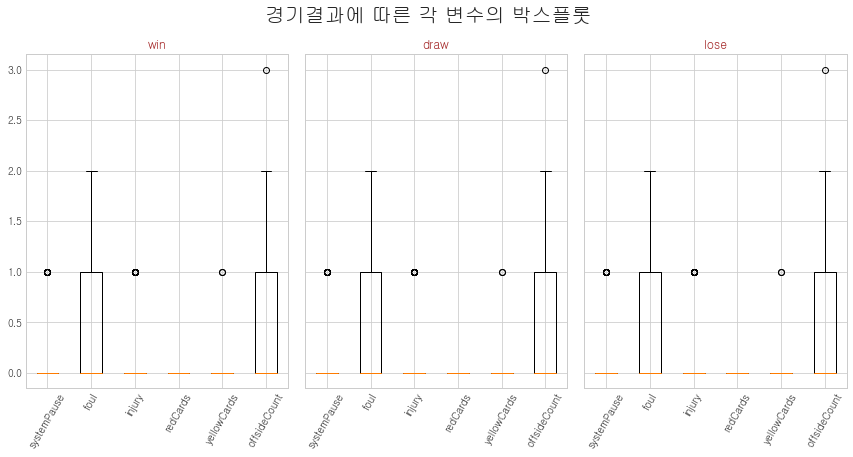

In [46]:
title_list = ['win', 'draw', 'lose']
data_list = [win_HOJJIMIN, draw_HOJJIMIN, lose_HOJJIMIN]
cols = my_HOJJIMIN.columns[8:13].to_list() + ['offsideCount']

fig, ax = plt.subplots(1,3,figsize=(12,6), sharey=True)
suptitle = '경기결과에 따른 각 변수의 박스플롯'

for idx, data in enumerate(data_list):
    ax[idx].boxplot(my_HOJJIMIN[cols].values)
    ax[idx].set_xticks([i for i in range(1, len(cols)+1)])
    ax[idx].set_xticklabels(cols, rotation=60)
    ax[idx].set_title(title_list[idx], fontdict=font_title, fontsize=12)

fig.suptitle(suptitle, y=1.05, fontsize=20)
plt.savefig(f'images/{suptitle}.png', bbox_inches = 'tight')
fig.tight_layout()

<최근 100경기>
- 게임 정지 횟수 : 0 or 1번
- 파울 횟수 : 0 or 1번
- 부상 횟수 : 0 or 1 or 2번
- 레드카드 : 0번
- 옐로카드 : 0 or 1번
- 오프사이드 : 0 or 1 or 2번   
   
**승/무/패 여부에 상관없이 모두 같은 그래프 형태를 띈다.**

In [47]:
def convert_count_data(data, column):
    result = pd.DataFrame(data[column].value_counts()).sort_index(ascending=True)
    return result

In [48]:
data = convert_count_data(my_HOJJIMIN, 'cornerKick')
data

,cornerKick
0,24
1,35
2,23
3,12
4,5
5,1


### 코너킥

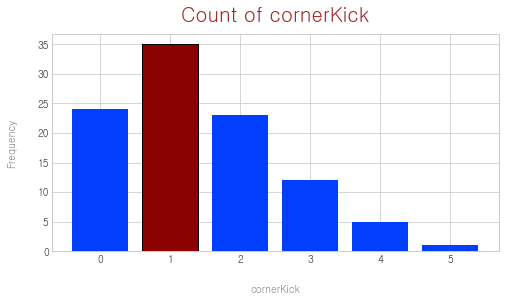

In [49]:
title = 'Count of cornerKick'
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(list(data.index), data['cornerKick'])
ax.set_xlabel('cornerKick', fontdict=font_label, labelpad=20)
ax.set_ylabel('Frequency', fontdict=font_label, labelpad=20)
ax.set_title(title, fontdict=font_title, pad=12)
ax.patches[1].set_facecolor('darkred')
ax.patches[1].set_edgecolor('black')
plt.show()

In [50]:
win = convert_count_data(win_HOJJIMIN, 'cornerKick')
lose = convert_count_data(lose_HOJJIMIN, 'cornerKick')
draw = convert_count_data(draw_HOJJIMIN, 'cornerKick')

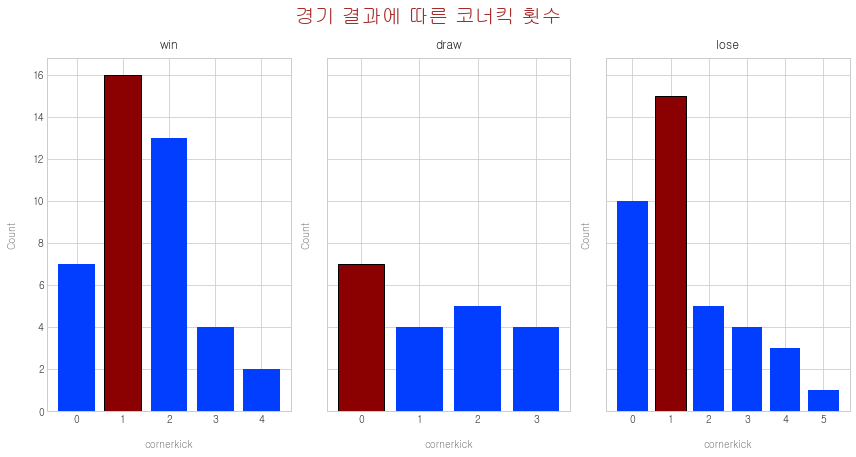

In [51]:
# 전체 경기 평점
suptitle = title = '경기 결과에 따른 코너킥 횟수'
title_list = ['win', 'draw', 'lose']
data_list = [win, draw, lose]
idx_list = [1, 0, 1]

fig, ax = plt.subplots(1,3,figsize=(12,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].bar(list(data.index), data['cornerKick'])
    ax[idx].set_xlabel('cornerkick', fontdict=font_label, labelpad=15)
    ax[idx].set_ylabel('Count', fontdict=font_label, labelpad=15)
    ax[idx].set_title(title_list[idx], pad=10)
    ax[idx].patches[idx_list[idx]].set_facecolor('darkred')
    ax[idx].patches[idx_list[idx]].set_edgecolor('black')
    
plt.suptitle(suptitle, fontdict=font_title, y=1.05, fontsize = 20)
plt.savefig(f'images/{suptitle}.png', bbox_inches = 'tight')
fig.tight_layout()

- 코너킥은 1 > 0 > 2 > 3 > 4 > 5 순서의 횟수만큼 발생함.
- 그렇다면, 코너킥을 했을 때와 그렇지 않았을 때의 승리 비율은 ?
- 코너킥 했을 때, 골을 넣은 경우는 몇 번이나 있을까? 
- 전체 골 중 코너킥 골의 비율은 얼마나 될지?

### 경기 평점

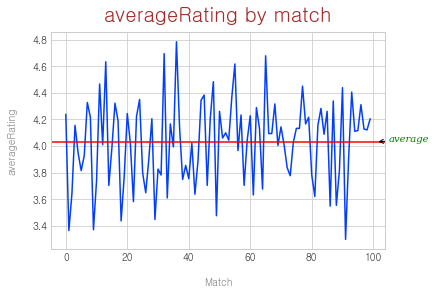

In [52]:
# 전체 경기 평점
title = 'averageRating by match'
fig, ax = plt.subplots()
ax.plot(my_HOJJIMIN['averageRating'])
ax.axhline(my_HOJJIMIN['averageRating'].mean(), color = 'red')
ax.set_xlabel('Match', fontdict=font_label, labelpad=15)
ax.set_ylabel('averageRating', fontdict=font_label, labelpad=15)
ax.set_title(title, fontdict=font_title, pad=10)
ax.annotate("average", (101, my_HOJJIMIN['averageRating'].mean())
            , xytext=(105, my_HOJJIMIN['averageRating'].mean()), 
           color='green', fontfamily='serif', fontstyle='italic', fontsize=10,
           arrowprops=arrowprops)

plt.show()

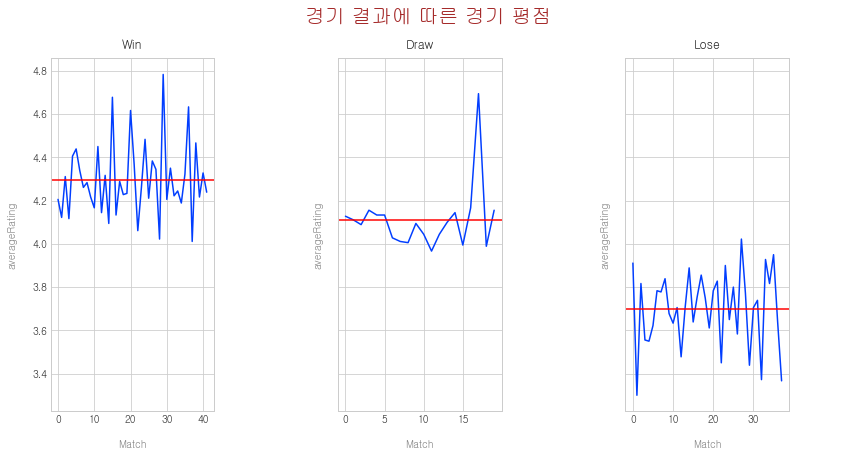

In [53]:
suptitle = '경기 결과에 따른 경기 평점'
title_list = ['Win', 'Draw', 'Lose']
data_list = [win_HOJJIMIN, draw_HOJJIMIN, lose_HOJJIMIN]

fig, ax = plt.subplots(1,3,figsize=(12,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].plot(data['averageRating'])
    ax[idx].axhline(data['averageRating'].mean(), color = 'red')
    ax[idx].set_xlabel('Match', fontdict=font_label, labelpad=15)
    ax[idx].set_ylabel('averageRating', fontdict=font_label, labelpad=15)
    ax[idx].set_title(title_list[idx], pad=10)
    ax[idx].annotate("average", (len(data)+3, data['averageRating'].mean())
                , xytext=(len(data)+5, data['averageRating'].mean()), 
               color='green', fontfamily='serif', fontstyle='italic', fontsize=10,
               arrowprops=arrowprops)

plt.suptitle(suptitle, fontdict=font_title, y=1.05, fontsize=20)
plt.savefig(f'images/{suptitle}.png', bbox_inches = 'tight')
fig.tight_layout()

- 승리했을 때, 모든 평점은 4점을 넘고 최대 평점은 4.8에 가까운 값을 가진다.
- 비겼을 때, 대부분의 평점은 4.0~4.2를 왔다갔다하지만, 특정 한 경기에서 4.6이상의 높은 값을 가진다. 이는 왜 그럴까 ?
- 패배했을 때, 대부분의 평점은 비기거나 이긴경우보다 낮다.
- 평점은 어떤 변수들의 영향을 많이 받을까 ?
- 상관관계 분석을 통해 한번 알아볼 수 있을듯.

### 컨트롤러

In [54]:
my_HOJJIMIN['controller'].value_counts()

gamepad     97
keyboard     3
Name: controller, dtype: int64

- 게임패드로 전향한지 좀 되어서, 키보드 데이터는 3건 밖에 없다... (이 3건의 데이터도 친구 집에서 플레이 했던 기록이다.)
- 이 둘을 비교분석 하기에는 데이터가 너무 부족

In [55]:
my_HOJJIMIN.loc[my_HOJJIMIN['controller']=='keyboard']

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,Date,Time,Year,Month,Day,weekday,Hour,Minute,Second,Rate
97,60116b598416eb2e1c6a9111,2021-01-27T22:42:00,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202014,무,0,0,1,0,0,0,97,0,55,0,4.12778,keyboard,4,3,0,1,1,0,0,0,0,0,3,1,1,0,0,0,112,102,84,79,9,6,0,0,0,0,14,13,5,4,11,1,7,4,2021-01-27,22:42:00,2021,1,27,2,22,42,00,0.000000
98,60116e114959034e2de34de5,2021-01-27T22:58:24,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202014,승,0,0,0,1,0,0,139,3,52,0,4.12222,keyboard,6,4,4,1,1,0,1,0,0,0,5,1,1,0,0,0,150,139,116,111,9,7,0,0,0,0,23,21,0,0,14,2,4,3,2021-01-27,22:58:24,2021,1,27,2,22,58,24,50.000000
99,601171920efad9408ec6e3d0,2021-01-27T23:08:58,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202014,승,0,0,2,0,0,0,92,0,53,0,4.20556,keyboard,3,2,0,1,1,0,0,0,1,0,2,1,1,0,0,0,110,100,84,79,8,6,0,0,0,0,12,12,4,3,6,2,8,7,2021-01-27,23:08:58,2021,1,27,2,23,08,58,66.666667


- 심지어 키보드를 사용했던 결과는 무-승-승 이다.
- 그렇다면, 상대의 컨트롤러에 따른 승률은 어떻게 될까?

In [56]:
not_HOJJIMIN = HOJJIMIN.loc[HOJJIMIN['nickname']!='HOJJIMIN'] # 상대방 데이터
not_HOJJIMIN.head(3)

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
1,601171920efad9408ec6e3d0,2021-01-27T23:08:58,50,8a37db9af145d19b1a59c4c8,Ballacks,202014,패,0,1,2,0,0,0,63,1,47,0,4.11667,keyboard,6,3,0,0,0,0,1,0,0,0,3,0,3,0,0,0,87,81,66,65,7,4,0,0,1,1,12,11,1,0,5,0,14,8
3,60116e114959034e2de34de5,2021-01-27T22:58:24,50,d249167febdedbcec2ad76a7,제주도산양상추,202014,패,0,0,1,0,0,0,95,1,48,0,4.01111,keyboard,6,4,2,1,1,0,0,0,0,0,3,1,3,0,0,0,148,134,106,96,9,8,0,0,2,2,30,27,1,1,11,0,20,12
4,60116b598416eb2e1c6a9111,2021-01-27T22:42:00,50,47bbab05ae17893af453d68b,살살해주,202014,무,0,0,0,0,0,0,72,3,45,0,4.06111,keyboard,6,5,0,1,1,0,2,0,0,0,5,1,1,0,0,0,93,81,58,53,6,3,0,0,4,4,22,19,3,2,13,1,9,5


In [57]:
not_HOJJIMIN['controller'].value_counts()

keyboard    93
gamepad      6
etc          1
Name: controller, dtype: int64

In [58]:
pad = convert_count_data(not_HOJJIMIN.loc[not_HOJJIMIN['controller']=='gamepad'], 'matchResult') # 패드 사용자
keyboard = convert_count_data(not_HOJJIMIN.loc[not_HOJJIMIN['controller']=='keyboard'], 'matchResult') # 키보드 사용자

**주의할 점**   
- 상대방의 전적이기 때문에 matchResult가 '패'인 경우에는, 내가 승리한 것이 된다. ('승'에도 똑같은 방식으로 적용)

In [59]:
pad

,matchResult
승,4
패,2


In [60]:
keyboard

,matchResult
무,20
승,34
패,39


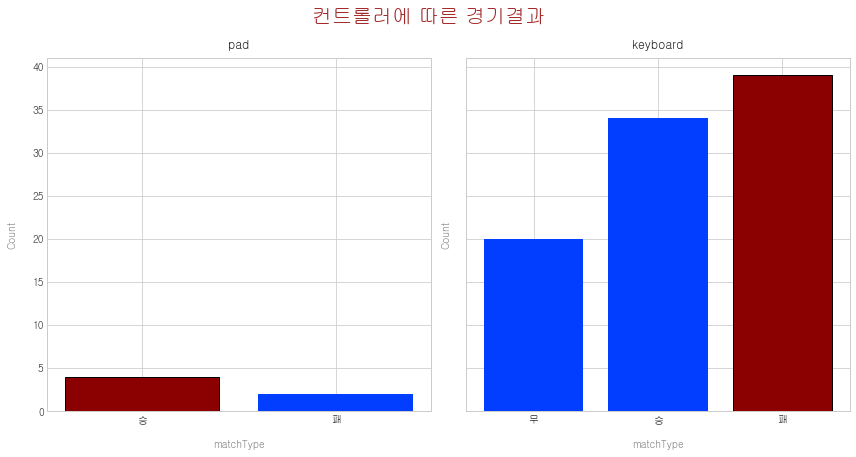

In [61]:
# 전체 경기 평점
suptitle = '컨트롤러에 따른 경기결과'
title_list = ['pad', 'keyboard']
data_list = [pad, keyboard]
idx_list = [0, 2]

fig, ax = plt.subplots(1,2,figsize=(12,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].bar(list(data.index), data['matchResult'])
    ax[idx].set_xlabel('matchType', fontdict=font_label, labelpad=15)
    ax[idx].set_ylabel('Count', fontdict=font_label, labelpad=15)
    ax[idx].set_title(title_list[idx], pad=10)
    ax[idx].patches[idx_list[idx]].set_facecolor('darkred')
    ax[idx].patches[idx_list[idx]].set_edgecolor('black')
    
plt.suptitle(suptitle, fontdict=font_title, y=1.05, fontsize = 20)
plt.savefig(f'images/{suptitle}.png', bbox_inches = 'tight')
fig.tight_layout()

In [62]:
with open('C:/FIFA4/pickles/my_HOJJIMIN.pkl', 'wb') as f:
    pickle.dump(my_HOJJIMIN, f)

In [63]:
with open('C:/FIFA4/pickles/not_HOJJIMIN.pkl', 'wb') as f:
    pickle.dump(not_HOJJIMIN, f)

# Shoot

In [64]:
with open('C:/FIFA4/pickles/my_HOJJIMIN.pkl', 'rb') as f:
    my_HOJJIMIN = pickle.load(f)
    
print(my_HOJJIMIN.shape)

(100, 63)


## 데이터 전처리

In [65]:
columns_list = HOJJIMIN.columns.to_list()
print('ShootDTO 시작 column : ', columns_list.index('shootTotal'))
print('ShootDTO 끝 column : ', columns_list.index('goalPenaltyKick'))
shoot_columns = columns_list[19:35]
shoot_columns

ShootDTO 시작 column :  19
ShootDTO 끝 column :  34


['shootTotal',
 'effectiveShootTotal',
 'shootOutScore',
 'goalTotal',
 'goalTotalDisplay',
 'ownGoal',
 'shootHeading',
 'goalHeading',
 'shootFreekick',
 'goalFreekick',
 'shootInPenalty',
 'goalInPenalty',
 'shootOutPenalty',
 'goalOutPenalty',
 'shootPenaltyKick',
 'goalPenaltyKick']

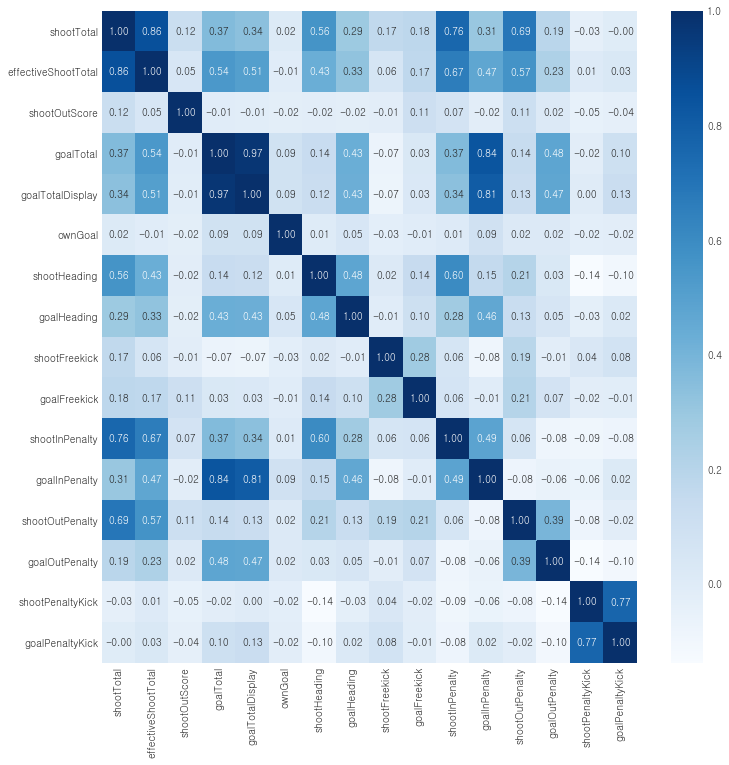

In [66]:
# 슛 변수 간의 상관관계 확인
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(HOJJIMIN[shoot_columns].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [67]:
# 골 성공률 변수 생성
print('변수 생성 이전 데이터 형태 : ', HOJJIMIN.shape)
print('변수 생성 이전 데이터 형태 : ', my_HOJJIMIN.shape)
print('변수 생성 이전 데이터 형태 : ', not_HOJJIMIN.shape)
print('-'*50)

shoot_kind = ['Heading', 'Freekick', 'InPenalty', 'OutPenalty', 'PenaltyKick']

for kind in shoot_kind:
    HOJJIMIN[f'goal{kind}_rate'] = round(HOJJIMIN[f'goal{kind}'] / HOJJIMIN[f'shoot{kind}'], 2)
    my_HOJJIMIN[f'goal{kind}_rate'] = round(my_HOJJIMIN[f'goal{kind}'] / my_HOJJIMIN[f'shoot{kind}'], 2)
    not_HOJJIMIN[f'goal{kind}_rate'] = round(not_HOJJIMIN[f'goal{kind}'] / not_HOJJIMIN[f'shoot{kind}'], 2)
    
print('변수 생성 이후 데이터 형태 : ', HOJJIMIN.shape)
print('변수 생성 이후 데이터 형태 : ', my_HOJJIMIN.shape)
print('변수 생성 이후 데이터 형태 : ', not_HOJJIMIN.shape)

변수 생성 이전 데이터 형태 :  (200, 53)
변수 생성 이전 데이터 형태 :  (100, 63)
변수 생성 이전 데이터 형태 :  (100, 53)
--------------------------------------------------
변수 생성 이후 데이터 형태 :  (200, 58)
변수 생성 이후 데이터 형태 :  (100, 68)
변수 생성 이후 데이터 형태 :  (100, 58)


In [68]:
print('변수 생성 이전 데이터 형태 : ', HOJJIMIN.shape)
print('변수 생성 이전 데이터 형태 : ', my_HOJJIMIN.shape)
print('변수 생성 이전 데이터 형태 : ', not_HOJJIMIN.shape)
print('-'*50)
HOJJIMIN['goal_own_rate'] = round(HOJJIMIN['ownGoal'] / HOJJIMIN['goalTotal'])
print('변수 생성 이후 데이터 형태 : ', HOJJIMIN.shape)
print('변수 생성 이후 데이터 형태 : ', my_HOJJIMIN.shape)
print('변수 생성 이후 데이터 형태 : ', not_HOJJIMIN.shape)

변수 생성 이전 데이터 형태 :  (200, 58)
변수 생성 이전 데이터 형태 :  (100, 68)
변수 생성 이전 데이터 형태 :  (100, 58)
--------------------------------------------------
변수 생성 이후 데이터 형태 :  (200, 59)
변수 생성 이후 데이터 형태 :  (100, 68)
변수 생성 이후 데이터 형태 :  (100, 58)


In [69]:
# 전체 골 중 해당 슛 비율
print('변수 생성 이전 데이터 형태 : ', HOJJIMIN.shape)
print('변수 생성 이전 데이터 형태 : ', my_HOJJIMIN.shape)
print('변수 생성 이전 데이터 형태 : ', not_HOJJIMIN.shape)
print('-'*50)

for kind in shoot_kind:
    HOJJIMIN[f'total_goal{kind}_rate'] = round(HOJJIMIN[f'goal{kind}'] / HOJJIMIN[f'goalTotal'], 2)
    my_HOJJIMIN[f'total_goal{kind}_rate'] = round(my_HOJJIMIN[f'goal{kind}'] / my_HOJJIMIN[f'goalTotal'], 2)
    not_HOJJIMIN[f'total_goal{kind}_rate'] = round(not_HOJJIMIN[f'goal{kind}'] / not_HOJJIMIN[f'goalTotal'], 2)
    
print('변수 생성 이후 데이터 형태 : ', HOJJIMIN.shape)
print('변수 생성 이후 데이터 형태 : ', my_HOJJIMIN.shape)
print('변수 생성 이후 데이터 형태 : ', not_HOJJIMIN.shape)

변수 생성 이전 데이터 형태 :  (200, 59)
변수 생성 이전 데이터 형태 :  (100, 68)
변수 생성 이전 데이터 형태 :  (100, 58)
--------------------------------------------------
변수 생성 이후 데이터 형태 :  (200, 64)
변수 생성 이후 데이터 형태 :  (100, 73)
변수 생성 이후 데이터 형태 :  (100, 63)


In [70]:
# 200개 데이터
HOJJIMIN[HOJJIMIN.columns[HOJJIMIN.columns.str.contains('rate')]].describe()

,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,goal_own_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
count,119.000000,12.000000,192.00,172.000000,10.000000,155.0,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.303782,0.083333,inf,0.191279,0.600000,0.0,0.178323,0.003226,0.718516,0.258387,0.023097
std,0.417446,0.288675,NaN,0.310639,0.516398,0.0,0.310224,0.040161,0.361386,0.354688,0.129653
min,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
50%,0.000000,0.000000,0.33,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.500000,0.000000,0.50,0.330000,1.000000,0.0,0.330000,0.000000,1.000000,0.500000,0.000000
max,1.000000,1.000000,inf,1.000000,1.000000,0.0,1.000000,0.500000,1.000000,1.000000,1.000000


In [71]:
# 나의 100개 데이터
my_HOJJIMIN[my_HOJJIMIN.columns[my_HOJJIMIN.columns.str.contains('rate')]].describe()

,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
count,57.000000,7.0,98.000000,88.000000,9.000000,76.000000,76.0,76.000000,76.000000,76.000000
mean,0.365439,0.0,0.348163,0.164545,0.666667,0.150000,0.0,0.731447,0.221447,0.047105
std,0.477097,0.0,0.321371,0.297815,0.500000,0.272759,0.0,0.355564,0.337930,0.182675
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.000000
50%,0.000000,0.0,0.330000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000
75%,1.000000,0.0,0.500000,0.270000,1.000000,0.270000,0.0,1.000000,0.500000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [72]:
# 상대방 100개 데이터
not_HOJJIMIN[not_HOJJIMIN.columns[not_HOJJIMIN.columns.str.contains('rate')]].describe()

,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
count,62.000000,5.000000,94.00,84.000000,1.0,79.000000,79.000000,79.000000,79.000000,79.0
mean,0.247097,0.200000,inf,0.219286,0.0,0.205570,0.006329,0.706076,0.293924,0.0
std,0.348300,0.447214,NaN,0.322934,NaN,0.341965,0.056254,0.368738,0.368738,0.0
min,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.0
50%,0.000000,0.000000,0.25,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0
75%,0.500000,0.000000,0.50,0.330000,0.0,0.330000,0.000000,1.000000,0.500000,0.0
max,1.000000,1.000000,inf,1.000000,0.0,1.000000,0.500000,1.000000,1.000000,0.0


- 각 골 비율에 결측값들이 다수 존재하지만, 각 변수에 따라 결측값 처리 방법을 다르게 한다.
- goalHeading_rate 와 같이 해당 슛의 성공 비율을 보는 변수들은 0으로 결측값 처리를 할 필요가 없을 듯 하다.
    - **성공비율을 보는 것이기 때문에** 시도하지 않은 값들에 임의로 결측값들을 모두 채워버리면, 성공 비율을 이해하는데 혼잡을 야기할 수 있기 때문이다.
- 대신, total_goalHeading_rate와 같은 값들은 **전체 슈팅 중 해당 골의 비율을 보는 것**이기 때문에, goalTotal 값이 0이면 나머지 비율도 0으로 얘기할 수 있다.

In [73]:
# 결측값 채우기
na_columns = list(HOJJIMIN.columns[HOJJIMIN.columns.str.contains('total_goal')])
na_columns

['total_goalHeading_rate',
 'total_goalFreekick_rate',
 'total_goalInPenalty_rate',
 'total_goalOutPenalty_rate',
 'total_goalPenaltyKick_rate']

In [74]:
print('결측값 채우기 이전 데이터 : \n', HOJJIMIN.isna().sum())

for col in na_columns:
    HOJJIMIN[col] = HOJJIMIN[col].fillna(0)
    
print('-'*50)
print('결측값 채우기 이후 데이터 : \n', HOJJIMIN.isna().sum())

결측값 채우기 이전 데이터 : 
 matchId                        0
matchDate                      0
matchType                      0
accessId                       0
nickname                       0
                              ..
total_goalHeading_rate        45
total_goalFreekick_rate       45
total_goalInPenalty_rate      45
total_goalOutPenalty_rate     45
total_goalPenaltyKick_rate    45
Length: 64, dtype: int64
--------------------------------------------------
결측값 채우기 이후 데이터 : 
 matchId                       0
matchDate                     0
matchType                     0
accessId                      0
nickname                      0
                             ..
total_goalHeading_rate        0
total_goalFreekick_rate       0
total_goalInPenalty_rate      0
total_goalOutPenalty_rate     0
total_goalPenaltyKick_rate    0
Length: 64, dtype: int64


- goalInPenalty_rate 값에 inf 값이 뜨는데, 이를 살펴보자.

In [75]:
HOJJIMIN[HOJJIMIN['goalInPenalty_rate']==np.inf]

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,goal_own_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
43,5f8c448608af5e4439bac616,2020-10-18T22:45:26,50,92ba13cf95b17873160d6a07,킹묵FC,202011,패,0,0,0,0,0,0,75,0,47,1,3.76667,keyboard,2,2,0,2,2,0,0,0,0,0,0,1,1,1,0,0,83,72,66,61,0,0,0,0,0,0,16,11,1,0,12,1,20,7,NaN,NaN,inf,1.0,NaN,0.0,0.0,0.0,0.5,0.5,0.0


In [76]:
HOJJIMIN.iloc[42:44]

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,goal_own_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
42,5f8c448608af5e4439bac616,2020-10-18T22:45:26,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202011,승,0,0,0,0,0,0,96,4,53,0,4.16667,gamepad,8,7,0,3,3,0,1,0,0,0,6,3,2,0,0,0,114,104,87,84,8,5,0,0,4,4,12,10,3,1,7,1,8,1,0.0,NaN,0.5,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0
43,5f8c448608af5e4439bac616,2020-10-18T22:45:26,50,92ba13cf95b17873160d6a07,킹묵FC,202011,패,0,0,0,0,0,0,75,0,47,1,3.76667,keyboard,2,2,0,2,2,0,0,0,0,0,0,1,1,1,0,0,83,72,66,61,0,0,0,0,0,0,16,11,1,0,12,1,20,7,NaN,NaN,inf,1.0,NaN,0.0,0.0,0.0,0.5,0.5,0.0


- goalInPenalty_rate는 왜 inf 값을 가질까?
- 43번 인덱스의 행을 살펴보면, 상대방은 shootInPenalty 값이 0인데, goalInPenalty 값이 1이어서 1/0의 값이 나오게 된다.
    - 왜? shoot 횟수가 0인데, goal 값이 1이 나오는 이유가 뭘까 ,, 문의해봐야 할 듯.
    - 1로 처리해야겠다.

In [77]:
HOJJIMIN.loc[43, 'goalInPenalty_rate'] = 1
HOJJIMIN.loc[43]

matchId                       5f8c448608af5e4439bac616
matchDate                          2020-10-18T22:45:26
matchType                                           50
accessId                      92ba13cf95b17873160d6a07
nickname                                          킹묵FC
                                        ...           
total_goalHeading_rate                               0
total_goalFreekick_rate                              0
total_goalInPenalty_rate                           0.5
total_goalOutPenalty_rate                          0.5
total_goalPenaltyKick_rate                           0
Name: 43, Length: 64, dtype: object

In [ ]:
# 이상값 처리
not_HOJJIMIN.loc[not_HOJJIMIN['goalInPenalty_rate'] == np.inf, 'goalInPenalty_rate'] = 1
not_HOJJIMIN['goalInPenalty_rate'].describe()

In [78]:
HOJJIMIN[HOJJIMIN.columns[HOJJIMIN.columns.str.contains('rate')]].describe()

,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,goal_own_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
count,119.000000,12.000000,192.000000,172.000000,10.000000,155.0,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.303782,0.083333,0.336719,0.191279,0.600000,0.0,0.138200,0.002500,0.556850,0.200250,0.017900
std,0.417446,0.288675,0.311786,0.310639,0.516398,0.0,0.282929,0.035355,0.437657,0.330236,0.114464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.330000,0.000000,1.000000,0.0,0.000000,0.000000,0.670000,0.000000,0.000000
75%,0.500000,0.000000,0.500000,0.330000,1.000000,0.0,0.000000,0.000000,1.000000,0.372500,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.500000,1.000000,1.000000,1.000000


## 슛 종류별 골 비율

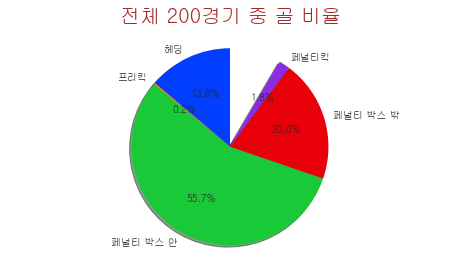

In [318]:
# 전체 200경기 중 전체 골 비율
labels = ['헤딩', '프리킥', '페널티 박스 안', '페널티 박스 밖', '페널티킥']
sizes = [HOJJIMIN[HOJJIMIN.columns[HOJJIMIN.columns.str.contains('total_goal')]].mean()]
explode = (0,0,0,0,0)

title = '전체 200경기 중 골 비율'
fig, ax = plt.subplots(figsize=(8,4))
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
       shadow = True, startangle = 90)
ax.axis('equal')
ax.set_title(title, fontdict=font_title, y=1.05)
plt.savefig(f'images/{title}.png')
plt.show()

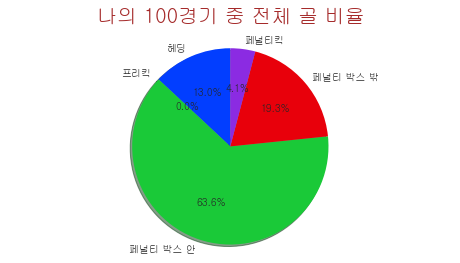

In [88]:
# 나의 100경기 중 전체 골 비율
labels = ['헤딩', '프리킥', '페널티 박스 안', '페널티 박스 밖', '페널티킥']
sizes = [my_HOJJIMIN[my_HOJJIMIN.columns[my_HOJJIMIN.columns.str.contains('total_goal')]].mean()]
explode = (0,0,0,0,0)

title = '나의 100경기 중 골 비율'
fig, ax = plt.subplots(figsize=(8,4))
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
       shadow = True, startangle = 90)
ax.axis('equal')
ax.set_title(title, fontdict=font_title, y=1.05)
plt.savefig(f'images/{title}.png')
plt.show()

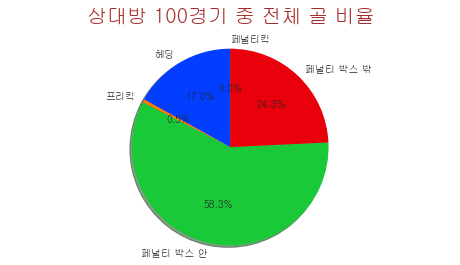

In [89]:
# 상대방 100경기 중 전체 골 비율
labels = ['헤딩', '프리킥', '페널티 박스 안', '페널티 박스 밖', '페널티킥']
sizes = [not_HOJJIMIN[not_HOJJIMIN.columns[not_HOJJIMIN.columns.str.contains('total_goal')]].mean()]
explode = (0,0,0,0,0)

title = '상대방 100경기 중 골 비율'
fig, ax = plt.subplots(figsize=(8,4))
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
       shadow = True, startangle = 90)
ax.axis('equal')
ax.set_title(title, fontdict=font_title, y=1.05)
plt.savefig(f'images/{title}.png')
plt.show()

- 나의 데이터를 본다면,
    - 페널티 박스 안 > 페널티 박스 밖 > 헤딩 > 페널티킥 > 프리킥 순서대로 골 비율이 높았고
- 상대방 데이터를 본다면,
    - 페너리 박스 안 > 페널티 박스 밖 > 헤딩 > 프리킥(0.5%) > 페널티킥(0.0%) 순서대로 골 비율이 높았다.
       
**나는 프리킥을 한번도 성공하지 못했다는 것과 페널티킥으로 한번도 먹힌 적이 없다는 인사이트를 도출할 수 있었다.**

## 슛 성공률

In [90]:
total_goal_rate_list = HOJJIMIN.columns[HOJJIMIN.columns.str.contains('total_goal')] # 전체 골 중 해당 골 비율
goal_rate_list = HOJJIMIN.columns[HOJJIMIN.columns.str.contains('rate')][:6] # 해당 슛 성공률

In [322]:
data = pd.DataFrame({'shoot_kind' : goal_rate_list[:-1],
                   'value' : HOJJIMIN[goal_rate_list[:-1]].mean()}).reset_index(drop=True)
data

,shoot_kind,value
0,goalHeading_rate,0.303782
1,goalFreekick_rate,0.083333
2,goalInPenalty_rate,0.336719
3,goalOutPenalty_rate,0.191279
4,goalPenaltyKick_rate,0.600000


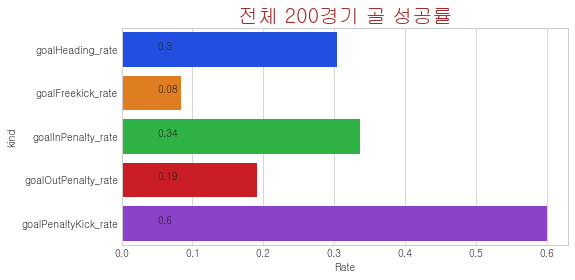

In [324]:
title = '전체 200경기 골 성공률'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='value', y='shoot_kind', data=data)
ax.set_xlabel('Rate')
ax.set_ylabel('kind')
ax.set_title(title, fontdict=font_title)

for idx, value in enumerate(data['value']):
    ax.text(0.05, idx, round(value, 2))
    
plt.savefig(f'images/{title}.png', bbox_inches='tight')
plt.show()

In [325]:
data = pd.DataFrame({'shoot_kind' : goal_rate_list[:-1],
                   'value' : my_HOJJIMIN[goal_rate_list[:-1]].mean()}).reset_index(drop=True)
data

,shoot_kind,value
0,goalHeading_rate,0.365439
1,goalFreekick_rate,0.000000
2,goalInPenalty_rate,0.348163
3,goalOutPenalty_rate,0.164545
4,goalPenaltyKick_rate,0.666667


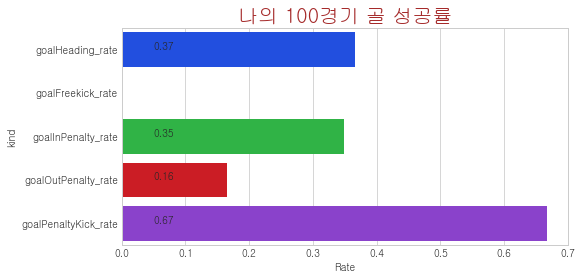

In [326]:
title = '나의 100경기 골 성공률'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='value', y='shoot_kind', data=data)
ax.set_xlabel('Rate')
ax.set_ylabel('kind')
ax.set_title(title, fontdict=font_title)

for idx, value in enumerate(data['value']):
    if idx == 1:
        continue
    ax.text(0.05, idx, round(value, 2))
    
plt.savefig(f'images/{title}.png', bbox_inches='tight')
plt.show()

In [375]:
data = pd.DataFrame({'shoot_kind' : goal_rate_list[:-1],
                   'value' : not_HOJJIMIN[goal_rate_list[:-1]].mean()}).reset_index(drop=True)
data

,shoot_kind,value
0,goalHeading_rate,0.247097
1,goalFreekick_rate,0.200000
2,goalInPenalty_rate,0.324787
3,goalOutPenalty_rate,0.219286
4,goalPenaltyKick_rate,0.000000


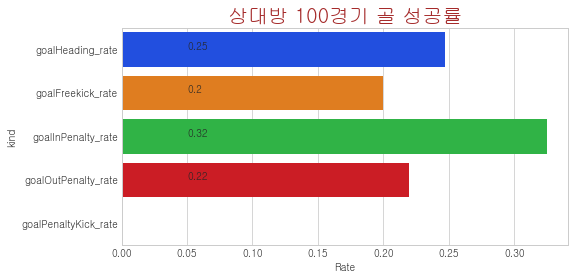

In [377]:
title = '상대방 100경기 골 성공률'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='value', y='shoot_kind', data=data)
ax.set_xlabel('Rate')
ax.set_ylabel('kind')
ax.set_title(title, fontdict=font_title)

for idx, value in enumerate(data['value']):
    if idx == 4:
        continue
    ax.text(0.05, idx, round(value, 2))
    
plt.savefig(f'images/{title}.png', bbox_inches='tight')
plt.show()

- 나의 데이터를 본다면, 페널티 킥 (67%) > 헤딩 (37%) > 페널티 안 (35%) > 페널티 밖 (16%) > 프리킥 (0%) 순서대로 골 성공률이 높다.
- 상대방 데이터를 본다면, 페널티 안 (32%) > 헤딩 (25%) > 페널티 밖 (22%) > 프리킥 (20%) > 페널티 킥 (0%) 순서대로 골 성공률이 높다.
   
페널티 킥과 프리킥은 총 몇번 발생했길래 각각의 확률이 나왔는지 볼 필요가 존재한다.   

대체로 헤딩이나 페널티 안에서 골이 많이 발생하는 듯하다.   

그렇다면, 헤딩에 필요한 롱패스 or 크로스와 페널티 안에서 발생하는 골의 요인들은 무엇이 존재할까?    

상관관계와 회귀분석을 통해 알아볼 수 있을 듯 함.

In [378]:
not_HOJJIMIN['shootFreekick'].describe()

count    100.000000
mean       0.050000
std        0.219043
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: shootFreekick, dtype: float64

In [380]:
not_HOJJIMIN.loc[not_HOJJIMIN['shootFreekick'] > 0, 'shootFreekick':'goalFreekick']

,shootFreekick,goalFreekick
15,1,0
78,1,0
96,1,1
164,1,0
168,1,0


In [381]:
my_HOJJIMIN.loc[my_HOJJIMIN['shootPenaltyKick'] > 0, 'shootPenaltyKick':'goalPenaltyKick']

,shootPenaltyKick,goalPenaltyKick
2,1,0
47,1,1
50,1,1
59,1,1
65,1,1
70,1,1
83,1,1
88,1,0
89,1,0


- 프리킥은 총 5번의 시도 중 1번 들어갔다.
- 페널티 킥은 9번의 시도 중 6번 들어갔다.

## 히스토그램

In [79]:
shoot_array = np.array(shoot_columns).reshape(4,-1)
shoot_array

array([['shootTotal', 'effectiveShootTotal', 'shootOutScore',
        'goalTotal'],
       ['goalTotalDisplay', 'ownGoal', 'shootHeading', 'goalHeading'],
       ['shootFreekick', 'goalFreekick', 'shootInPenalty',
        'goalInPenalty'],
       ['shootOutPenalty', 'goalOutPenalty', 'shootPenaltyKick',
        'goalPenaltyKick']], dtype='<U19')

In [80]:
for j,col in enumerate(shoot_array):
    print(j, col)

0 ['shootTotal' 'effectiveShootTotal' 'shootOutScore' 'goalTotal']
1 ['goalTotalDisplay' 'ownGoal' 'shootHeading' 'goalHeading']
2 ['shootFreekick' 'goalFreekick' 'shootInPenalty' 'goalInPenalty']
3 ['shootOutPenalty' 'goalOutPenalty' 'shootPenaltyKick' 'goalPenaltyKick']


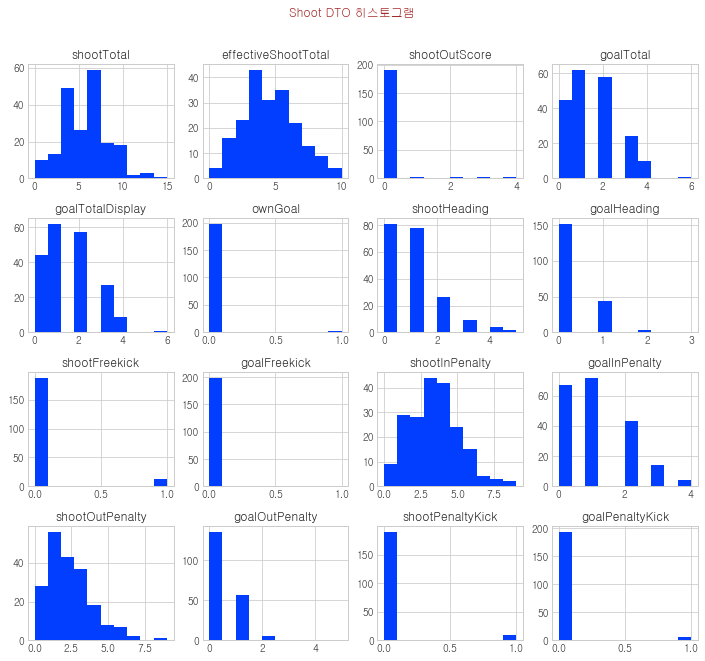

In [81]:
suptitle = '전체 Shoot DTO 히스토그램'
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12,10))

for i in range(0,4):
    for j,col in enumerate(shoot_array):
        ax[i,j].hist(HOJJIMIN[shoot_array[i,j]].values)
        ax[i,j].set_title(shoot_array[i,j])
fig.suptitle(figtitle, fontdict=font_title)        
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
plt.show()

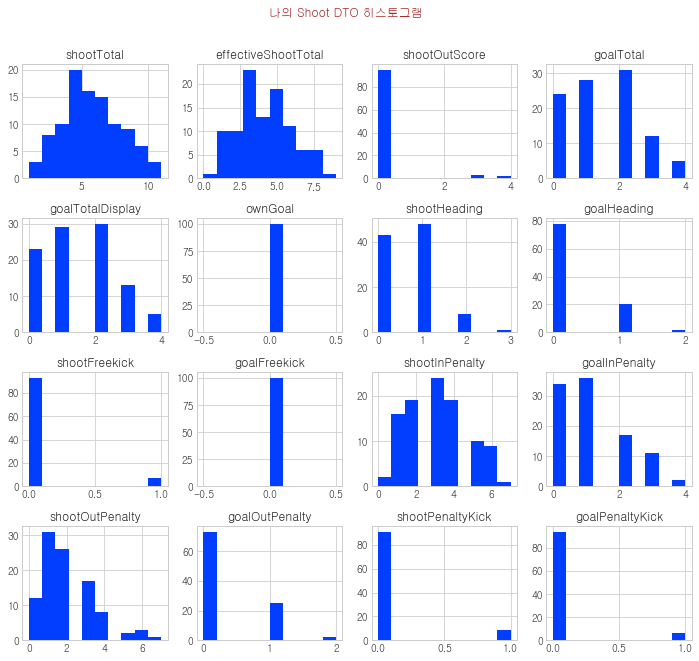

In [220]:
figtitle = '나의 Shoot DTO 히스토그램'
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12,10))

for i in range(0,4):
    for j,col in enumerate(shoot_array):
        ax[i,j].hist(my_HOJJIMIN[shoot_array[i,j]].values)
        ax[i,j].set_title(shoot_array[i,j])
fig.suptitle(figtitle, fontdict=font_title)        
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.savefig(f'images/{figtitle}.png', bbox_inches='tight')
plt.show()

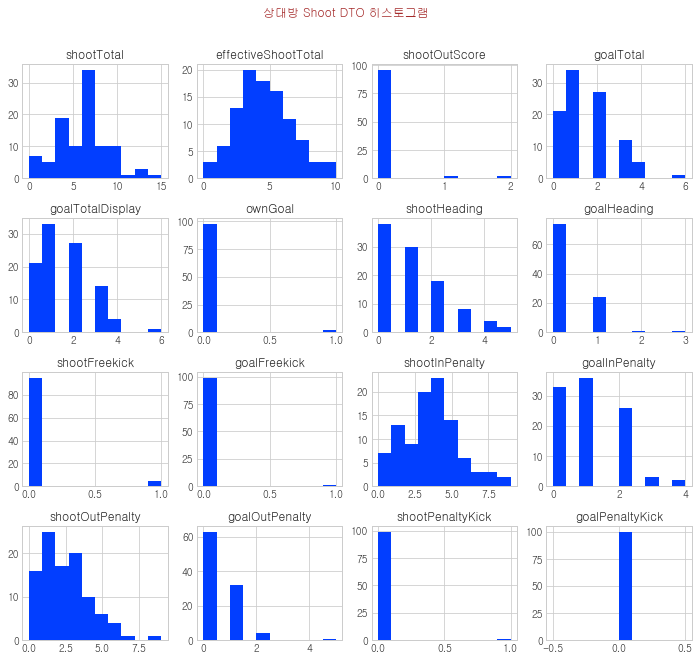

In [221]:
figtitle = '상대방 Shoot DTO 히스토그램'
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12,10))

for i in range(0,4):
    for j,col in enumerate(shoot_array):
        ax[i,j].hist(not_HOJJIMIN[shoot_array[i,j]].values)
        ax[i,j].set_title(shoot_array[i,j])
fig.suptitle(figtitle, fontdict=font_title)        
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.savefig(f'images/{figtitle}.png', bbox_inches='tight')
plt.show()

## 박스플롯

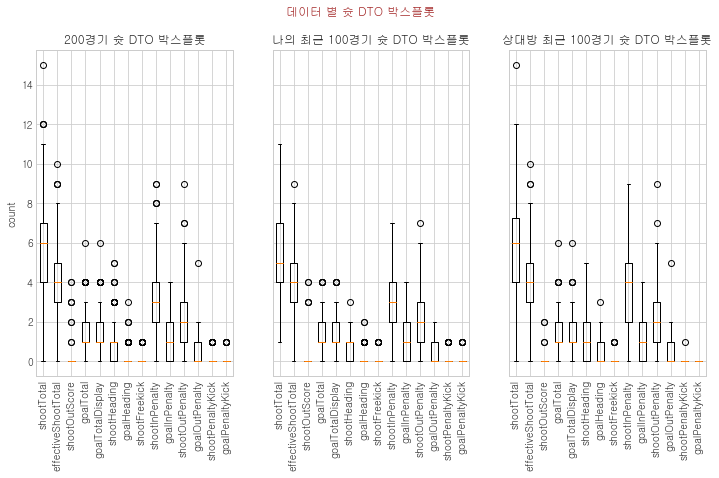

In [294]:
suptitle = '데이터 별 슛 DTO 박스플롯'
title_list = ['200경기 슛 DTO 박스플롯', '나의 최근 100경기 슛 DTO 박스플롯', '상대방 최근 100경기 슛 DTO 박스플롯']
data_list = [HOJJIMIN, my_HOJJIMIN, not_HOJJIMIN]

fig, ax = plt.subplots(ncols=3, figsize=(12,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].boxplot(data[shoot_columns].values)
    ax[idx].set_xticks([i for i in range(1, len(shoot_columns)+1)])
    ax[idx].set_xticklabels(shoot_columns, rotation=90)
    ax[0].set_ylabel('count')
    ax[idx].set_title(title_list[idx])
fig.suptitle(suptitle, fontdict = font_title)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
plt.show()

**나의 100경기 데이터 해석**
- shootTotal(슈팅 총 횟수) : 평균 5번 슛, 최대 11번, 최소 1번 발생, 이상치 존재 x
- effectiveShootTotal(유효 슈팅) : 평균 4번, 최대 9번, 최소 0번 발생, 이상치 값 존재 (9)
- shootOutScore (승부차기 슛 수) : 최대 4번, 최소 0번, 승부차기 횟수가 많이 발생하지 않아 이상치 값으로 뜸.
- goalTotal (총 골 수) : 평균 1골, 최대 4골, 최소 0골 발생, 이상치 값 존재 (4)
- goalTotalDisplay (몰수승, 몰수패 시 display 되는 골 수 ) : GoalTotal과 같은 형태
- ownGoal (자책 골 수) : 모두 0번으로 자책골 경우 X
- shootHeading (헤딩 슛 수) : 평균 1번, 최대 3번, 최소 0번 발생, 이상치 값 존재 (3)
- goalHeading (헤딩 골 수) : 평균 0번, 최대 2번, 최소 0번 발생, 이상치 값 존재 (2, 3)
- shootFreekick (프리킥 슛 수) : 평균 0번, 최대 1번, 최소 0번 발생, 이상치 값 존재 (1)
- goalFreekick (프리킥 골 수) : 모두 0번으로 프리킥으로 넣은 골 경우 X
- shootInPenalty (인패널티 슛 수) : 평균 3번, 최대 7번, 최소 0번 발생, 이상치 값 존재 x
- goalInPenalty (인패널티 골 수) : 평균 1번, 최대 4번, 최소 0번 발생, 이상치 값 존재 x
- shootOutPenalty (아웃패널티 슛 수) : 평균 2번, 최대 7번, 최소 0번 발생, 이상치 값 존재 (7)
- goalOutPenalty (아웃패널티 골 수) : 평균 1번, 최대 4번, 최소 0번 발생, 이상치 값 존재 x
- shootPenaltyKick (페널티킥 슛 수) : 평균 0번, 최대 1번, 최소 0번 발생, 이상치 값 존재 (1)
- goalPenaltyKick (페널티킥 골 수) : 평균 0번, 최대 1번, 최소 0번 발생, 이상치 값 존재 (1)

- 유효슈팅이 많았던 경기 살펴볼 수 있음. 왜 많았는지?, 경기가 어떻게 진행됐는지?
- 인페널티에서 슛과 골 가장 많이 나왔다.
    - 전체 골 중 각 슛이 차지하는 비율을 알아보자.

### 경기 결과 비교

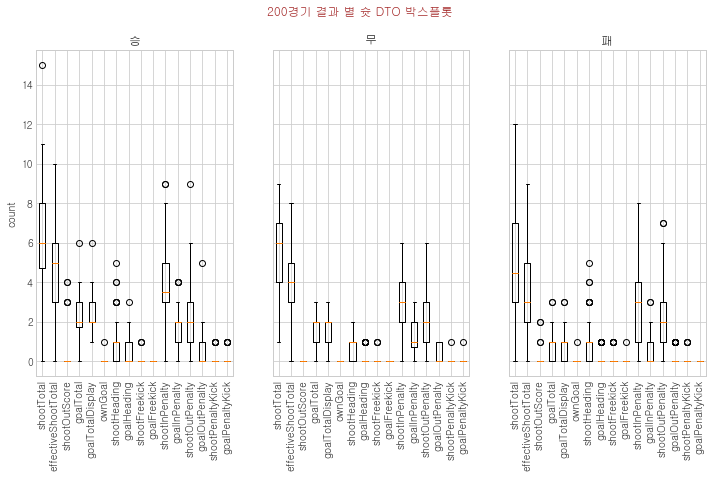

In [85]:
# 200개 데이터 - HOJJIMIN
# 경기 결과에 따른 박스플롯 확인
win = HOJJIMIN.loc[HOJJIMIN['matchResult']=='승']
draw = HOJJIMIN.loc[HOJJIMIN['matchResult']=='무']
lose = HOJJIMIN.loc[HOJJIMIN['matchResult']=='패']

title_list = ['승', '무', '패']
data_list = [win, draw, lose]
suptitle = '200경기 결과 별 슛 DTO 박스플롯'

fig, ax = plt.subplots(ncols=3, figsize=(12,6), sharey=True)
for idx,data in enumerate(data_list):
    ax[idx].boxplot(data[shoot_columns].values)
    ax[idx].set_xticks([i for i in range(1, len(shoot_columns)+1)])
    ax[idx].set_xticklabels(shoot_columns, rotation=90)
    ax[0].set_ylabel('count')
    ax[idx].set_title(title_list[idx])
fig.suptitle(suptitle, fontdict=font_title)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
plt.show()

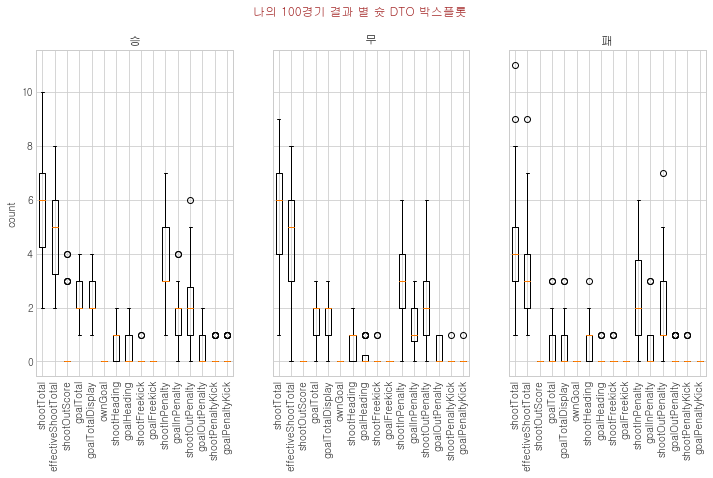

In [86]:
# 100개 데이터 - my_HOJJIMIN
# 경기 결과에 따른 박스플롯 확인
win = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='승']
draw = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='무']
lose = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='패']

title_list = ['승', '무', '패']
data_list = [win, draw, lose]
suptitle = '나의 100경기 결과 별 슛 DTO 박스플롯'

fig, ax = plt.subplots(ncols=3, figsize=(12,6), sharey=True)
for idx,data in enumerate(data_list):
    ax[idx].boxplot(data[shoot_columns].values)
    ax[idx].set_xticks([i for i in range(1, len(shoot_columns)+1)])
    ax[idx].set_xticklabels(shoot_columns, rotation=90)
    ax[0].set_ylabel('count')
    ax[idx].set_title(title_list[idx])
fig.suptitle(suptitle, fontdict=font_title)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
plt.show()

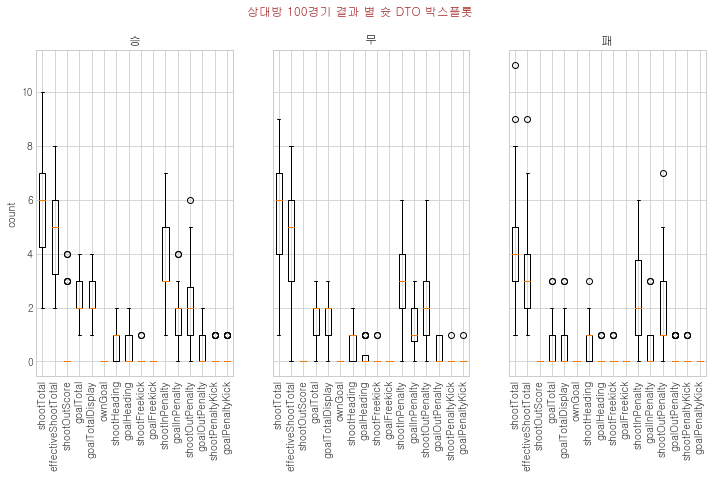

In [87]:
# 100개 데이터 - not_HOJJIMIN
# 경기 결과에 따른 박스플롯 확인
win = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='승']
draw = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='무']
lose = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='패']

title_list = ['승', '무', '패']
data_list = [win, draw, lose]
suptitle = '상대방 100경기 결과 별 슛 DTO 박스플롯'

fig, ax = plt.subplots(ncols=3, figsize=(12,6), sharey=True)
for idx,data in enumerate(data_list):
    ax[idx].boxplot(data[shoot_columns].values)
    ax[idx].set_xticks([i for i in range(1, len(shoot_columns)+1)])
    ax[idx].set_xticklabels(shoot_columns, rotation=90)
    ax[0].set_ylabel('count')
    ax[idx].set_title(title_list[idx])
fig.suptitle(suptitle, fontdict=font_title)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
plt.show()

## ANOVA-Test (전체 데이터)

### 정규성 검정

In [267]:
shoot_norm_test_list = devide_test(HOJJIMIN, shoot_columns)
shoot_norm_list, shoot_notnorm_list = shoot_norm_test_list.test()
print('정규성 만족 변수들 : ', shoot_norm_list)
print('정규성 불만족 변수들 : ', shoot_notnorm_list)

정규성 만족 변수들 :  ['shootTotal', 'effectiveShootTotal', 'goalTotal', 'goalTotalDisplay', 'shootInPenalty', 'goalInPenalty', 'shootOutPenalty']
정규성 불만족 변수들 :  ['shootOutScore', 'shootHeading', 'goalHeading', 'shootFreekick', 'goalOutPenalty', 'shootPenaltyKick', 'goalPenaltyKick']


### 등분산 검정

In [269]:
win = HOJJIMIN.loc[HOJJIMIN['matchResult']=='승']
draw = HOJJIMIN.loc[HOJJIMIN['matchResult']=='무']
lose = HOJJIMIN.loc[HOJJIMIN['matchResult']=='패']

shoot_samevar_list, shoot_notsamevar_list = levene_test([win, draw, lose], shoot_norm_list, shoot_notnorm_list)
print('등분산 변수들 : ', shoot_samevar_list)
print('이분산 변수들 : ', shoot_notsamevar_list)

등분산 변수들 :  ['shootTotal', 'effectiveShootTotal', 'goalTotal', 'goalTotalDisplay', 'shootInPenalty', 'shootOutPenalty']
이분산 변수들 :  ['goalInPenalty']


### 분산분석 검정

In [270]:
shoot_mean_list, shoot_notmean_list = analysis_var(HOJJIMIN, 'matchResult', [win,draw,lose], shoot_norm_list, shoot_notnorm_list)
print('유의미한 분산 분석 변수들 : ', shoot_mean_list)
print('무의미한 분산 분석 변수들 : ', shoot_notmean_list)

유의미한 분산 분석 변수들 :  ['effectiveShootTotal', 'goalTotal', 'goalTotalDisplay', 'shootInPenalty', 'goalInPenalty']
무의미한 분산 분석 변수들 :  ['shootTotal', 'shootOutPenalty']


### 사후 분석

In [271]:
posthoc_test(HOJJIMIN, shoot_mean_list, 'matchResult')

effectiveShootTotal
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     무      승    0.425 0.5097 -0.4795 1.3295  False
     무      패  -0.8375  0.076  -1.742  0.067  False
     승      패  -1.2625  0.001  -2.001 -0.524   True
---------------------------------------------------
--------------------------------------------------
goalTotal
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     무      승   0.7625 0.001  0.3393  1.1857   True
     무      패  -0.8125 0.001 -1.2357 -0.3893   True
     승      패   -1.575 0.001 -1.9205 -1.2295   True
---------------------------------------------------
--------------------------------------------------
goalTotalDisplay
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
-------------------

#### 사후 분석 결과
- effectiveShootTotal : 승&패
- goalTotal : 승&무, 승&패, 무&패
- goalTotalDisplay : 승&무, 승&패, 무&패
- shootInPenalty : 승&패
- goalInPenalty : 승&무, 승&패, 무&패 (이분산)

### 비모수 검정

In [272]:
shoot_nonparam_meaning_list, shoot_nonparam_notmeaning_list =  nonparam_test([win, draw, lose], shoot_notnorm_list)
print('유의미한 비모수적 검정 변수들 :', shoot_nonparam_meaning_list)
print('무의미한 비모수적 검정 변수들 :', shoot_nonparam_notmeaning_list)

유의미한 비모수적 검정 변수들 : ['goalHeading', 'goalOutPenalty']
무의미한 비모수적 검정 변수들 : ['shootOutScore', 'shootHeading', 'shootFreekick', 'shootPenaltyKick', 'goalPenaltyKick']


#### 사후분석

In [275]:
nonparam_posthoc(HOJJIMIN, shoot_nonparam_meaning_list, 'matchResult')

goalHeading
          무         승         패
무  1.000000  0.071329  0.450221
승  0.071329  1.000000  0.001624
패  0.450221  0.001624  1.000000
goalOutPenalty
          무         승         패
무  1.000000  0.473159  0.120197
승  0.473159  1.000000  0.004866
패  0.120197  0.004866  1.000000


#### 사후분석 결과
- goalHeading : 승&패
- goalOutPenalty : 승&패

## ANOVA-Test (나의 데이터)

### 정규성 검정

In [154]:
# 정규화 검정 클래스 구현
# shapiro_test를 먼저 진행한 후, 정규성 만족하는 경우가 하나도 없다면, 왜도 & 첨도를 활용하여 구한다.

class normalization_test:
    def __init__(self, data, cols):
        self.data = data
        self.cols = cols
    
    # shapiro-wilk test 정규성 검정
    def shapiro_test(self):
        
        alpha = 0.05

        norm_cols = []
        notnorm_cols = []

        for col in self.cols:
            stat, p = stats.shapiro(self.data[col].dropna().values)
            if p > alpha:
                norm_cols.append(col)
            else:
                notnorm_cols.append(col)
        return norm_cols, notnorm_cols
    
    # 왜도, 첨도를 활용한 정규성 검정
    # 왜도 < 2 & 첨도 < 2인 경우 정규성 만족한다 가정
    def not_shapiro_test(self):
        norm_cols = []
        notnorm_cols = []

        for col in self.cols:
            skew = self.data[col].skew()
            kurtosis = self.data[col].kurtosis()

            if skew <= 2 and kurtosis <= 2:
                norm_cols.append(col)
            else:
                notnorm_cols.append(col)     

        return norm_cols, notnorm_cols

In [155]:
# shapiro-test 할 것인지, 왜도&첨도로 구분할 것인지

class devide_test(normalization_test):    
    def test(self):        
        norm, notnorm = self.shapiro_test()
        
        if len(norm) == 0:
            norm, notnorm = self.not_shapiro_test()
            
        return norm, notnorm

In [ ]:
shoot_columns.remove('ownGoal')
shoot_columns.remove('goalFreekick')
shoot_columns

In [288]:
# 왜도, 첨도로 정규성 검정
# 자책 골이랑 프리킥 골은 모두 0이여서 의미 x
shoot_norm_test_list = devide_test(my_HOJJIMIN, shoot_columns)
shoot_norm_list, shoot_notnorm_list = shoot_norm_test_list.test()
print('정규성 만족 변수들 : ', shoot_norm_list)
print('정규성 불만족 변수들 : ', shoot_notnorm_list)

정규성 만족 변수들 :  ['shootTotal', 'effectiveShootTotal', 'goalTotal', 'goalTotalDisplay', 'shootHeading', 'shootInPenalty', 'goalInPenalty', 'shootOutPenalty', 'goalOutPenalty']
정규성 불만족 변수들 :  ['shootOutScore', 'goalHeading', 'shootFreekick', 'shootPenaltyKick', 'goalPenaltyKick']


### 등분산 검정

In [156]:
# 정규성을 만족하는 변수들의 등분산성 검정을 실행한다
# levene 등분산 검정을 활용한다.

def levene_test(data_list, norm_cols, notnorm_cols):
    same_var = []
    notsame_var = []
    
    for col in norm_cols:
        val, p = stats.levene(data_list[0][col], data_list[1][col], data_list[2][col])
        
        if p >= 0.05:
            same_var.append(col)
        else:
            notsame_var.append(col)
            
    return same_var, notsame_var

In [289]:
win = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='승']
draw = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='무']
lose = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='패']

shoot_samevar_list, shoot_notsamevar_list = levene_test([win, draw, lose], shoot_norm_list, shoot_notnorm_list)
print('등분산 변수들 : ', shoot_samevar_list)
print('이분산 변수들 : ', shoot_notsamevar_list)

등분산 변수들 :  ['shootTotal', 'effectiveShootTotal', 'goalTotal', 'goalTotalDisplay', 'shootHeading', 'shootInPenalty', 'shootOutPenalty', 'goalOutPenalty']
이분산 변수들 :  ['goalInPenalty']


### 분산 분석 검정

- 정규성 만족하는 변수들에 한하여, 등분산성인지, 이분산성인지에 따라 검정법을 다르게 한다.
- 정규성과 등분산성 모두 만족하는 경우 : ANOVA-Test를 진행한다.
- 정규성은 만족하지만 등분산성 만족하지 않는 경우 : Welch-ANOVA-Test를 진행한다.
- 각 분산분석의 귀무가설과 대립가설
- H0 : 독립변수 집단 간의 차이가 존재하지 않는다.
- H1 : 독립변수 집단 간의 차이가 존재한다.

In [157]:
def analysis_var(data, col_x, data_list, norm_cols, notnorm_cols):
    mean_anova = [] # 집단 간의 차이 존재하는 변수들
    notmean_anova = [] # 집단 간의 차이 존재하지 않는 변수들
    
    same_var, notsame_var = levene_test(data_list, norm_cols, notnorm_cols)
    for col1 in same_var: # 정규성 & 등분산성 만족하는 경우, ANOVA-Test 진행
        model = ols(f'{col1} ~ C({col_x})', data).fit()
        anova = anova_lm(model)
        anova_p = anova.iloc[0,4]
        
        if anova_p <= 0.05:
            mean_anova.append(col1)
        else:
            notmean_anova.append(col1)
            
    for col2 in notsame_var: # 정규성 만족, 등분산성 만족하지 않는 경우, welch-ANOVA-Test 진행
        welch_anova = pg.welch_anova(dv = col2, between=col_x, data=data)
        welch_p = welch_anova.iloc[0,4]
        
        if welch_p <= 0.05:
            mean_anova.append(col2)
        else:
            notmean_anova.append(col2)
            
    return mean_anova, notmean_anova

In [290]:
shoot_mean_list, shoot_notmean_list = analysis_var(my_HOJJIMIN, 'matchResult', [win,draw,lose], shoot_norm_list, shoot_notnorm_list)
print('유의미한 분산 분석 변수들 : ', shoot_mean_list)
print('무의미한 분산 분석 변수들 : ', shoot_notmean_list)

유의미한 분산 분석 변수들 :  ['shootTotal', 'effectiveShootTotal', 'goalTotal', 'goalTotalDisplay', 'shootInPenalty', 'goalInPenalty']
무의미한 분산 분석 변수들 :  ['shootHeading', 'shootOutPenalty', 'goalOutPenalty']


### 사후 검정

- (정규성 & 등분산성), (정규성 & 이분산성)인 경우, 분산분석에서 유의미한 변수들을 구했을 때, 진행하는 사후 분석 방법이다.

In [158]:
def posthoc_test(data, col_y, col_x):
    for col in col_y:
        mc = MultiComparison(data[col], data[col_x])
        result = mc.tukeyhsd()
        print(col)
        print(result)
        print('-'*50)

In [291]:
posthoc_test(my_HOJJIMIN, shoot_mean_list, 'matchResult')

shootTotal
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     무      승   0.3071 0.8439 -1.0849  1.6992  False
     무      패  -1.1026 0.1579 -2.5182  0.3129  False
     승      패  -1.4098 0.0118  -2.557 -0.2626   True
----------------------------------------------------
--------------------------------------------------
effectiveShootTotal
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     무      승   0.1143    0.9 -1.1195  1.3481  False
     무      패  -1.4158 0.0229 -2.6704 -0.1612   True
     승      패  -1.5301 0.0015 -2.5468 -0.5133   True
----------------------------------------------------
--------------------------------------------------
goalTotal
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
-----------

In [172]:
set(mean_list) - set(same_var)

{'goalInPenalty'}

#### 사후 분석 결과
**유의미한 차이가 있는 집단군을 살펴보자.**
- shootTotal : 승&패 (등분산)
- effectiveShootTotal : 승&패, 무&패 (등분산)
- goalTotal : 승&무, 승&패, 무&패 (등분산)
- goalTotalDisplay : 승&무, 승&패, 무&패 (등분산)
- shootInPenalty : 승&패 (등분산)
- goalInPenalty : 승&패, 무&패 (이분산)

#### 유의미한 변수들의 박스플롯

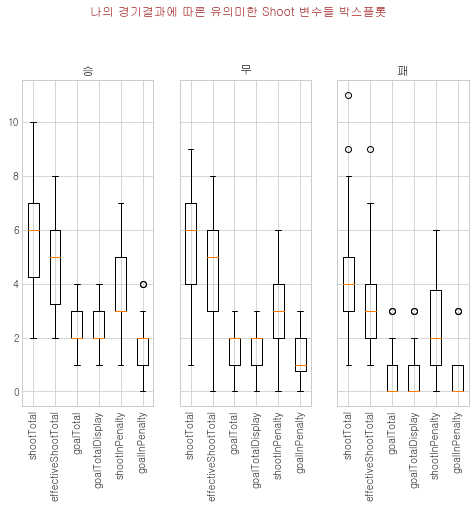

In [299]:
suptitle = '나의 경기결과에 따른 유의미한 Shoot 변수들 박스플롯'
data_list = [win, draw, lose]
title_list = ['승', '무', '패']

fig, ax = plt.subplots(ncols=3, figsize=(8,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].boxplot(data[shoot_mean_list].values)
    ax[idx].set_xticks([i for i in range(1, len(shoot_mean_list)+1)])
    ax[idx].set_xticklabels(shoot_mean_list, rotation=90)
    ax[idx].set_title(title_list[idx])

fig.suptitle(suptitle, fontdict=font_title, y=1.05)
plt.savefig(f'images/{suptitle}.png', bbox_inches = 'tight')
plt.show()

### 비모수적 검정

- 정규성을 만족하지 않을 때, 비모수적 검정법의 Kruskal-Wallis Rank Sum Test를 활용하여 분산분석을 실행한다.
- H0 : 집단 간의 차이가 존재하지 않는다.
- H1 : 집단 간의 차이가 존재한다.

In [159]:
def nonparam_test(data_list, cols):
    meaning_cols = []
    notmeaning_cols = []

    for col in cols:
        val, p = stats.kruskal(data_list[0][col], data_list[1][col], data_list[2][col])
        if p <= 0.05:
            meaning_cols.append(col)
        else:
            notmeaning_cols.append(col)

    return meaning_cols, notmeaning_cols

In [166]:
nonparam_meaning_list, nonparam_notmeaning_list =  nonparam_test([win, draw, lose], notnorm_list)
print('유의미한 비모수적 검정 변수들 :', nonparam_meaning_list)
print('무의미한 비모수적 검정 변수들 :', nonparam_notmeaning_list)

유의미한 비모수적 검정 변수들 : ['shootOutScore', 'goalHeading']
무의미한 비모수적 검정 변수들 : ['shootFreekick', 'shootPenaltyKick', 'goalPenaltyKick']


#### 사후분석

- 비모수 분산분석이 유의한 결과를 나타냈을 때, 사후분석을 진행한다.
- 귀무가설 : 각 집단 간 유의미한 차이가 존재한지 않는다.
- 대립가설 : 각 집단 간 유의미한 차이가 존재한다.

In [167]:
def nonparam_posthoc(data, col_y, col_x):
    for col in col_y:
        posthoc = sp.posthoc_conover(data, col, col_x, p_adjust="holm")
        print(col)
        print(posthoc)

In [168]:
nonparam_posthoc(my_HOJJIMIN, nonparam_meaning_list, 'matchResult')

shootOutScore
          무         승         패
무  1.000000  0.085014  1.000000
승  0.085014  1.000000  0.042921
패  1.000000  0.042921  1.000000
goalHeading
          무         승         패
무  1.000000  0.404049  0.274020
승  0.404049  1.000000  0.015244
패  0.274020  0.015244  1.000000


#### 사후분석 결과
- shootOutScore : 승&패
- goalHeading : 승&패

**정규성을 만족하지 않는 변수들은 승리와 패배 집단에서 차이를 보인다.**

#### 유의미한 변수들의 박스플롯

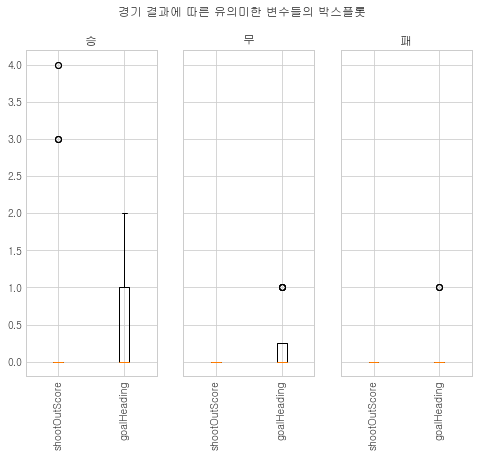

In [185]:
suptitle = '경기 결과에 따른 유의미한 변수들의 박스플롯'
data_list = [win, draw, lose]
title_list = ['승', '무', '패']

fig, ax = plt.subplots(ncols=3, figsize=(8,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].boxplot(data[nonparam_meaning_list].values)
    ax[idx].set_xticks([i for i in range(1, len(nonparam_meaning_list)+1)])
    ax[idx].set_xticklabels(nonparam_meaning_list, rotation=90)
    ax[idx].set_title(title_list[idx])

fig.suptitle(suptitle)
plt.show()

## ANOVA-Test (상대방 데이터)

### 정규성 검정

In [259]:
shoot_norm_test_list = devide_test(not_HOJJIMIN, shoot_columns)
shoot_norm_list, shoot_notnorm_list = shoot_norm_test_list.test()
print('정규성 만족 변수들 : ', shoot_norm_list)
print('정규성 불만족 변수들 : ', shoot_notnorm_list)

정규성 만족 변수들 :  ['shootTotal', 'goalPenaltyKick']
정규성 불만족 변수들 :  ['effectiveShootTotal', 'shootOutScore', 'goalTotal', 'goalTotalDisplay', 'shootHeading', 'goalHeading', 'shootFreekick', 'shootInPenalty', 'goalInPenalty', 'shootOutPenalty', 'goalOutPenalty', 'shootPenaltyKick']


### 등분산 검정

In [262]:
win = not_HOJJIMIN.loc[not_HOJJIMIN['matchResult']=='승']
draw = not_HOJJIMIN.loc[not_HOJJIMIN['matchResult']=='무']
lose = not_HOJJIMIN.loc[not_HOJJIMIN['matchResult']=='패']

shoot_samevar_list, shoot_notsamevar_list = levene_test([win, draw, lose], shoot_norm_list, shoot_notnorm_list)
print('등분산 변수들 : ', shoot_samevar_list)
print('이분산 변수들 : ', shoot_notsamevar_list)

등분산 변수들 :  ['shootTotal']
이분산 변수들 :  ['goalPenaltyKick']


### 분산 분석 검정

In [263]:
shoot_mean_list, shoot_notmean_list = analysis_var(not_HOJJIMIN, 'matchResult', [win,draw,lose], shoot_norm_list, shoot_notnorm_list)
print('유의미한 분산 분석 변수들 : ', shoot_mean_list)
print('무의미한 분산 분석 변수들 : ', shoot_notmean_list)

유의미한 분산 분석 변수들 :  []
무의미한 분산 분석 변수들 :  ['shootTotal', 'goalPenaltyKick']


### 비모수 검정

In [264]:
nonparam_meaning_list, nonparam_notmeaning_list =  nonparam_test([win, draw, lose], notnorm_list)
print('유의미한 비모수적 검정 변수들 :', nonparam_meaning_list)
print('무의미한 비모수적 검정 변수들 :', nonparam_notmeaning_list)

유의미한 비모수적 검정 변수들 : ['goalTotal', 'goalTotalDisplay', 'goalHeading', 'goalInPenalty', 'goalOutPenalty']
무의미한 비모수적 검정 변수들 : ['effectiveShootTotal', 'shootOutScore', 'shootHeading', 'shootFreekick', 'shootInPenalty', 'shootOutPenalty', 'shootPenaltyKick']


#### 사후분석

In [265]:
nonparam_posthoc(not_HOJJIMIN, nonparam_meaning_list, 'matchResult')

goalTotal
          무             승             패
무  1.000000  2.049304e-02  4.416856e-03
승  0.020493  1.000000e+00  3.700634e-09
패  0.004417  3.700634e-09  1.000000e+00
goalTotalDisplay
          무             승             패
무  1.000000  6.815349e-03  2.534922e-03
승  0.006815  1.000000e+00  1.216810e-10
패  0.002535  1.216810e-10  1.000000e+00
goalHeading
          무         승         패
무  1.000000  0.088529  0.736328
승  0.088529  1.000000  0.088529
패  0.736328  0.088529  1.000000
goalInPenalty
          무             승             패
무  1.000000  3.853614e-02  2.539262e-02
승  0.038536  1.000000e+00  4.419094e-07
패  0.025393  4.419094e-07  1.000000e+00
goalOutPenalty
          무         승         패
무  1.000000  0.592543  0.251680
승  0.592543  1.000000  0.038415
패  0.251680  0.038415  1.000000


#### 사후분석 결과
- goalTotal : 승&무, 승&패, 무&패
- goalTotalDisplay : 승&무, 승&패, 무&패
- goalHeading : 없다.
- goalInPenalty : 승&무, 승&패, 무&패
- goalOutPenalty : 승&패

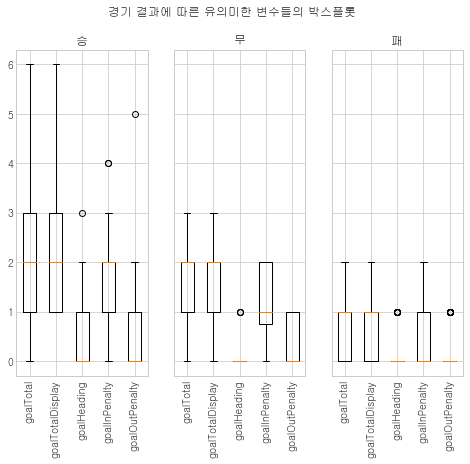

In [266]:
suptitle = '경기 결과에 따른 유의미한 변수들의 박스플롯'
data_list = [win, draw, lose]
title_list = ['승', '무', '패']

fig, ax = plt.subplots(ncols=3, figsize=(8,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].boxplot(data[nonparam_meaning_list].values)
    ax[idx].set_xticks([i for i in range(1, len(nonparam_meaning_list)+1)])
    ax[idx].set_xticklabels(nonparam_meaning_list, rotation=90)
    ax[idx].set_title(title_list[idx])

fig.suptitle(suptitle)
plt.show()

# Pass

## 데이터 전처리

In [187]:
print('PassDTO 시작 column : ', columns_list.index('passTry'))
print('PassDTO 끝 column : ', columns_list.index('lobbedThroughPassSuccess'))

PassDTO 시작 column :  35
PassDTO 끝 column :  48


In [186]:
pass_columns = columns_list[35:49]
pass_columns

['passTry',
 'passSuccess',
 'shortPassTry',
 'shortPassSuccess',
 'longPassTry',
 'longPassSuccess',
 'bouncingLobPassTry',
 'bouncingLobPassSuccess',
 'drivenGroundPassTry',
 'drivenGroundPassSuccess',
 'throughPassTry',
 'throughPassSuccess',
 'lobbedThroughPassTry',
 'lobbedThroughPassSuccess']

In [188]:
my_HOJJIMIN[pass_columns].describe()

,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,105.300000,95.140000,81.840000,76.970000,6.170000,4.130000,0.01,0.0,2.100000,1.930000,13.130000,11.120000,1.480000,0.990000
std,19.965374,18.683445,17.232645,16.473091,2.624881,2.038295,0.10,0.0,2.032563,1.886984,4.336025,3.993125,1.629773,1.114596
min,13.000000,13.000000,12.000000,12.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,95.750000,86.000000,72.000000,67.000000,4.000000,3.000000,0.00,0.0,1.000000,1.000000,11.000000,8.000000,0.000000,0.000000
50%,108.500000,98.000000,84.000000,78.500000,6.000000,4.000000,0.00,0.0,1.500000,1.000000,13.000000,11.000000,1.000000,1.000000
75%,118.000000,107.000000,93.000000,87.000000,8.000000,6.000000,0.00,0.0,3.000000,3.000000,16.000000,14.000000,2.000000,2.000000
max,150.000000,139.000000,116.000000,111.000000,14.000000,8.000000,1.00,0.0,9.000000,9.000000,24.000000,21.000000,7.000000,5.000000


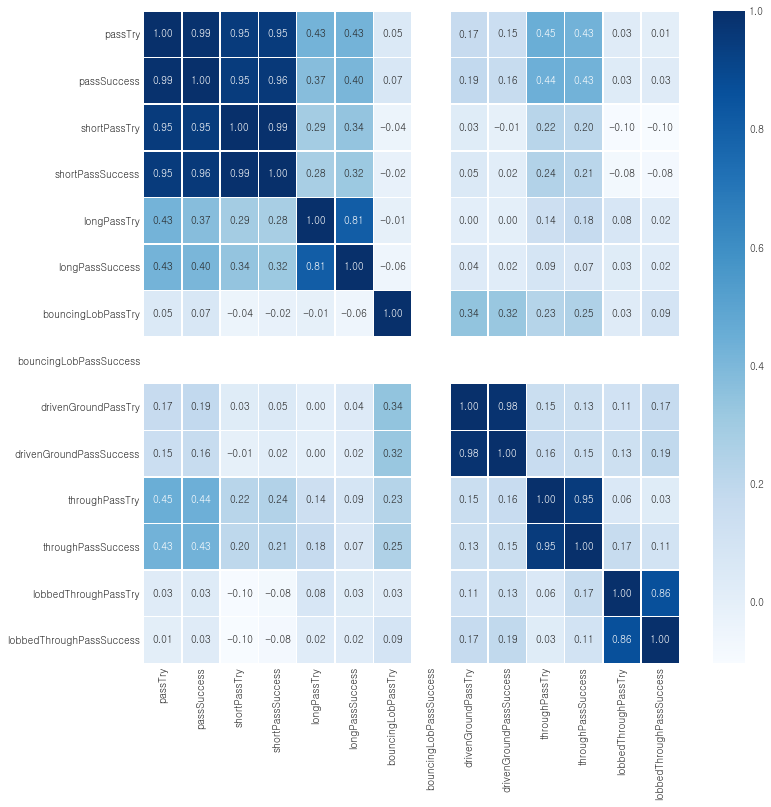

In [189]:
# 상관관계 확인
title = '패스 변수 간 상관관계 그래프'
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(my_HOJJIMIN[pass_columns].corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.savefig(f'images/{title}.png')
plt.show()

## 패스 성공률

In [342]:
# 패스 성공률 변수 생성
print('변수 생성 이전 데이터 형태 : ', HOJJIMIN.shape)
print('변수 생성 이전 데이터 형태 : ', my_HOJJIMIN.shape)
print('변수 생성 이전 데이터 형태 : ', not_HOJJIMIN.shape)
print('-'*50)

for idx, col in enumerate(pass_columns):
    if idx % 2 == 1:
        continue
    HOJJIMIN[f'{col[:-3]}_success_rate'] = round(HOJJIMIN[pass_columns[idx+1]] / HOJJIMIN[pass_columns[idx]], 2)
    my_HOJJIMIN[f'{col[:-3]}_success_rate'] = round(my_HOJJIMIN[pass_columns[idx+1]] / my_HOJJIMIN[pass_columns[idx]], 2)
    not_HOJJIMIN[f'{col[:-3]}_success_rate'] = round(not_HOJJIMIN[pass_columns[idx+1]] / not_HOJJIMIN[pass_columns[idx]], 2)
    
print('변수 생성 이후 데이터 형태 : ', HOJJIMIN.shape)
print('변수 생성 이후 데이터 형태 : ', my_HOJJIMIN.shape)
print('변수 생성 이후 데이터 형태 : ', not_HOJJIMIN.shape)

변수 생성 이전 데이터 형태 :  (200, 64)
변수 생성 이전 데이터 형태 :  (100, 73)
변수 생성 이전 데이터 형태 :  (100, 63)
--------------------------------------------------
변수 생성 이후 데이터 형태 :  (200, 71)
변수 생성 이후 데이터 형태 :  (100, 80)
변수 생성 이후 데이터 형태 :  (100, 70)


In [392]:
pass_success_rate_list = list(HOJJIMIN.columns[HOJJIMIN.columns.str.contains('success_rate')])
pass_success_rate_list

['passTry_success_rate',
 'shortPassTry_success_rate',
 'longPassTry_success_rate',
 'bouncingLobPassTry_success_rate',
 'drivenGroundPassTry_success_rate',
 'throughPassTry_success_rate',
 'lobbedThroughPassTry_success_rate',
 'block_success_rate',
 'tackle_success_rate']

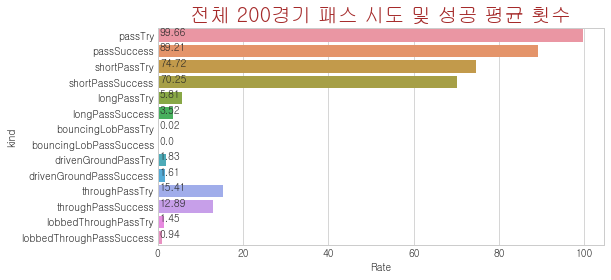

In [389]:
data = pd.DataFrame({'pass_kind' : pass_columns,
                   'value' : HOJJIMIN[pass_columns].mean()}).reset_index(drop=True)

title = '전체 200경기 패스 시도 및 성공 평균 횟수'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='value', y='pass_kind', data=data)
ax.set_xlabel('Rate')
ax.set_ylabel('kind')
ax.set_title(title, fontdict=font_title)

for idx, value in enumerate(data['value']):
    ax.text(0.5, idx, round(value, 2))
    
plt.savefig(f'images/{title}.png', bbox_inches='tight')
plt.show()

- 경기당 평균 패스 시도 횟수 : 99.66회
- 경기당 평균 패스 성공 횟수 : 89.21회
- 경기당 평균 짧은패스 시도 횟수 : 74.72회
- 경기당 평균 짧은패스 성공 횟수 : 70.25회
- 경기당 평균 롱패스 시도 횟수 : 5.81회
- 경기당 평균 롱패스 성공 횟수 : 3.52회
- 경기당 평균 바운싱 로빙패스 시도 횟수 : 0회
- 경기당 평균 바운싱 로빙패스 성공 횟수 : 0회
- 경기당 평균 드라이브 땅볼패스 시도 횟수 : 1.83회
- 경기당 평균 드라이브 땅볼패스 성공 횟수 : 1.61회
- 경기당 평균 스루패스 시도 횟수 : 15.41회
- 경기당 평균 스루패스 성공 횟수 : 12.89회
- 경기당 평균 로빙 스루패스 시도 횟수 : 1.45회
- 경기당 평균 로빙 스루패스 성공 횟수 : 0.94회
   
경기 내의 주요 패스 횟수는 짧은 패스 > 스루 패스 > 롱 패스 > 드라이브 땅볼패스 > 로빙 스루 패스 > 바운싱 로빙패스 순서로 많다.    

패스와 슛 간의 상관분석 필요

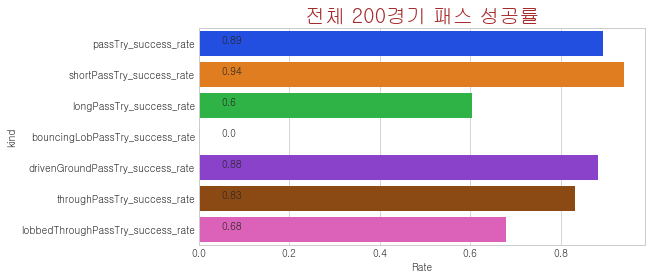

In [394]:
data = pd.DataFrame({'pass_kind' : pass_success_rate_list[:-2],
                   'value' : HOJJIMIN[pass_success_rate_list[:-2]].mean()}).reset_index(drop=True)

title = '전체 200경기 패스 성공률'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='value', y='pass_kind', data=data)
ax.set_xlabel('Rate')
ax.set_ylabel('kind')
ax.set_title(title, fontdict=font_title)

for idx, value in enumerate(data['value']):
    ax.text(0.05, idx, round(value, 2))
    
plt.savefig(f'images/{title}.png', bbox_inches='tight')
plt.show()

전체 경기 패스 성공률 확인

- 전체 패스 성공률 (89%)
- 짧은 패스 성공률 (94%)
- 롱 패스 성공률 (60%)
- 바운싱 로빙 패스 성공률 (0%)
- 드라이브 땅볼패스 성공률 (88%)
- 스루 패스 성공률 (83%)
- 로빙 스루 패스 성공률 (68%)

- 패스 횟수 
    - 짧은 패스 > 스루 패스 > 롱 패스 > 드라이브 땅볼패스 > 로빙 스루 패스 > 바운싱 로빙 패스   
- 패스 성공률
    - 짧은 패스 > 드라이브 땅볼패스 > 스루 패스 > 로빙 스루 패스 > 롱 패스 > 바운싱 로빙 패스

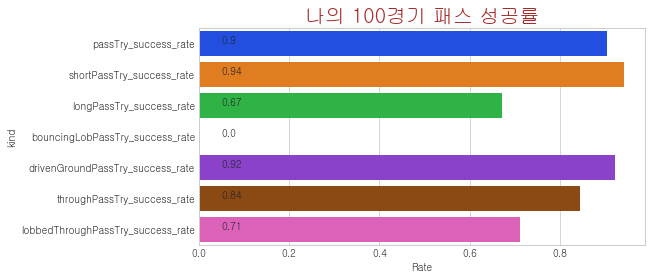

In [397]:
data = pd.DataFrame({'pass_kind' : pass_success_rate_list[:-2],
                   'value' : my_HOJJIMIN[pass_success_rate_list[:-2]].mean()}).reset_index(drop=True)

title = '나의 100경기 패스 성공률'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='value', y='pass_kind', data=data)
ax.set_xlabel('Rate')
ax.set_ylabel('kind')
ax.set_title(title, fontdict=font_title)

for idx, value in enumerate(data['value']):
    ax.text(0.05, idx, round(value, 2))
    
plt.savefig(f'images/{title}.png', bbox_inches='tight')
plt.show()

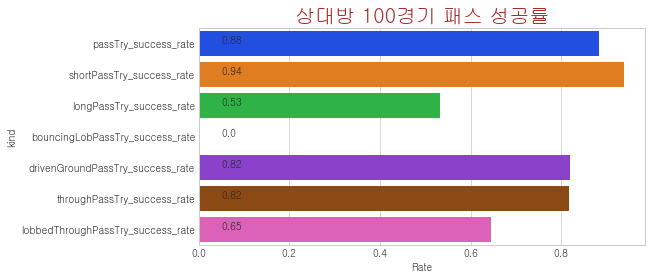

In [398]:
data = pd.DataFrame({'pass_kind' : pass_success_rate_list[:-2],
                   'value' : not_HOJJIMIN[pass_success_rate_list[:-2]].mean()}).reset_index(drop=True)

title = '상대방 100경기 패스 성공률'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='value', y='pass_kind', data=data)
ax.set_xlabel('Rate')
ax.set_ylabel('kind')
ax.set_title(title, fontdict=font_title)

for idx, value in enumerate(data['value']):
    ax.text(0.05, idx, round(value, 2))
    
plt.savefig(f'images/{title}.png', bbox_inches='tight')
plt.show()

## 박스플롯

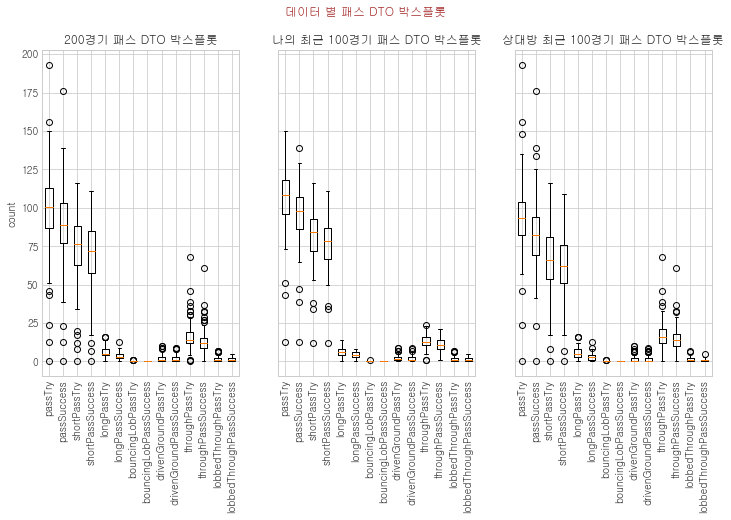

In [295]:
suptitle = '데이터 별 패스 DTO 박스플롯'
title_list = ['200경기 패스 DTO 박스플롯', '나의 최근 100경기 패스 DTO 박스플롯', '상대방 최근 100경기 패스 DTO 박스플롯']
data_list = [HOJJIMIN, my_HOJJIMIN, not_HOJJIMIN]

fig, ax = plt.subplots(ncols=3, figsize=(12,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].boxplot(data[pass_columns].values)
    ax[idx].set_xticks([i for i in range(1, len(pass_columns)+1)])
    ax[idx].set_xticklabels(pass_columns, rotation=90)
    ax[0].set_ylabel('count')
    ax[idx].set_title(title_list[idx])
fig.suptitle(suptitle, fontdict = font_title)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
plt.show()

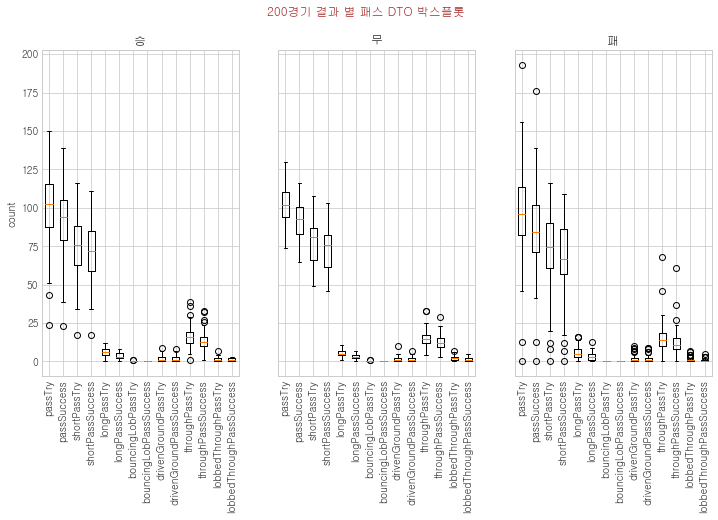

In [193]:
# 200개 데이터 - HOJJIMIN
# 경기 결과에 따른 박스플롯 확인
win = HOJJIMIN.loc[HOJJIMIN['matchResult']=='승']
draw = HOJJIMIN.loc[HOJJIMIN['matchResult']=='무']
lose = HOJJIMIN.loc[HOJJIMIN['matchResult']=='패']

title_list = ['승', '무', '패']
data_list = [win, draw, lose]
suptitle = '200경기 결과 별 패스 DTO 박스플롯'

fig, ax = plt.subplots(ncols=3, figsize=(12,6), sharey=True)
for idx,data in enumerate(data_list):
    ax[idx].boxplot(data[pass_columns].values)
    ax[idx].set_xticks([i for i in range(1, len(pass_columns)+1)])
    ax[idx].set_xticklabels(pass_columns, rotation=90)
    ax[0].set_ylabel('count')
    ax[idx].set_title(title_list[idx])
fig.suptitle(suptitle, fontdict=font_title)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
plt.show()

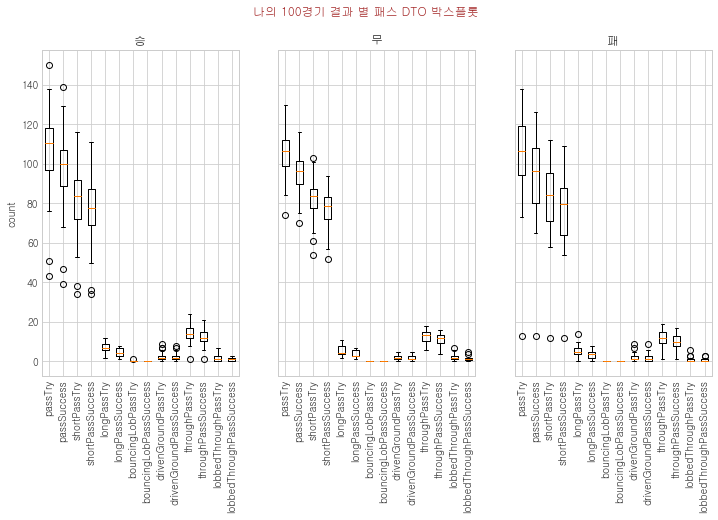

In [194]:
# 100개 데이터 - my_HOJJIMIN
# 경기 결과에 따른 박스플롯 확인
win = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='승']
draw = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='무']
lose = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='패']

title_list = ['승', '무', '패']
data_list = [win, draw, lose]
suptitle = '나의 100경기 결과 별 패스 DTO 박스플롯'

fig, ax = plt.subplots(ncols=3, figsize=(12,6), sharey=True)
for idx,data in enumerate(data_list):
    ax[idx].boxplot(data[pass_columns].values)
    ax[idx].set_xticks([i for i in range(1, len(pass_columns)+1)])
    ax[idx].set_xticklabels(pass_columns, rotation=90)
    ax[0].set_ylabel('count')
    ax[idx].set_title(title_list[idx])
fig.suptitle(suptitle, fontdict=font_title)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
plt.show()

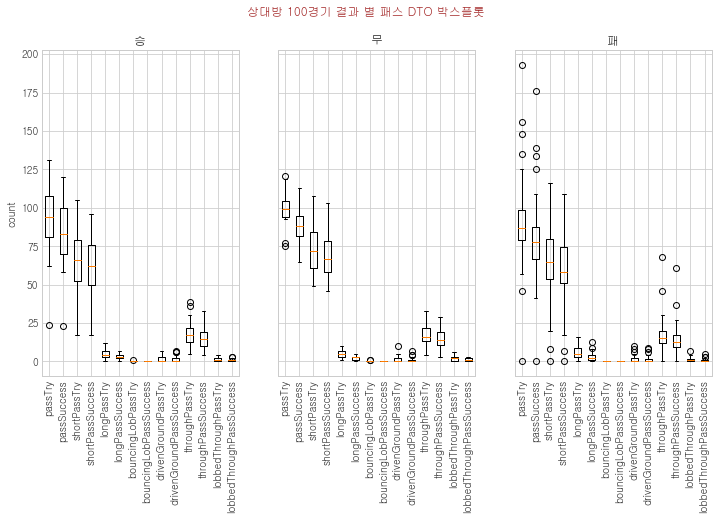

In [195]:
# 100개 데이터 - not_HOJJIMIN
# 경기 결과에 따른 박스플롯 확인
win = not_HOJJIMIN.loc[not_HOJJIMIN['matchResult']=='승']
draw = not_HOJJIMIN.loc[not_HOJJIMIN['matchResult']=='무']
lose = not_HOJJIMIN.loc[not_HOJJIMIN['matchResult']=='패']

title_list = ['승', '무', '패']
data_list = [win, draw, lose]
suptitle = '상대방 100경기 결과 별 패스 DTO 박스플롯'

fig, ax = plt.subplots(ncols=3, figsize=(12,6), sharey=True)
for idx,data in enumerate(data_list):
    ax[idx].boxplot(data[pass_columns].values)
    ax[idx].set_xticks([i for i in range(1, len(pass_columns)+1)])
    ax[idx].set_xticklabels(pass_columns, rotation=90)
    ax[0].set_ylabel('count')
    ax[idx].set_title(title_list[idx])
fig.suptitle(suptitle, fontdict=font_title)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
plt.show()

### 이상치 확인

- 내 데이터를 확인했을 때, 패스 관련 값들의 이상치는 모두 낮은 값들을 볼 수 있다.
- 왜 해당 경기의 패스 횟수가 작았을까? 데이터를 통해 보자.

In [196]:
def return_outlier(data,column):
    Q1 = np.quantile(data[column], 0.25)
    Q3 = np.quantile(data[column], 0.75)
    IQR = Q3-Q1
    under_outlier, upper_outlier = Q1-1.5*IQR, Q3+1.5*IQR
    
    under_data = data.loc[data[column]<=under_outlier]
    upper_data = data.loc[data[column]>=upper_outlier]
    data = pd.concat([under_data, upper_data], axis=0)
    
    return data

In [197]:
passT_outlier = return_outlier(my_HOJJIMIN, 'passTry')
passS_outlier = return_outlier(my_HOJJIMIN, 'passSuccess')
shortPassT_outlier = return_outlier(my_HOJJIMIN, 'shortPassTry')
shortPassS_outlier = return_outlier(my_HOJJIMIN, 'shortPassSuccess')

print(passT_outlier.shape)
print(passS_outlier.shape)
print(shortPassT_outlier.shape)
print(shortPassS_outlier.shape)

(3, 73)
(4, 73)
(3, 73)
(3, 73)


In [198]:
passT_outlier

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,Date,Time,Year,Month,Day,weekday,Hour,Minute,Second,Rate,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
0,5f705c7a92faafc0dc5c44c5,2020-09-27T18:39:02,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,승,1,1,0,0,0,0,34,1,52,0,4.23889,gamepad,6,6,0,4,3,0,1,1,0,0,3,3,2,1,0,0,43,39,38,36,4,2,0,0,0,0,1,1,0,0,3,0,3,2,2020-09-27,18:39:02,2020,9,27,6,18,39,02,100.000000,1.0,NaN,1.00,0.5,NaN,0.25,0.0,0.75,0.25,0.0
46,5f81a486e0c9375ac2e01a71,2020-10-10T21:12:11,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,패,2,0,0,0,0,0,12,0,37,1,3.70556,gamepad,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13,13,12,12,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2020-10-10,21:12:11,2020,10,10,5,21,12,11,34.042553,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,5f82f507e17959545af88d88,2020-10-11T21:11:57,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,승,1,1,0,0,0,0,43,2,55,0,4.26111,gamepad,5,3,0,2,3,0,1,1,0,0,3,1,1,0,1,1,51,47,34,34,2,1,0,0,1,1,13,11,0,0,4,0,3,3,2020-10-11,21:11:57,2020,10,11,6,21,11,57,37.254902,1.0,NaN,0.33,0.0,1.0,0.50,0.0,0.50,0.00,0.5


In [199]:
passS_outlier

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,Date,Time,Year,Month,Day,weekday,Hour,Minute,Second,Rate,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
0,5f705c7a92faafc0dc5c44c5,2020-09-27T18:39:02,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,승,1,1,0,0,0,0,34,1,52,0,4.23889,gamepad,6,6,0,4,3,0,1,1,0,0,3,3,2,1,0,0,43,39,38,36,4,2,0,0,0,0,1,1,0,0,3,0,3,2,2020-09-27,18:39:02,2020,9,27,6,18,39,02,100.000000,1.0,NaN,1.00,0.5,NaN,0.25,0.0,0.75,0.25,0.0
46,5f81a486e0c9375ac2e01a71,2020-10-10T21:12:11,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,패,2,0,0,0,0,0,12,0,37,1,3.70556,gamepad,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13,13,12,12,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2020-10-10,21:12:11,2020,10,10,5,21,12,11,34.042553,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,5f82f507e17959545af88d88,2020-10-11T21:11:57,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,승,1,1,0,0,0,0,43,2,55,0,4.26111,gamepad,5,3,0,2,3,0,1,1,0,0,3,1,1,0,1,1,51,47,34,34,2,1,0,0,1,1,13,11,0,0,4,0,3,3,2020-10-11,21:11:57,2020,10,11,6,21,11,57,37.254902,1.0,NaN,0.33,0.0,1.0,0.50,0.0,0.50,0.00,0.5
98,60116e114959034e2de34de5,2021-01-27T22:58:24,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202014,승,0,0,0,1,0,0,139,3,52,0,4.12222,keyboard,6,4,4,1,1,0,1,0,0,0,5,1,1,0,0,0,150,139,116,111,9,7,0,0,0,0,23,21,0,0,14,2,4,3,2021-01-27,22:58:24,2021,1,27,2,22,58,24,50.000000,0.0,NaN,0.20,0.0,NaN,0.00,0.0,1.00,0.00,0.0


- 패스 시도 이상치 확인한 경우, 몰수승, 몰수패 경기들이었다. 그래서 패스 시도 수가 작았던 듯.
- 패스 성공 이상치 확인한 경우, 몰수승, 몰수패 경기를 제외하고서는 이겼을 경우임. 150번의 패스 시도 중 139번의 패스 성공했음

In [200]:
shortPassT_outlier

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,Date,Time,Year,Month,Day,weekday,Hour,Minute,Second,Rate,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
0,5f705c7a92faafc0dc5c44c5,2020-09-27T18:39:02,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,승,1,1,0,0,0,0,34,1,52,0,4.23889,gamepad,6,6,0,4,3,0,1,1,0,0,3,3,2,1,0,0,43,39,38,36,4,2,0,0,0,0,1,1,0,0,3,0,3,2,2020-09-27,18:39:02,2020,9,27,6,18,39,02,100.000000,1.0,NaN,1.00,0.5,NaN,0.25,0.0,0.75,0.25,0.0
46,5f81a486e0c9375ac2e01a71,2020-10-10T21:12:11,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,패,2,0,0,0,0,0,12,0,37,1,3.70556,gamepad,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13,13,12,12,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2020-10-10,21:12:11,2020,10,10,5,21,12,11,34.042553,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,5f82f507e17959545af88d88,2020-10-11T21:11:57,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,승,1,1,0,0,0,0,43,2,55,0,4.26111,gamepad,5,3,0,2,3,0,1,1,0,0,3,1,1,0,1,1,51,47,34,34,2,1,0,0,1,1,13,11,0,0,4,0,3,3,2020-10-11,21:11:57,2020,10,11,6,21,11,57,37.254902,1.0,NaN,0.33,0.0,1.0,0.50,0.0,0.50,0.00,0.5


In [201]:
shortPassS_outlier

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,Date,Time,Year,Month,Day,weekday,Hour,Minute,Second,Rate,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
0,5f705c7a92faafc0dc5c44c5,2020-09-27T18:39:02,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,승,1,1,0,0,0,0,34,1,52,0,4.23889,gamepad,6,6,0,4,3,0,1,1,0,0,3,3,2,1,0,0,43,39,38,36,4,2,0,0,0,0,1,1,0,0,3,0,3,2,2020-09-27,18:39:02,2020,9,27,6,18,39,02,100.000000,1.0,NaN,1.00,0.5,NaN,0.25,0.0,0.75,0.25,0.0
46,5f81a486e0c9375ac2e01a71,2020-10-10T21:12:11,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,패,2,0,0,0,0,0,12,0,37,1,3.70556,gamepad,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13,13,12,12,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2020-10-10,21:12:11,2020,10,10,5,21,12,11,34.042553,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,5f82f507e17959545af88d88,2020-10-11T21:11:57,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,승,1,1,0,0,0,0,43,2,55,0,4.26111,gamepad,5,3,0,2,3,0,1,1,0,0,3,1,1,0,1,1,51,47,34,34,2,1,0,0,1,1,13,11,0,0,4,0,3,3,2020-10-11,21:11:57,2020,10,11,6,21,11,57,37.254902,1.0,NaN,0.33,0.0,1.0,0.50,0.0,0.50,0.00,0.5


- 짧은 패스 시도 및 성공 이상치 확인한 경우, 몰수승, 몰수패 경기들이었다. 그래서 짧은 패스 시도 수가 작았던 듯.

- bouncingLongPassTry : 0 or 1의 값을 가지고, 대부분 0의 값을 가지기 때문에 1이 이상치로 나타남.
- drivenGroundPassTry : 6이 최대 값인데, 이상치 가지는 경기에 대해서 살펴볼 필요가 있다.
- drivenGroundPassSuccess : 6이 최대 값인데, 이상치 가지는 경기에 대해서 살펴볼 필요가 있다.
- throughPassTry : 1 or 24가 이상치, 평균 12번의 스루패스 함
- lobbenThroughPassTry : 6, 7이 이상치, 해당 경기에 대해 살펴보자.

In [202]:
drivenPassT_outlier = return_outlier(my_HOJJIMIN, 'drivenGroundPassTry')
drivenPassS_outlier = return_outlier(my_HOJJIMIN, 'drivenGroundPassSuccess')
throughPassT_outlier = return_outlier(my_HOJJIMIN, 'throughPassTry')
l_throughPassT_outlier = return_outlier(my_HOJJIMIN, 'lobbedThroughPassTry')

print(drivenPassT_outlier.shape)
print(drivenPassS_outlier.shape)
print(throughPassT_outlier.shape)
print(l_throughPassT_outlier.shape)

(8, 73)
(6, 73)
(3, 73)
(5, 73)


In [203]:
drivenPassT_outlier

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,Date,Time,Year,Month,Day,weekday,Hour,Minute,Second,Rate,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
41,5f808a995e0d94b7657ce70a,2020-10-10T01:21:42,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,승,0,1,1,0,0,0,117,1,50,1,4.02222,gamepad,6,4,3,1,1,0,0,0,0,0,3,1,3,0,0,0,134,125,108,104,6,5,0,0,6,5,14,11,0,0,15,2,10,8,2020-10-10,01:21:42,2020,10,10,5,01,21,42,33.333333,NaN,NaN,0.33,0.00,NaN,0.0,0.0,1.00,0.00,0.0
54,5f8300855b6abb5a42f54f9a,2020-10-11T22:05:06,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,승,0,0,0,0,0,0,86,1,51,0,4.36667,gamepad,9,8,0,4,4,0,0,0,0,0,6,3,3,1,0,0,91,81,64,59,4,2,0,0,7,7,16,13,0,0,8,1,13,9,2020-10-11,22:05:06,2020,10,11,6,22,05,06,38.181818,NaN,NaN,0.50,0.33,NaN,0.0,0.0,0.75,0.25,0.0
57,5f8309450957182e8e377ba9,2020-10-11T22:45:50,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,승,0,0,0,1,0,0,112,4,49,0,4.23333,gamepad,10,8,0,3,3,0,1,0,0,0,6,3,4,0,0,0,133,120,100,95,11,7,0,0,6,5,12,12,2,1,5,1,13,7,2020-10-11,22:45:50,2020,10,11,6,22,45,50,39.655172,0.0,NaN,0.50,0.00,NaN,0.0,0.0,1.00,0.00,0.0
63,5f8babd21d27ba02d786b9e4,2020-10-18T11:53:45,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202011,승,0,0,2,0,0,0,77,1,48,0,4.13333,gamepad,5,4,0,2,2,0,1,0,0,0,5,2,0,0,0,0,97,89,72,67,6,6,0,0,7,6,8,7,3,3,14,1,5,4,2020-10-18,11:53:45,2020,10,18,6,11,53,45,60.000000,0.0,NaN,0.40,NaN,NaN,0.0,0.0,1.00,0.00,0.0
66,5f8c253c5b87e872c3a748ea,2020-10-18T20:35:09,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202011,승,0,0,1,0,0,0,107,2,55,1,4.09444,gamepad,7,5,0,2,2,0,1,0,0,0,4,1,3,1,0,0,127,116,95,91,5,3,0,0,6,6,17,13,3,3,5,1,6,3,2020-10-18,20:35:09,2020,10,18,6,20,35,09,62.500000,0.0,NaN,0.25,0.33,NaN,0.0,0.0,0.50,0.50,0.0
90,5fe4e8d3a3d3e2bc6e7c9b36,2020-12-25T04:25:32,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202013,승,0,0,1,1,0,0,105,2,61,0,4.43889,gamepad,6,5,0,2,2,0,1,0,0,0,3,1,3,1,0,0,116,108,75,74,6,3,1,0,9,8,23,21,2,2,1,0,2,2,2020-12-25,04:25:32,2020,12,25,4,04,25,32,50.000000,0.0,NaN,0.33,0.33,NaN,0.0,0.0,0.50,0.50,0.0
91,5fe4eb43a61e416727957cf6,2020-12-25T04:35:51,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202013,패,0,0,0,1,0,0,90,0,53,0,3.30000,gamepad,2,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,114,105,84,80,4,4,0,0,7,6,19,15,0,0,7,1,1,0,2020-12-25,04:35:51,2020,12,25,4,04,35,51,33.333333,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
92,5fe53e4cc67a06205f961833,2020-12-25T10:31:24,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202013,패,0,0,1,1,0,0,88,2,56,0,3.91111,gamepad,7,5,0,1,1,0,1,0,0,0,6,1,1,0,0,0,109,101,74,71,8,6,0,0,9,9,16,14,1,1,11,2,6,5,2020-12-25,10:31:24,2020,12,25,4,10,31,24,25.000000,0.0,NaN,0.17,0.00,NaN,0.0,0.0,1.00,0.00,0.0


- drivenPassTry 이상치를 가진 경우, 8번의 경기에서 6번이나 승리했지만, 이 변수만으로 승리했다고 할 수는 없다. 승리에 영향을 미치는 다른 변수들이 매우 많이 존재히기 때문이다.
    - drivenPassSuccess 이상치 경우, drivenPassTry 변수의 영향을 받기 때문에, 비슷한 형태를 띈다.

In [204]:
drivenPassS_outlier

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,Date,Time,Year,Month,Day,weekday,Hour,Minute,Second,Rate,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
54,5f8300855b6abb5a42f54f9a,2020-10-11T22:05:06,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,승,0,0,0,0,0,0,86,1,51,0,4.36667,gamepad,9,8,0,4,4,0,0,0,0,0,6,3,3,1,0,0,91,81,64,59,4,2,0,0,7,7,16,13,0,0,8,1,13,9,2020-10-11,22:05:06,2020,10,11,6,22,05,06,38.181818,NaN,NaN,0.50,0.33,NaN,0.0,0.0,0.75,0.25,0.0
63,5f8babd21d27ba02d786b9e4,2020-10-18T11:53:45,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202011,승,0,0,2,0,0,0,77,1,48,0,4.13333,gamepad,5,4,0,2,2,0,1,0,0,0,5,2,0,0,0,0,97,89,72,67,6,6,0,0,7,6,8,7,3,3,14,1,5,4,2020-10-18,11:53:45,2020,10,18,6,11,53,45,60.000000,0.0,NaN,0.40,NaN,NaN,0.0,0.0,1.00,0.00,0.0
66,5f8c253c5b87e872c3a748ea,2020-10-18T20:35:09,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202011,승,0,0,1,0,0,0,107,2,55,1,4.09444,gamepad,7,5,0,2,2,0,1,0,0,0,4,1,3,1,0,0,127,116,95,91,5,3,0,0,6,6,17,13,3,3,5,1,6,3,2020-10-18,20:35:09,2020,10,18,6,20,35,09,62.500000,0.0,NaN,0.25,0.33,NaN,0.0,0.0,0.50,0.50,0.0
90,5fe4e8d3a3d3e2bc6e7c9b36,2020-12-25T04:25:32,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202013,승,0,0,1,1,0,0,105,2,61,0,4.43889,gamepad,6,5,0,2,2,0,1,0,0,0,3,1,3,1,0,0,116,108,75,74,6,3,1,0,9,8,23,21,2,2,1,0,2,2,2020-12-25,04:25:32,2020,12,25,4,04,25,32,50.000000,0.0,NaN,0.33,0.33,NaN,0.0,0.0,0.50,0.50,0.0
91,5fe4eb43a61e416727957cf6,2020-12-25T04:35:51,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202013,패,0,0,0,1,0,0,90,0,53,0,3.30000,gamepad,2,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,114,105,84,80,4,4,0,0,7,6,19,15,0,0,7,1,1,0,2020-12-25,04:35:51,2020,12,25,4,04,35,51,33.333333,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
92,5fe53e4cc67a06205f961833,2020-12-25T10:31:24,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202013,패,0,0,1,1,0,0,88,2,56,0,3.91111,gamepad,7,5,0,1,1,0,1,0,0,0,6,1,1,0,0,0,109,101,74,71,8,6,0,0,9,9,16,14,1,1,11,2,6,5,2020-12-25,10:31:24,2020,12,25,4,10,31,24,25.000000,0.0,NaN,0.17,0.00,NaN,0.0,0.0,1.00,0.00,0.0


In [205]:
throughPassT_outlier

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,Date,Time,Year,Month,Day,weekday,Hour,Minute,Second,Rate,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
0,5f705c7a92faafc0dc5c44c5,2020-09-27T18:39:02,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,승,1,1,0,0,0,0,34,1,52,0,4.23889,gamepad,6,6,0,4,3,0,1,1,0,0,3,3,2,1,0,0,43,39,38,36,4,2,0,0,0,0,1,1,0,0,3,0,3,2,2020-09-27,18:39:02,2020,9,27,6,18,39,02,100.000000,1.0,NaN,1.0,0.5,NaN,0.25,0.0,0.75,0.25,0.0
46,5f81a486e0c9375ac2e01a71,2020-10-10T21:12:11,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202010,패,2,0,0,0,0,0,12,0,37,1,3.70556,gamepad,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13,13,12,12,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2020-10-10,21:12:11,2020,10,10,5,21,12,11,34.042553,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,5fe54cc35187586533085a43,2020-12-25T11:37:10,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202013,승,0,0,0,1,0,0,93,3,47,0,4.11667,gamepad,5,4,3,1,1,0,1,0,0,0,3,0,2,1,0,0,122,107,84,78,9,7,0,0,3,3,24,19,2,0,16,1,7,4,2020-12-25,11:37:10,2020,12,25,4,11,37,10,42.857143,0.0,NaN,0.0,0.5,NaN,0.00,0.0,0.00,1.00,0.0


- ththroughPassTry의 경우, 몰수승, 몰수패인 경우 낮은 이상치 값을 가짐.

In [206]:
l_throughPassT_outlier

,matchId,matchDate,matchType,accessId,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,Date,Time,Year,Month,Day,weekday,Hour,Minute,Second,Rate,goalHeading_rate,goalFreekick_rate,goalInPenalty_rate,goalOutPenalty_rate,goalPenaltyKick_rate,total_goalHeading_rate,total_goalFreekick_rate,total_goalInPenalty_rate,total_goalOutPenalty_rate,total_goalPenaltyKick_rate
76,5f8c3f0808af5e59b2ba9ce8,2020-10-18T22:22:36,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202011,무,0,0,0,0,0,0,73,2,50,0,4.13333,gamepad,7,6,0,2,2,0,1,0,0,0,4,1,3,1,0,0,87,78,61,57,4,3,0,0,1,1,13,12,7,5,9,1,4,1,2020-10-18,22:22:36,2020,10,18,6,22,22,36,38.888889,0.0,NaN,0.25,0.33,NaN,0.0,0.0,0.5,0.5,0.0
84,5f957702f2145b1eaceb0402,2020-10-25T22:11:30,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202011,무,0,0,0,0,0,0,84,1,50,0,4.08889,gamepad,4,3,0,2,2,0,1,1,0,0,2,1,2,1,0,0,106,96,80,76,5,4,0,0,0,0,15,14,6,2,11,1,12,6,2020-10-25,22:11:30,2020,10,25,6,22,11,30,42.307692,1.0,NaN,0.50,0.50,NaN,0.5,0.0,0.5,0.5,0.0
85,5f95798c7a89aafeabbf7765,2020-10-25T22:22:36,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202011,승,0,0,2,1,0,0,97,1,56,1,4.26111,gamepad,3,3,0,1,1,0,0,0,0,0,2,1,1,0,0,0,121,111,88,88,10,4,0,0,2,2,14,14,7,3,7,2,2,2,2020-10-25,22:22:36,2020,10,25,6,22,22,36,44.444444,NaN,NaN,0.50,0.00,NaN,0.0,0.0,1.0,0.0,0.0
88,5f95822d52b20d51b0f13f68,2020-10-25T22:58:50,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202011,패,0,0,1,1,0,0,64,1,44,1,3.55556,gamepad,2,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,82,72,59,55,1,0,0,0,3,3,12,11,6,3,5,1,1,1,2020-10-25,22:58:50,2020,10,25,6,22,58,50,43.333333,NaN,NaN,0.00,NaN,0.0,NaN,NaN,NaN,NaN,NaN
97,60116b598416eb2e1c6a9111,2021-01-27T22:42:00,50,60e60f2a198b5c5ed9de9f00,HOJJIMIN,202014,무,0,0,1,0,0,0,97,0,55,0,4.12778,keyboard,4,3,0,1,1,0,0,0,0,0,3,1,1,0,0,0,112,102,84,79,9,6,0,0,0,0,14,13,5,4,11,1,7,4,2021-01-27,22:42:00,2021,1,27,2,22,42,00,0.000000,NaN,NaN,0.33,0.00,NaN,0.0,0.0,1.0,0.0,0.0


- lobbedthroughPassTry 이상치를 가진 경우에 무&패인 경기가 더 많은 것으로 보아, 로빙쓰루패스를 많이 한다고 경기에서 승리하는 것은 아니라고 생각함. 다른 요인들이 큰 영향을 미치는 듯.

In [207]:
len(pass_columns)

14

In [208]:
pass_array = np.array(pass_columns).reshape(2, -1)
pass_array

array([['passTry', 'passSuccess', 'shortPassTry', 'shortPassSuccess',
        'longPassTry', 'longPassSuccess', 'bouncingLobPassTry'],
       ['bouncingLobPassSuccess', 'drivenGroundPassTry',
        'drivenGroundPassSuccess', 'throughPassTry',
        'throughPassSuccess', 'lobbedThroughPassTry',
        'lobbedThroughPassSuccess']], dtype='<U24')

## 히스토그램

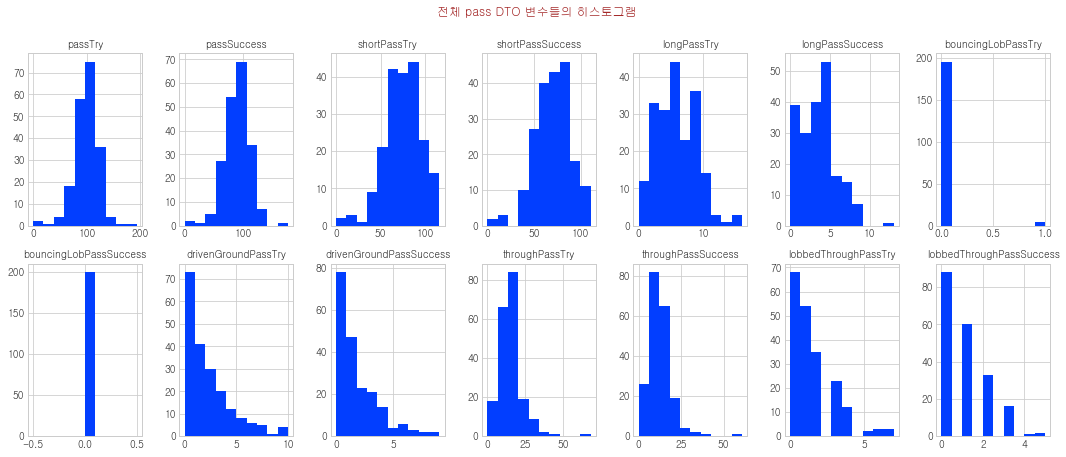

In [211]:
suptitle = '전체 pass DTO 변수들의 히스토그램'
fig, ax = plt.subplots(nrows=2,ncols=7, figsize = (15,6))
for i in range(0,2):
    for j in range(0,7):
        col = pass_array[i,j]
        ax[i,j].hist(HOJJIMIN[col].values)
        ax[i,j].set_title(col, fontsize=10)        
fig.suptitle(suptitle, fontdict = font_title, y=1.05)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
fig.tight_layout()

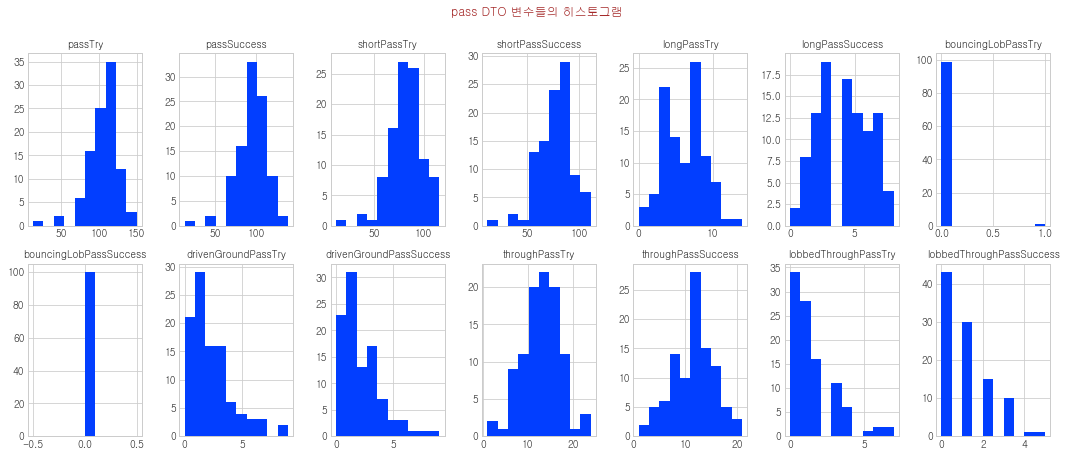

In [209]:
suptitle = '나의 pass DTO 변수들의 히스토그램'
fig, ax = plt.subplots(nrows=2,ncols=7, figsize = (15,6))
for i in range(0,2):
    for j in range(0,7):
        col = pass_array[i,j]
        ax[i,j].hist(my_HOJJIMIN[col].values)
        ax[i,j].set_title(col, fontsize=10)        
fig.suptitle(suptitle, fontdict = font_title, y=1.05)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
fig.tight_layout()

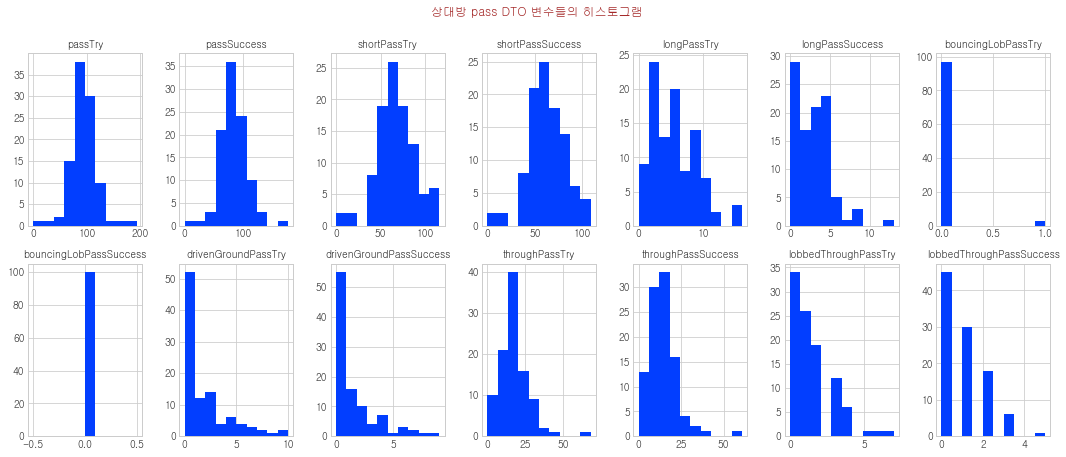

In [210]:
suptitle = '상대방 pass DTO 변수들의 히스토그램'
fig, ax = plt.subplots(nrows=2,ncols=7, figsize = (15,6))
for i in range(0,2):
    for j in range(0,7):
        col = pass_array[i,j]
        ax[i,j].hist(not_HOJJIMIN[col].values)
        ax[i,j].set_title(col, fontsize=10)        
fig.suptitle(suptitle, fontdict = font_title, y=1.05)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
fig.tight_layout()

- bouncingLobPassTry, bouncingLobPassSuccess, drivenGroundPassTry, drivenGroundPassSuccess, lobbedThroughPassTry, lobbedThroughPassSuccess 를 제외한 나머지 변수들은 정규분포를 띈다.


In [ ]:
# 패스 성공률
idx = 0
for i in range(0, len(pass_columns), 2):
    my_HOJJIMIN[f'{pass_columns[i][:-3]}_rate'] = my_HOJJIMIN[pass_columns[i+1]]/my_HOJJIMIN[pass_columns[i]]

my_HOJJIMIN

In [ ]:
data = my_HOJJIMIN[my_HOJJIMIN.columns[my_HOJJIMIN.columns.str.contains('rate')]]
data.isna().sum()

bouncingLobPass_rate의 결측값 수는 99로 삭제하자. 거의 0번 시도함.

## ANOVA-Test (전체 데이터)

### 정규성 검정

In [276]:
pass_norm_test_list = devide_test(HOJJIMIN, pass_columns)
pass_norm_list, pass_notnorm_list = pass_norm_test_list.test()
print('정규성 만족 변수들 : ', pass_norm_list)
print('정규성 불만족 변수들 : ', pass_notnorm_list)

정규성 만족 변수들 :  ['bouncingLobPassSuccess']
정규성 불만족 변수들 :  ['passTry', 'passSuccess', 'shortPassTry', 'shortPassSuccess', 'longPassTry', 'longPassSuccess', 'bouncingLobPassTry', 'drivenGroundPassTry', 'drivenGroundPassSuccess', 'throughPassTry', 'throughPassSuccess', 'lobbedThroughPassTry', 'lobbedThroughPassSuccess']


### 등분산 검정

In [285]:
win = HOJJIMIN.loc[HOJJIMIN['matchResult']=='승']
draw = HOJJIMIN.loc[HOJJIMIN['matchResult']=='무']
lose = HOJJIMIN.loc[HOJJIMIN['matchResult']=='패']

pass_samevar_list, pass_notsamevar_list = levene_test([win, draw, lose], pass_norm_list, pass_notnorm_list)
print('등분산 변수들 : ', pass_samevar_list)
print('이분산 변수들 : ', pass_notsamevar_list)

등분산 변수들 :  []
이분산 변수들 :  ['bouncingLobPassSuccess']


### 분산 분석 검정

In [278]:
pass_mean_list, pass_notmean_list = analysis_var(HOJJIMIN, 'matchResult', [win,draw,lose], pass_norm_list, pass_notnorm_list)
print('유의미한 분산 분석 변수들 : ', pass_mean_list)
print('무의미한 분산 분석 변수들 : ', pass_notmean_list)

유의미한 분산 분석 변수들 :  []
무의미한 분산 분석 변수들 :  ['bouncingLobPassSuccess']


### 비모수 검정

In [279]:
pass_nonparam_meaning_list, pass_nonparam_notmeaning_list =  nonparam_test([win, draw, lose], pass_notnorm_list)
print('유의미한 비모수적 검정 변수들 :', pass_nonparam_meaning_list)
print('무의미한 비모수적 검정 변수들 :', pass_nonparam_notmeaning_list)

유의미한 비모수적 검정 변수들 : ['throughPassSuccess', 'lobbedThroughPassTry', 'lobbedThroughPassSuccess']
무의미한 비모수적 검정 변수들 : ['passTry', 'passSuccess', 'shortPassTry', 'shortPassSuccess', 'longPassTry', 'longPassSuccess', 'bouncingLobPassTry', 'drivenGroundPassTry', 'drivenGroundPassSuccess', 'throughPassTry']


#### 사후분석

In [280]:
nonparam_posthoc(HOJJIMIN, pass_nonparam_meaning_list, 'matchResult')

throughPassSuccess
          무         승         패
무  1.000000  0.354656  0.347964
승  0.354656  1.000000  0.016489
패  0.347964  0.016489  1.000000
lobbedThroughPassTry
          무         승         패
무  1.000000  0.159550  0.000436
승  0.159550  1.000000  0.005796
패  0.000436  0.005796  1.000000
lobbedThroughPassSuccess
          무         승         패
무  1.000000  0.314826  0.000476
승  0.314826  1.000000  0.001222
패  0.000476  0.001222  1.000000


#### 사후분석 결과
- throughPassSuccess : 승&패
- lobbedThroughPassTry : 승&패, 무&패
- lobbedThroughPassSuccess : 승&패, 무&패

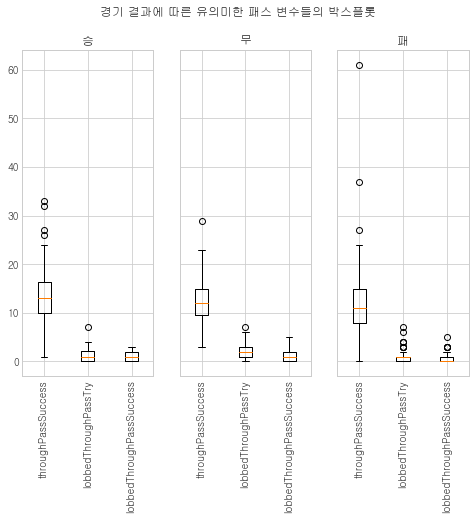

In [287]:
suptitle = '경기 결과에 따른 유의미한 패스 변수들의 박스플롯'
data_list = [win, draw, lose]
title_list = ['승', '무', '패']

fig, ax = plt.subplots(ncols=3, figsize=(8,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].boxplot(data[pass_nonparam_meaning_list].values)
    ax[idx].set_xticks([i for i in range(1, len(pass_nonparam_meaning_list)+1)])
    ax[idx].set_xticklabels(pass_nonparam_meaning_list, rotation=90)
    ax[idx].set_title(title_list[idx])

fig.suptitle(suptitle)
plt.show()

## ANOVA-Test (나의 데이터)

### 정규성 검정

In [302]:
pass_norm_test_list = devide_test(my_HOJJIMIN, pass_columns)
pass_norm_list, pass_notnorm_list = pass_norm_test_list.test()
print('정규성 만족 변수들 : ', pass_norm_list)
print('정규성 불만족 변수들 : ', pass_notnorm_list)

정규성 만족 변수들 :  ['longPassTry', 'bouncingLobPassSuccess', 'throughPassTry', 'throughPassSuccess']
정규성 불만족 변수들 :  ['passTry', 'passSuccess', 'shortPassTry', 'shortPassSuccess', 'longPassSuccess', 'bouncingLobPassTry', 'drivenGroundPassTry', 'drivenGroundPassSuccess', 'lobbedThroughPassTry', 'lobbedThroughPassSuccess']


### 등분산 검정

In [303]:
win = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='승']
draw = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='무']
lose = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='패']

pass_samevar_list, pass_notsamevar_list = levene_test([win, draw, lose], pass_norm_list, pass_notnorm_list)
print('등분산 변수들 : ', pass_samevar_list)
print('이분산 변수들 : ', pass_notsamevar_list)

등분산 변수들 :  ['longPassTry', 'throughPassTry', 'throughPassSuccess']
이분산 변수들 :  ['bouncingLobPassSuccess']


### 분산 분석 검정

In [304]:
pass_mean_list, pass_notmean_list = analysis_var(my_HOJJIMIN, 'matchResult', [win,draw,lose], pass_norm_list, pass_notnorm_list)
print('유의미한 분산 분석 변수들 : ', pass_mean_list)
print('무의미한 분산 분석 변수들 : ', pass_notmean_list)

유의미한 분산 분석 변수들 :  ['longPassTry', 'throughPassTry', 'throughPassSuccess']
무의미한 분산 분석 변수들 :  ['bouncingLobPassSuccess']


### 사후 검정

In [215]:
posthoc_test(my_HOJJIMIN, pass_mean_list, 'matchResult')

longPassTry
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     무      승   1.2476 0.1718 -0.3928 2.8881  False
     무      패  -0.4053 0.8136 -2.0733 1.2628  False
     승      패  -1.6529 0.0123 -3.0048 -0.301   True
---------------------------------------------------
--------------------------------------------------
throughPassTry
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     무      승    1.931 0.2202 -0.8131   4.675  False
     무      패  -0.3447    0.9 -3.1349  2.4455  False
     승      패  -2.2757 0.0482  -4.537 -0.0144   True
----------------------------------------------------
--------------------------------------------------
throughPassSuccess
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
-----------

#### 사후분석 결과
- longPassTry : 승&패
- throughPassTry : 승&패
- throughPassSuccess : 승&패

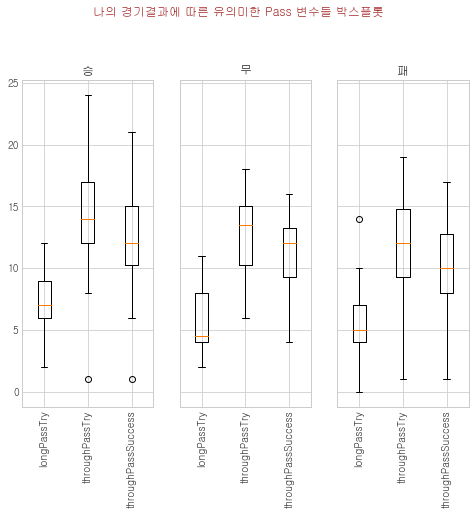

In [307]:
suptitle = '나의 경기결과에 따른 유의미한 Pass 변수들 박스플롯'
data_list = [win, draw, lose]
title_list = ['승', '무', '패']

fig, ax = plt.subplots(ncols=3, figsize=(8,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].boxplot(data[pass_mean_list].values)
    ax[idx].set_xticks([i for i in range(1, len(pass_mean_list)+1)])
    ax[idx].set_xticklabels(pass_mean_list, rotation=90)
    ax[idx].set_title(title_list[idx])

fig.suptitle(suptitle, fontdict=font_title, y=1.05)
plt.savefig(f'images/{suptitle}.png', bbox_inches = 'tight')
plt.show()

### 비모수 검정

In [216]:
pass_nonparam_meaning_list, pass_nonparam_notmeaning_list =  nonparam_test([win, draw, lose], pass_notnorm_list)
print('유의미한 비모수적 검정 변수들 :', pass_nonparam_meaning_list)
print('무의미한 비모수적 검정 변수들 :', pass_nonparam_notmeaning_list)

유의미한 비모수적 검정 변수들 : ['lobbedThroughPassTry', 'lobbedThroughPassSuccess']
무의미한 비모수적 검정 변수들 : ['passTry', 'passSuccess', 'shortPassTry', 'shortPassSuccess', 'longPassSuccess', 'bouncingLobPassTry', 'drivenGroundPassTry', 'drivenGroundPassSuccess']


#### 사후분석

In [217]:
nonparam_posthoc(my_HOJJIMIN, pass_nonparam_meaning_list, 'matchResult')

lobbedThroughPassTry
          무         승         패
무  1.000000  0.271985  0.000926
승  0.271985  1.000000  0.002910
패  0.000926  0.002910  1.000000
lobbedThroughPassSuccess
          무         승         패
무  1.000000  0.540809  0.002788
승  0.540809  1.000000  0.002788
패  0.002788  0.002788  1.000000


#### 사후분석 결과
- lobbedThroughPassTry : 승&패, 무&패
- lobbedThroughPassSuccess : 승&패, 무&패

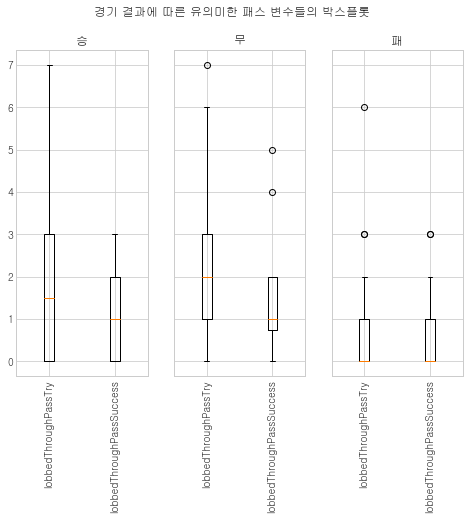

In [218]:
suptitle = '경기 결과에 따른 유의미한 패스 변수들의 박스플롯'
data_list = [win, draw, lose]
title_list = ['승', '무', '패']

fig, ax = plt.subplots(ncols=3, figsize=(8,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].boxplot(data[pass_nonparam_meaning_list].values)
    ax[idx].set_xticks([i for i in range(1, len(pass_nonparam_meaning_list)+1)])
    ax[idx].set_xticklabels(pass_nonparam_meaning_list, rotation=90)
    ax[idx].set_title(title_list[idx])

fig.suptitle(suptitle)
plt.show()

## ANOVA-Test (상대방 데이터)

### 정규성 검정

In [254]:
pass_norm_test_list = devide_test(not_HOJJIMIN, pass_columns)
pass_norm_list, pass_notnorm_list = pass_norm_test_list.test()
print('정규성 만족 변수들 : ', pass_norm_list)
print('정규성 불만족 변수들 : ', pass_notnorm_list)

정규성 만족 변수들 :  ['shortPassTry', 'shortPassSuccess', 'bouncingLobPassSuccess']
정규성 불만족 변수들 :  ['passTry', 'passSuccess', 'longPassTry', 'longPassSuccess', 'bouncingLobPassTry', 'drivenGroundPassTry', 'drivenGroundPassSuccess', 'throughPassTry', 'throughPassSuccess', 'lobbedThroughPassTry', 'lobbedThroughPassSuccess']


### 등분산 검정

In [255]:
win = not_HOJJIMIN.loc[not_HOJJIMIN['matchResult']=='승']
draw = not_HOJJIMIN.loc[not_HOJJIMIN['matchResult']=='무']
lose = not_HOJJIMIN.loc[not_HOJJIMIN['matchResult']=='패']

pass_samevar_list, pass_notsamevar_list = levene_test([win, draw, lose], pass_norm_list, pass_notnorm_list)
print('등분산 변수들 : ', pass_samevar_list)
print('이분산 변수들 : ', pass_notsamevar_list)

등분산 변수들 :  ['shortPassTry', 'shortPassSuccess']
이분산 변수들 :  ['bouncingLobPassSuccess']


### 분산 분석 검정

In [256]:
pass_mean_list, pass_notmean_list = analysis_var(not_HOJJIMIN, 'matchResult', [win,draw,lose], pass_norm_list, pass_notnorm_list)
print('유의미한 분산 분석 변수들 : ', pass_mean_list)
print('무의미한 분산 분석 변수들 : ', pass_notmean_list)

유의미한 분산 분석 변수들 :  []
무의미한 분산 분석 변수들 :  ['shortPassTry', 'shortPassSuccess', 'bouncingLobPassSuccess']


### 비모수 검정

In [257]:
pass_nonparam_meaning_list, pass_nonparam_notmeaning_list =  nonparam_test([win, draw, lose], pass_notnorm_list)
print('유의미한 비모수적 검정 변수들 :', pass_nonparam_meaning_list)
print('무의미한 비모수적 검정 변수들 :', pass_nonparam_notmeaning_list)

유의미한 비모수적 검정 변수들 : []
무의미한 비모수적 검정 변수들 : ['passTry', 'passSuccess', 'longPassTry', 'longPassSuccess', 'bouncingLobPassTry', 'drivenGroundPassTry', 'drivenGroundPassSuccess', 'throughPassTry', 'throughPassSuccess', 'lobbedThroughPassTry', 'lobbedThroughPassSuccess']


- 상대방 데이터는 정규성 만족 or 불만족이어도 모두 집단간 차이가 무의미함.

## 회귀 분석

In [330]:
res = ols('longPassTry ~ throughPassTry', data=HOJJIMIN).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            longPassTry   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     4.941
Date:                Tue, 02 Mar 2021   Prob (F-statistic):             0.0274
Time:                        16:53:50   Log-Likelihood:                -507.75
No. Observations:                 200   AIC:                             1019.
Df Residuals:                     198   BIC:                             1026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.8454      0.486      9.979      0.000       3.888       5.803
throughPassTry     0.0626      0.028      2.223      0.027       0.007       0.118
==============================================================================
Omnibus:                       14.209   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.187
Skew:                           0.614   Prob(JB):                     0.000504
Kurtosis:                       3.559   Cond. No.                         38.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- longPassTry와 throghPassTry 두 변수가 ANOVA-test에서 유의했기 때문에 두 변수간의 인과관계가 존재하지 않는지? 검정하기 위해, 회귀분석을 진행함.
- 하지만, 둘의 관계를 나타내는 모형 자체는 유의미하지 않음.
    - F 통계량 : 1.86, p-value : 0.176 이므로 '추정 회귀모형은 유의하지 않다'라는 귀무가설 채택
    - 즉, 두 변수는 인과관계를 띄지 않는다.

In [ ]:
res = ols('throughPassSuccess ~ throughPassTry', data=my_HOJJIMIN).fit()
res.summary()

In [ ]:
res = ols('passTry ~ shortPassTry+longPassTry+bouncingLobPassTry+drivenGroundPassTry+\
throughPassTry+lobbedThroughPassTry', 
          data=my_HOJJIMIN).fit()
res.summary()

# Defence

## 데이터 전처리

In [222]:
defence_columns = ['blockTry', 'blockSuccess', 'tackleTry', 'tackleSuccess']

my_HOJJIMIN[defence_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
blockTry,100.0,7.50,3.759164,0.0,5.0,7.0,9.00,20.0
blockSuccess,100.0,0.96,0.863631,0.0,0.0,1.0,1.00,4.0
tackleTry,100.0,7.19,3.546787,0.0,5.0,7.0,9.25,16.0
tackleSuccess,100.0,4.65,2.392644,0.0,3.0,4.0,6.00,10.0


## 수비 성공률

In [356]:
# 패스 성공률 변수 생성
print('변수 생성 이전 데이터 형태 : ', HOJJIMIN.shape)
print('변수 생성 이전 데이터 형태 : ', my_HOJJIMIN.shape)
print('변수 생성 이전 데이터 형태 : ', not_HOJJIMIN.shape)
print('-'*50)

for idx, col in enumerate(defence_columns):
    if idx % 2 == 1:
        continue
    HOJJIMIN[f'{col[:-3]}_success_rate'] = round(HOJJIMIN[defence_columns[idx+1]] / HOJJIMIN[defence_columns[idx]], 2)
    my_HOJJIMIN[f'{col[:-3]}_success_rate'] = round(my_HOJJIMIN[defence_columns[idx+1]] / my_HOJJIMIN[defence_columns[idx]], 2)
    not_HOJJIMIN[f'{col[:-3]}_success_rate'] = round(not_HOJJIMIN[defence_columns[idx+1]] / not_HOJJIMIN[defence_columns[idx]], 2)
    
print('변수 생성 이후 데이터 형태 : ', HOJJIMIN.shape)
print('변수 생성 이후 데이터 형태 : ', my_HOJJIMIN.shape)
print('변수 생성 이후 데이터 형태 : ', not_HOJJIMIN.shape)

변수 생성 이전 데이터 형태 :  (200, 71)
변수 생성 이전 데이터 형태 :  (100, 80)
변수 생성 이전 데이터 형태 :  (100, 70)
--------------------------------------------------
변수 생성 이후 데이터 형태 :  (200, 73)
변수 생성 이후 데이터 형태 :  (100, 82)
변수 생성 이후 데이터 형태 :  (100, 72)


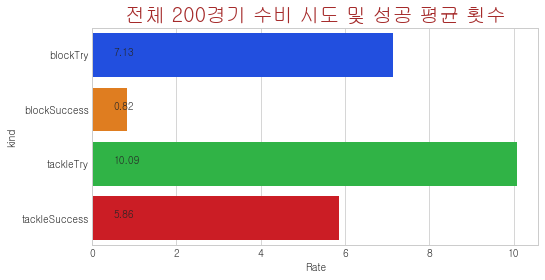

In [403]:
data = pd.DataFrame({'defence_kind' : defence_columns,
                   'value' : HOJJIMIN[defence_columns].mean()}).reset_index(drop=True)

title = '전체 200경기 수비 시도 및 성공 평균 횟수'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='value', y='defence_kind', data=data)
ax.set_xlabel('Rate')
ax.set_ylabel('kind')
ax.set_title(title, fontdict=font_title)

for idx, value in enumerate(data['value']):
    ax.text(0.5, idx, round(value, 2))
    
plt.savefig(f'images/{title}.png', bbox_inches='tight')
plt.show()

In [360]:
defence_success_rate_list = list(HOJJIMIN.columns[-2:])
defence_success_rate_list

['block_success_rate', 'tackle_success_rate']

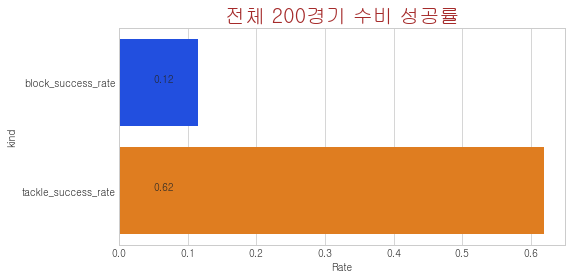

In [400]:
data = pd.DataFrame({'defence_kind' : defence_success_rate_list,
                   'value' : HOJJIMIN[defence_success_rate_list].mean()}).reset_index(drop=True)

title = '전체 200경기 수비 성공률'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='value', y='defence_kind', data=data)
ax.set_xlabel('Rate')
ax.set_ylabel('kind')
ax.set_title(title, fontdict=font_title)

for idx, value in enumerate(data['value']):
    ax.text(0.05, idx, round(value, 2))
    
plt.savefig(f'images/{title}.png', bbox_inches='tight')
plt.show()

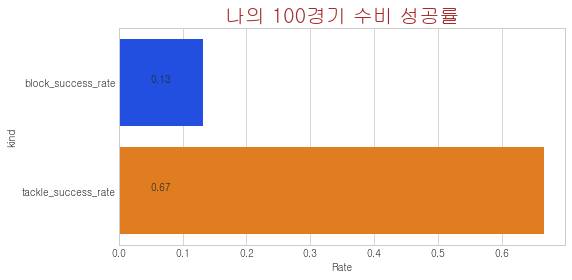

In [401]:
data = pd.DataFrame({'defence_kind' : defence_success_rate_list,
                   'value' : my_HOJJIMIN[defence_success_rate_list].mean()}).reset_index(drop=True)

title = '나의 100경기 수비 성공률'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='value', y='defence_kind', data=data)
ax.set_xlabel('Rate')
ax.set_ylabel('kind')
ax.set_title(title, fontdict=font_title)

for idx, value in enumerate(data['value']):
    ax.text(0.05, idx, round(value, 2))
    
plt.savefig(f'images/{title}.png', bbox_inches='tight')
plt.show()

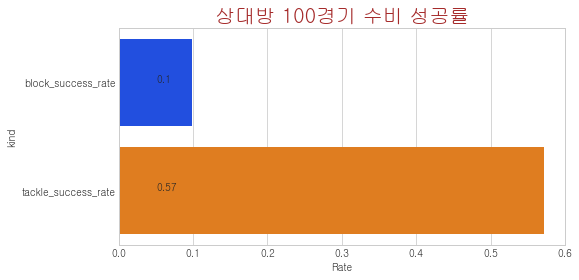

In [402]:
data = pd.DataFrame({'defence_kind' : defence_success_rate_list,
                   'value' : not_HOJJIMIN[defence_success_rate_list].mean()}).reset_index(drop=True)

title = '상대방 100경기 수비 성공률'
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='value', y='defence_kind', data=data)
ax.set_xlabel('Rate')
ax.set_ylabel('kind')
ax.set_title(title, fontdict=font_title)

for idx, value in enumerate(data['value']):
    ax.text(0.05, idx, round(value, 2))
    
plt.savefig(f'images/{title}.png', bbox_inches='tight')
plt.show()

## 박스 플롯

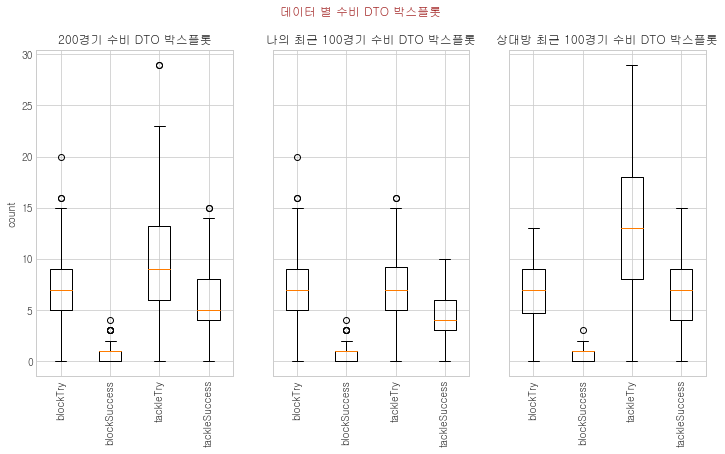

In [296]:
suptitle = '데이터 별 수비 DTO 박스플롯'
title_list = ['200경기 수비 DTO 박스플롯', '나의 최근 100경기 수비 DTO 박스플롯', '상대방 최근 100경기 수비 DTO 박스플롯']
data_list = [HOJJIMIN, my_HOJJIMIN, not_HOJJIMIN]

fig, ax = plt.subplots(ncols=3, figsize=(12,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].boxplot(data[defence_columns].values)
    ax[idx].set_xticks([i for i in range(1, len(defence_columns)+1)])
    ax[idx].set_xticklabels(defence_columns, rotation=90)
    ax[0].set_ylabel('count')
    ax[idx].set_title(title_list[idx])
fig.suptitle(suptitle, fontdict = font_title)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
plt.show()

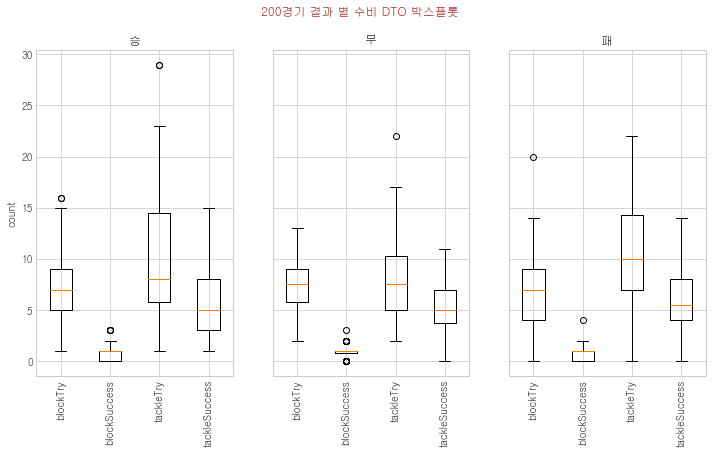

In [228]:
# 200개 데이터 - HOJJIMIN
# 경기 결과에 따른 박스플롯 확인
win = HOJJIMIN.loc[HOJJIMIN['matchResult']=='승']
draw = HOJJIMIN.loc[HOJJIMIN['matchResult']=='무']
lose = HOJJIMIN.loc[HOJJIMIN['matchResult']=='패']

title_list = ['승', '무', '패']
data_list = [win, draw, lose]
suptitle = '200경기 결과 별 수비 DTO 박스플롯'

fig, ax = plt.subplots(ncols=3, figsize=(12,6), sharey=True)
for idx,data in enumerate(data_list):
    ax[idx].boxplot(data[defence_columns].values)
    ax[idx].set_xticks([i for i in range(1, len(defence_columns)+1)])
    ax[idx].set_xticklabels(defence_columns, rotation=90)
    ax[0].set_ylabel('count')
    ax[idx].set_title(title_list[idx])
fig.suptitle(suptitle, fontdict=font_title)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
plt.show()

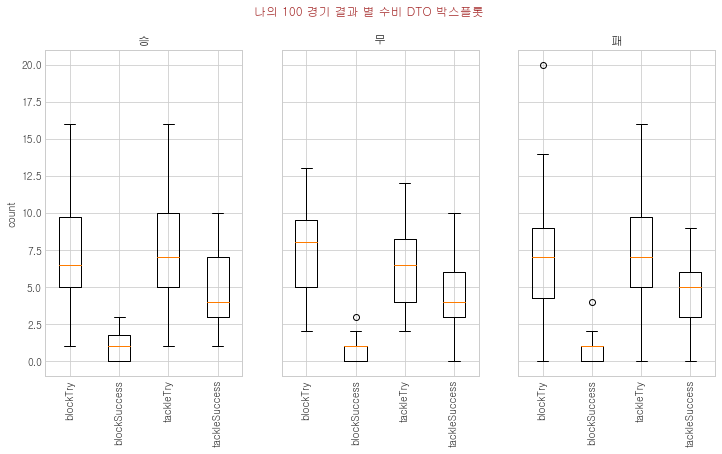

In [232]:
# 100개 데이터 - my_HOJJIMIN
# 경기 결과에 따른 박스플롯 확인
win = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='승']
draw = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='무']
lose = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='패']

title_list = ['승', '무', '패']
data_list = [win, draw, lose]
suptitle = '나의 100 경기 결과 별 수비 DTO 박스플롯'

fig, ax = plt.subplots(ncols=3, figsize=(12,6), sharey=True)
for idx,data in enumerate(data_list):
    ax[idx].boxplot(data[defence_columns].values)
    ax[idx].set_xticks([i for i in range(1, len(defence_columns)+1)])
    ax[idx].set_xticklabels(defence_columns, rotation=90)
    ax[0].set_ylabel('count')
    ax[idx].set_title(title_list[idx])
fig.suptitle(suptitle, fontdict=font_title)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
plt.show()

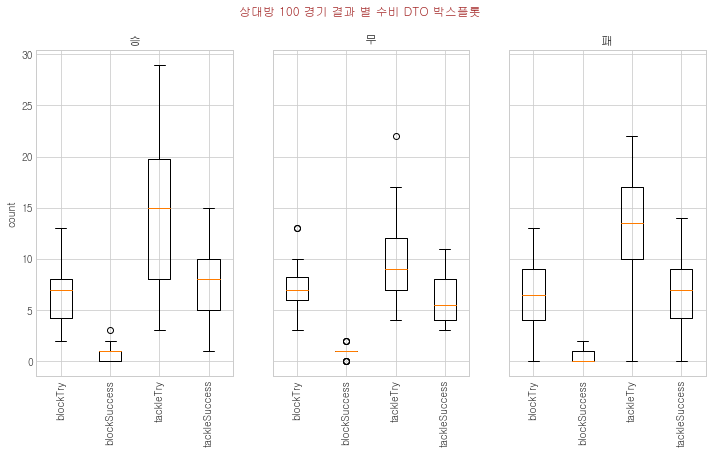

In [231]:
# 100개 데이터 - not_HOJJIMIN
# 경기 결과에 따른 박스플롯 확인
win = not_HOJJIMIN.loc[not_HOJJIMIN['matchResult']=='승']
draw = not_HOJJIMIN.loc[not_HOJJIMIN['matchResult']=='무']
lose = not_HOJJIMIN.loc[not_HOJJIMIN['matchResult']=='패']

title_list = ['승', '무', '패']
data_list = [win, draw, lose]
suptitle = '상대방 100 경기 결과 별 수비 DTO 박스플롯'

fig, ax = plt.subplots(ncols=3, figsize=(12,6), sharey=True)
for idx,data in enumerate(data_list):
    ax[idx].boxplot(data[defence_columns].values)
    ax[idx].set_xticks([i for i in range(1, len(defence_columns)+1)])
    ax[idx].set_xticklabels(defence_columns, rotation=90)
    ax[0].set_ylabel('count')
    ax[idx].set_title(title_list[idx])
fig.suptitle(suptitle, fontdict=font_title)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
plt.show()

- 패배했을 때, blockTry & Success에서 이상치가 존재함. (상대방이 많이 슛을 날렸다는 의미겠지?)
- 이 경우를 조금 더 살펴보자. 상대방이 슛을 얼마나 날렸는지 확인 필요

### 이상치 확인

In [ ]:
matchId = my_HOJJIMIN.loc[my_HOJJIMIN['blockTry']==20]['matchId']
matchId

In [ ]:
HOJJIMIN.loc[HOJJIMIN['matchId']=='5f76aabdd5765953d9136c94']

In [ ]:
opponent_data = pd.melt(HOJJIMIN.loc[HOJJIMIN['nickname']=='UEFA킴영석', shoot_columns])
my_data = pd.melt(HOJJIMIN.loc[(HOJJIMIN['nickname']=='HOJJIMIN') & (HOJJIMIN['matchId']=='5f76aabdd5765953d9136c94'), shoot_columns])

defence DTO에서 이상치가 나온 경우 상대방의 슈팅 횟수는 얼마나 됐는지 ? 확인해보자.

In [ ]:
title_list = ['상대방의 슈팅 횟수', '나의 슈팅 횟수']
data_list = [opponent_data, my_data]
fig, ax = plt.subplots(ncols=2, figsize = (12,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].bar(data['variable'], data['value'])
    ax[idx].set_xticks([i for i in range(len(data))])
    ax[idx].set_xticklabels(list(data['variable']), rotation=90)
    ax[idx].set_title(title_list[idx])
plt.show()

블락은 골기퍼가 상대방의 슈팅을 막은 횟수가 아닌것을 알 수 있다.
- 왜냐면, 상대방의 총 슈팅횟수가 15회인데, 해당 경기에서 블락이 15번이었기 때문에.

## 히스토그램

In [236]:
defence_array = np.array(defence_columns).reshape(2,-1)
defence_array

array([['blockTry', 'blockSuccess'],
       ['tackleTry', 'tackleSuccess']], dtype='<U13')

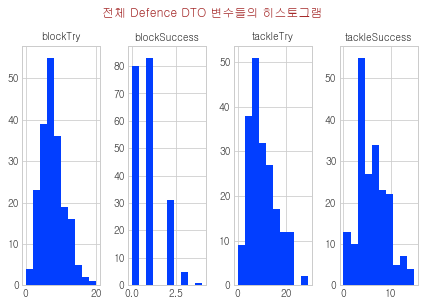

In [240]:
suptitle = '전체 Defence DTO 변수들의 히스토그램'
fig, ax = plt.subplots(ncols=4, figsize = (6,4))
for idx, col in enumerate(defence_columns):
    ax[idx].hist(HOJJIMIN[col].values)
    ax[idx].set_title(col, fontsize=10)        
fig.suptitle(suptitle, fontdict = font_title, y=1.05)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
fig.tight_layout()

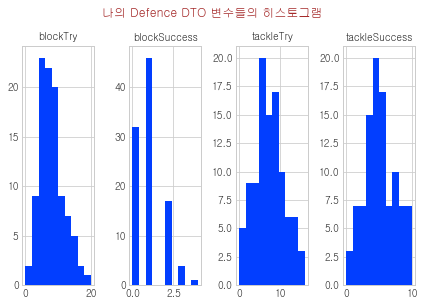

In [241]:
suptitle = '나의 Defence DTO 변수들의 히스토그램'
fig, ax = plt.subplots(ncols=4, figsize = (6,4))
for idx, col in enumerate(defence_columns):
    ax[idx].hist(my_HOJJIMIN[col].values)
    ax[idx].set_title(col, fontsize=10)        
fig.suptitle(suptitle, fontdict = font_title, y=1.05)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
fig.tight_layout()

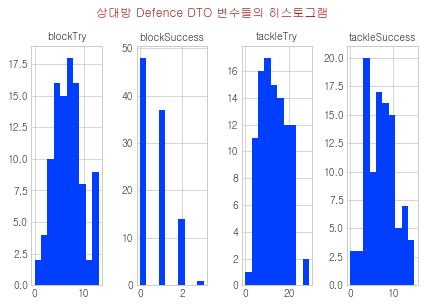

In [242]:
suptitle = '상대방 Defence DTO 변수들의 히스토그램'
fig, ax = plt.subplots(ncols=4, figsize = (6,4))
for idx, col in enumerate(defence_columns):
    ax[idx].hist(not_HOJJIMIN[col].values)
    ax[idx].set_title(col, fontsize=10)        
fig.suptitle(suptitle, fontdict = font_title, y=1.05)
plt.savefig(f'images/{suptitle}.png', bbox_inches='tight')
fig.tight_layout()

- blockSuccess를 제외한 나머지 변수는 정규분포를 띄는 것 같이 보인다.

In [ ]:
print('변수 생성 이전 데이터 형태 : ',my_HOJJIMIN.shape)

for idx,col in enumerate(defence_columns):
    if idx % 2 ==1:
        continue
    my_HOJJIMIN[f'{col[:-3]}_rate'] = my_HOJJIMIN[defence_columns[idx+1]] / my_HOJJIMIN[defence_columns[idx]]
        
print('변수 생성 이후 데이터 형태 : ',my_HOJJIMIN.shape)

## ANOVA-Test (전체 데이터)

### 정규성 검정

In [281]:
defence_norm_test_list = devide_test(HOJJIMIN, defence_columns)
defence_norm_list, defence_notnorm_list = defence_norm_test_list.test()
print('정규성 만족 변수들 : ', defence_norm_list)
print('정규성 불만족 변수들 : ', defence_notnorm_list)

정규성 만족 변수들 :  ['blockTry', 'blockSuccess', 'tackleTry', 'tackleSuccess']
정규성 불만족 변수들 :  []


### 등분산 검정

In [282]:
win = HOJJIMIN.loc[HOJJIMIN['matchResult']=='승']
draw = HOJJIMIN.loc[HOJJIMIN['matchResult']=='무']
lose = HOJJIMIN.loc[HOJJIMIN['matchResult']=='패']

defence_samevar_list, defence_notsamevar_list = levene_test([win, draw, lose], defence_norm_list, defence_notnorm_list)
print('등분산 변수들 : ', defence_samevar_list)
print('이분산 변수들 : ', defence_notsamevar_list)

등분산 변수들 :  ['blockTry', 'blockSuccess', 'tackleSuccess']
이분산 변수들 :  ['tackleTry']


### 분산분석 검정

In [283]:
defence_mean_list, defence_notmean_list = analysis_var(HOJJIMIN, 'matchResult', [win,draw,lose], defence_norm_list, defence_notnorm_list)
print('유의미한 분산 분석 변수들 : ', defence_mean_list)
print('무의미한 분산 분석 변수들 : ', defence_notmean_list)

유의미한 분산 분석 변수들 :  ['tackleTry']
무의미한 분산 분석 변수들 :  ['blockTry', 'blockSuccess', 'tackleSuccess']


### 사후분석

In [284]:
posthoc_test(HOJJIMIN, defence_mean_list, 'matchResult')

tackleTry
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     무      승   2.3625 0.0949 -0.3095 5.0345  False
     무      패   2.2875 0.1097 -0.3845 4.9595  False
     승      패   -0.075    0.9 -2.2567 2.1067  False
---------------------------------------------------
--------------------------------------------------


#### 사후분석 결과
사후분석 진행해보니 차이가 있다고 얘기 X

## ANOVA-Test (나의 데이터)

### 정규성 검정

In [243]:
defence_norm_test_list = devide_test(my_HOJJIMIN, defence_columns)
defence_norm_list, defence_notnorm_list = defence_norm_test_list.test()
print('정규성 만족 변수들 : ', defence_norm_list)
print('정규성 불만족 변수들 : ', defence_notnorm_list)

정규성 만족 변수들 :  ['tackleTry']
정규성 불만족 변수들 :  ['blockTry', 'blockSuccess', 'tackleSuccess']


### 등분산 검정

In [244]:
win = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='승']
draw = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='무']
lose = my_HOJJIMIN.loc[my_HOJJIMIN['matchResult']=='패']

defence_samevar_list, defence_notsamevar_list = levene_test([win, draw, lose], defence_norm_list, defence_notnorm_list)
print('등분산 변수들 : ', defence_samevar_list)
print('이분산 변수들 : ', defence_notsamevar_list)

등분산 변수들 :  ['tackleTry']
이분산 변수들 :  []


### 분산 분석 검정

In [245]:
defence_mean_list, defence_notmean_list = analysis_var(my_HOJJIMIN, 'matchResult', [win,draw,lose], defence_norm_list, defence_notnorm_list)
print('유의미한 분산 분석 변수들 : ', defence_mean_list)
print('무의미한 분산 분석 변수들 : ', defence_notmean_list)

유의미한 분산 분석 변수들 :  []
무의미한 분산 분석 변수들 :  ['tackleTry']


### 비모수 검정

In [246]:
defence_nonparam_meaning_list, defence_nonparam_notmeaning_list =  nonparam_test([win, draw, lose], defence_notnorm_list)
print('유의미한 비모수적 검정 변수들 :', defence_nonparam_meaning_list)
print('무의미한 비모수적 검정 변수들 :', defence_nonparam_notmeaning_list)

유의미한 비모수적 검정 변수들 : []
무의미한 비모수적 검정 변수들 : ['blockTry', 'blockSuccess', 'tackleSuccess']


- defence 변수들은 경기 결과에 따라 관계 없다.

## ANOVA-Test (상대방 데이터)

### 정규성 검정

In [308]:
defence_norm_test_list = devide_test(not_HOJJIMIN, defence_columns)
defence_norm_list, defence_notnorm_list = defence_norm_test_list.test()
print('정규성 만족 변수들 : ', defence_norm_list)
print('정규성 불만족 변수들 : ', defence_notnorm_list)

정규성 만족 변수들 :  ['tackleSuccess']
정규성 불만족 변수들 :  ['blockTry', 'blockSuccess', 'tackleTry']


### 등분산 검정

In [309]:
defence_samevar_list, defence_notsamevar_list = levene_test([win, draw, lose], defence_norm_list, defence_notnorm_list)
print('등분산 변수들 : ', defence_samevar_list)
print('이분산 변수들 : ', defence_notsamevar_list)

등분산 변수들 :  ['tackleSuccess']
이분산 변수들 :  []


### 분산 분석 검정

In [310]:
win = not_HOJJIMIN.loc[not_HOJJIMIN['matchResult']=='승']
draw = not_HOJJIMIN.loc[not_HOJJIMIN['matchResult']=='무']
lose = not_HOJJIMIN.loc[not_HOJJIMIN['matchResult']=='패']

defence_mean_list, defence_notmean_list = analysis_var(not_HOJJIMIN, 'matchResult', [win,draw,lose], defence_norm_list, defence_notnorm_list)
print('유의미한 분산 분석 변수들 : ', defence_mean_list)
print('무의미한 분산 분석 변수들 : ', defence_notmean_list)

유의미한 분산 분석 변수들 :  []
무의미한 분산 분석 변수들 :  ['tackleSuccess']


### 비모수 검정

In [311]:
defence_nonparam_meaning_list, defence_nonparam_notmeaning_list =  nonparam_test([win, draw, lose], defence_notnorm_list)
print('유의미한 비모수적 검정 변수들 :', defence_nonparam_meaning_list)
print('무의미한 비모수적 검정 변수들 :', defence_nonparam_notmeaning_list)

유의미한 비모수적 검정 변수들 : ['blockSuccess', 'tackleTry']
무의미한 비모수적 검정 변수들 : ['blockTry']


#### 사후분석

In [312]:
nonparam_posthoc(not_HOJJIMIN, defence_nonparam_meaning_list, 'matchResult')

blockSuccess
          무         승         패
무  1.000000  0.219448  0.021771
승  0.219448  1.000000  0.219448
패  0.021771  0.219448  1.000000
tackleTry
          무         승         패
무  1.000000  0.049567  0.055244
승  0.049567  1.000000  0.767523
패  0.055244  0.767523  1.000000


#### 사후분석 결과
- blockSuccess : 무&패
- tackleTry : 무&패가 0.055로 그나마 차이가 있다고 볼 수 있다.

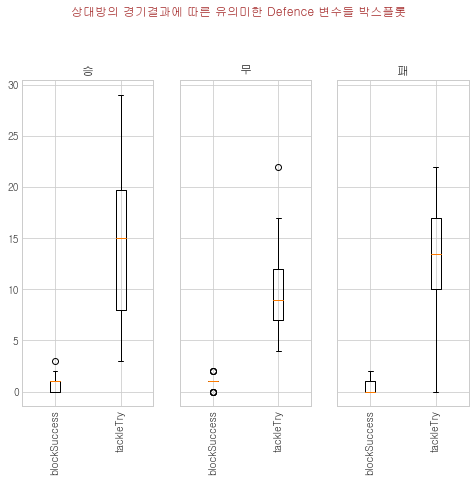

In [314]:
suptitle = '상대방의 경기결과에 따른 유의미한 Defence 변수들 박스플롯'
data_list = [win, draw, lose]
title_list = ['승', '무', '패']

fig, ax = plt.subplots(ncols=3, figsize=(8,6), sharey=True)
for idx, data in enumerate(data_list):
    ax[idx].boxplot(data[defence_nonparam_meaning_list].values)
    ax[idx].set_xticks([i for i in range(1, len(defence_nonparam_meaning_list)+1)])
    ax[idx].set_xticklabels(defence_nonparam_meaning_list, rotation=90)
    ax[idx].set_title(title_list[idx])

fig.suptitle(suptitle, fontdict=font_title, y=1.05)
plt.savefig(f'images/{suptitle}.png', bbox_inches = 'tight')
plt.show()

# 상관관계 분석 및 회귀분석

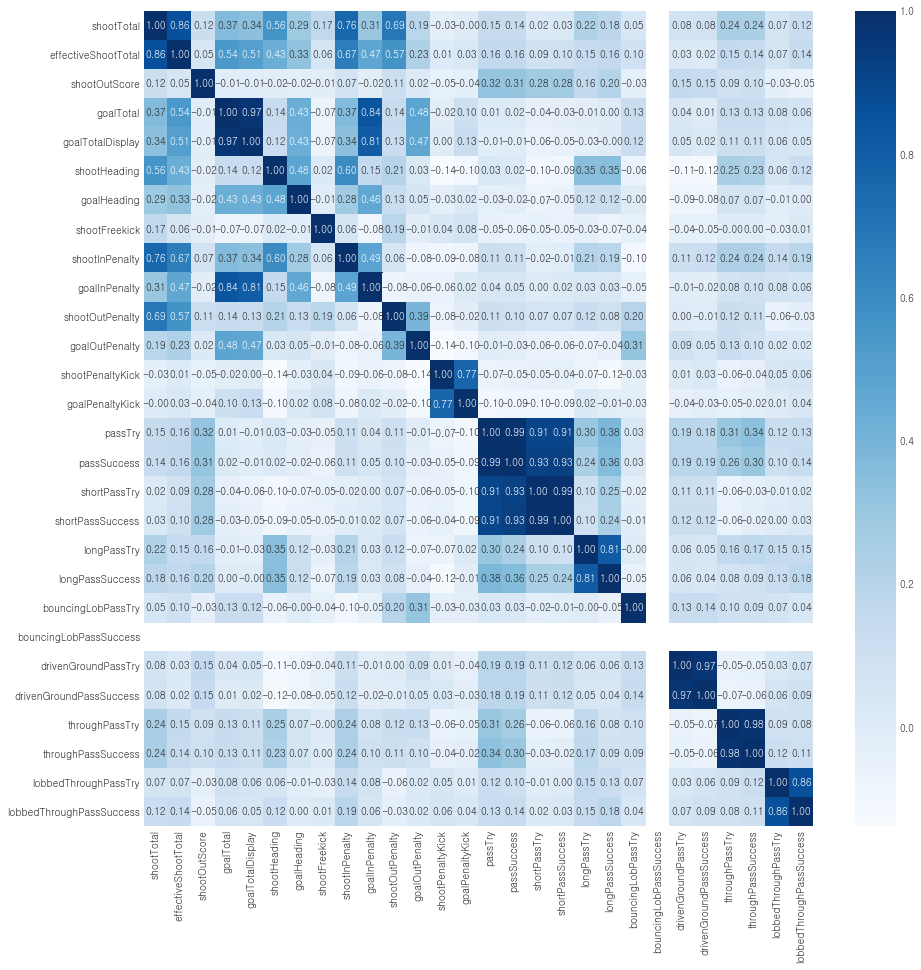

In [407]:
test_cols = shoot_columns + pass_columns
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(HOJJIMIN[test_cols].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [409]:
corr_df = HOJJIMIN[test_cols].corr()
corr_df

,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,shootHeading,goalHeading,shootFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess
shootTotal,1.000000,0.857833,0.120274,0.366456,0.339368,0.561713,0.290531,0.168396,0.755829,0.306406,0.690570,0.187937,-0.032026,-0.003804,0.145343,0.137680,0.023315,0.032573,0.224418,0.183206,0.053086,NaN,0.079262,0.080208,0.244988,0.240872,0.068777,0.119787
effectiveShootTotal,0.857833,1.000000,0.048712,0.539874,0.509307,0.434628,0.325528,0.058506,0.665907,0.471854,0.567594,0.233548,0.010102,0.033555,0.161666,0.160693,0.091206,0.099538,0.150750,0.160203,0.097149,NaN,0.025520,0.021593,0.152791,0.144205,0.068233,0.136724
shootOutScore,0.120274,0.048712,1.000000,-0.007800,-0.010425,-0.017342,-0.018831,-0.013890,0.072667,-0.015944,0.112245,0.020629,-0.045804,-0.035112,0.317180,0.314944,0.277850,0.276799,0.163329,0.204948,-0.028522,NaN,0.154957,0.148493,0.089326,0.103934,-0.030056,-0.054145
goalTotal,0.366456,0.539874,-0.007800,1.000000,0.971996,0.135726,0.432724,-0.068396,0.365249,0.837953,0.141530,0.478730,-0.015857,0.104336,0.013104,0.016421,-0.044252,-0.033314,-0.013591,0.001095,0.125897,NaN,0.038291,0.006461,0.133323,0.134851,0.080520,0.064149
goalTotalDisplay,0.339368,0.509307,-0.010425,0.971996,1.000000,0.124590,0.427458,-0.071929,0.340911,0.805318,0.127863,0.472784,0.000995,0.127841,-0.013286,-0.007006,-0.064197,-0.051656,-0.026819,-0.003896,0.124493,NaN,0.049389,0.015587,0.114612,0.114537,0.062993,0.048776
shootHeading,0.561713,0.434628,-0.017342,0.135726,0.124590,1.000000,0.479078,0.020980,0.601908,0.152909,0.206779,0.033423,-0.137837,-0.099934,0.032859,0.020094,-0.100915,-0.093103,0.347617,0.348834,-0.057918,NaN,-0.111803,-0.122285,0.250768,0.233230,0.055797,0.119572
goalHeading,0.290531,0.325528,-0.018831,0.432724,0.427458,0.479078,1.000000,-0.007508,0.276549,0.462366,0.131061,0.053560,-0.029543,0.023808,-0.034137,-0.021223,-0.069951,-0.053600,0.115176,0.124237,-0.004245,NaN,-0.086302,-0.083062,0.070804,0.069580,-0.011860,0.001680
shootFreekick,0.168396,0.058506,-0.013890,-0.068396,-0.071929,0.020980,-0.007508,1.000000,0.057898,-0.083223,0.192020,-0.014775,0.038641,0.078989,-0.052959,-0.058201,-0.047069,-0.054119,-0.032033,-0.068431,-0.036092,NaN,-0.038250,-0.046595,-0.002505,0.004081,-0.032702,0.014283
shootInPenalty,0.755829,0.665907,0.072667,0.365249,0.340911,0.601908,0.276549,0.057898,1.000000,0.486573,0.060260,-0.081917,-0.089685,-0.078233,0.112247,0.107983,-0.019255,-0.008212,0.206274,0.187374,-0.102065,NaN,0.112619,0.118552,0.238958,0.239599,0.144386,0.192808
goalInPenalty,0.306406,0.471854,-0.015944,0.837953,0.805318,0.152909,0.462366,-0.083223,0.486573,1.000000,-0.079062,-0.055086,-0.064121,0.015214,0.037372,0.049987,0.000851,0.015909,0.027415,0.028830,-0.047058,NaN,-0.005221,-0.017250,0.079030,0.099507,0.076877,0.056244


In [465]:
a = 'effectiveShootTotal'
b = 'effectiveshootTotal'
print(('Shoot' or 'shoot') in a)
print(('Shoot' or 'shoot') in b)
print('Shoot' in a)

True
False
True


In [468]:
corr_dict = {}

for idx in list(corr_df.index):
    for col in list(corr_df.columns):
        if idx == col:
            continue
        elif 'pass' in idx and 'pass' in col: # 패스끼리 상관관계 x
            continue
        elif 'pass' in idx and 'Pass' in col: # 패스끼리 상관관계 x
            continue
        elif 'Pass' in idx and 'pass' in col: # 패스끼리 상관관계 x
            continue
        elif 'Pass' in idx and 'Pass' in col: # 패스끼리 상관관계 x
            continue
        elif 'shoot' in idx and 'shoot' in col: # 슛끼리 상관관계 x
            continue
        elif 'shoot' in idx and 'Shoot' in col: # 슛끼리 상관관계 x
            continue
        elif 'Shoot' in idx and 'shoot' in col: # 슛끼리 상관관계 x
            continue
        elif 'Shoot' in idx and 'Shoot' in col: # 슛끼리 상관관계 x
            continue

        elif 'goal' in idx and 'goal' in col: # 슛끼리 상관관계 x
            continue        
        elif 'shoot' in idx and 'goal' in col:
            continue
        elif 'Shoot' in idx and 'goal' in col:
            continue
        elif 'goal' in idx and 'shoot' in col:
            continue
        elif 'goal' in idx and 'Shoot' in col:
            continue
        temp = round(corr_df.loc[idx, col],2)
        if abs(temp) > 0.5:
            corr_dict[idx,col] = temp
        else:
            continue
corr_dict

{}

In [452]:
corr_dict.keys()

dict_keys([('shootTotal', 'effectiveShootTotal'), ('effectiveShootTotal', 'shootTotal'), ('effectiveShootTotal', 'effectiveShootTotal'), ('effectiveShootTotal', 'goalTotal'), ('effectiveShootTotal', 'goalTotalDisplay'), ('effectiveShootTotal', 'shootInPenalty'), ('effectiveShootTotal', 'shootOutPenalty'), ('goalTotal', 'effectiveShootTotal'), ('goalTotalDisplay', 'effectiveShootTotal'), ('shootInPenalty', 'effectiveShootTotal'), ('shootOutPenalty', 'effectiveShootTotal'), ('passTry', 'shortPassTry'), ('passTry', 'shortPassSuccess'), ('passSuccess', 'shortPassTry'), ('passSuccess', 'shortPassSuccess'), ('shortPassTry', 'passTry'), ('shortPassTry', 'passSuccess'), ('shortPassTry', 'shortPassTry'), ('shortPassTry', 'shortPassSuccess'), ('shortPassSuccess', 'passTry'), ('shortPassSuccess', 'passSuccess'), ('shortPassSuccess', 'shortPassTry'), ('shortPassSuccess', 'shortPassSuccess'), ('longPassTry', 'longPassTry'), ('longPassTry', 'longPassSuccess'), ('longPassSuccess', 'longPassTry'), ('l